# Career trajectories at Circus Oz

<style>
  a {
    color: #1ea5a6 !important;
  }
</style>

This is an exploratory data analysis of collected data from Circus Oz. The main focus will be around gender, roles and temporal relationships.

The data consists of...
- event records with attached dates
- person records for each event
- each person record contains data on gender and role type

Data has been collected between 1977 to 2022, however we focus only on data between **1977 to 2009** as this period holds the richest records.

### Import packages and pre-process data

In [45]:
# # for data mgmt
# import pandas as pd
# import numpy as np
# from collections import Counter
# import re

# # for plotting
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme(style="white")  

# import plotly.express as px
# import plotly.graph_objects as go

# # for network graphs
# import networkx as nx
# from pyvis import network as net
# from IPython.display import IFrame

# # for statistical processes
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules
# from scipy.stats import pareto

# import warnings
# warnings.filterwarnings("ignore")

# # df = pd.read_excel('data/23 Nov_Circus Oz_MasterList-RoleCategories_1978-2009_Clean.xlsx')
# # endcol = '(TBC)_VENUE.TYPE'

# # df = pd.read_excel('data/22 Feb - CircusOz_MasterList-RoleCategories_1978-2009_Clean.xlsx')
# # endcol = 'VENUE_(TBC)'

# df = pd.read_excel('data/data_analysis/CircusOz.xlsx')
# endcol = 'VENUE_(TBC)'

# # remove redundant rows
# df = df[~df['PERSON.NUMBER'].isnull()]

# # assign event number to each related person
# for idx,row in df.iterrows():
#     if pd.isnull(row['EVENT.NUMBER']): 
#         for col, val in row_dict.items(): df.at[idx, col] = val
#     else: 
#         row_dict = row.loc["EVENT.NUMBER":endcol].to_dict()
        
# # create separate events dataset
# events_df = df.loc[:,"EVENT.NUMBER":endcol]\
#               .drop_duplicates()\
#               .reset_index(drop=True)

In [46]:
# for data mgmt
import json
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
import re
import os, requests, gzip, io
import ast

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")  

import plotly.express as px
import plotly.graph_objects as go

# for network graphs
import networkx as nx
from pyvis import network as net
from IPython.display import IFrame

# for statistical processes
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from scipy.stats import pareto

import warnings
warnings.filterwarnings("ignore")

def fetch_small_data_from_github(fname):
    url = f"https://raw.githubusercontent.com/acd-engine/jupyterbook/master/data/analysis/{fname}"
    if 'xlsx' in fname: return pd.read_excel(url)
    else:
        response = requests.get(url)
        rawdata = response.content.decode('utf-8')
        return pd.read_csv(io.StringIO(rawdata))

# df = pd.read_excel('data/22 Feb - CircusOz_MasterList-RoleCategories_1978-2009_Clean.xlsx')
df = fetch_small_data_from_github('CircusOz.xlsx')
endcol = 'VENUE_(TBC)'

# remove redundant rows
df = df[~df['PERSON.NUMBER'].isnull()]

# assign event number to each related person
for idx,row in df.iterrows():
    if pd.isnull(row['EVENT.NUMBER']): 
        for col, val in row_dict.items(): df.at[idx, col] = val
    else: 
        row_dict = row.loc["EVENT.NUMBER":endcol].to_dict()
        
# create separate events dataset
events_df = df.loc[:,"EVENT.NUMBER":endcol]\
              .drop_duplicates()\
              .reset_index(drop=True)

## Gender

### Gender summary

We use a series of donut charts to explore how gender has been recorded. The first donut chart highlights the distribution of raw gender records for all participations and the second donut chart shows the proportion of only `Female` and `Male` records. 

There are five different categories according to the raw data. We have provided a frequency table below with the raw counts.

| Gender | Frequency |
| :- | -: |
| M | 5486 |
| F | 6424 |
| U | 29 |
| 0 | 1915 |
| NaN | 44 |

According to the raw data, `Female` occurs the most (46.2%), followed by `Male` (39.5%) and `0` (13.8%).`0` represents unverified records. 

The third and fourth pie chart focus on unique participants. We have provided a frequency table below.

| Gender | Frequency |
| :- | -: |
| M | 149 |
| F | 152 |
| U | 2 |
| 0 | 491 |
| NaN | 2 |

From hereon, we will use Unconfirmed to represent `0`, `U`, and `Missing`. 


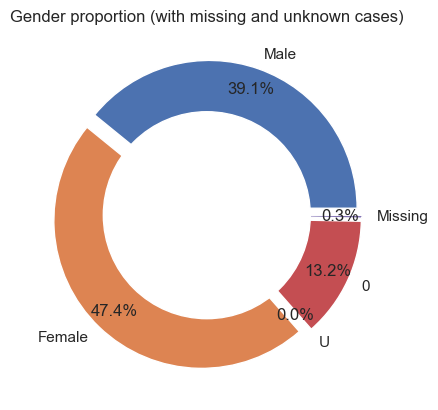

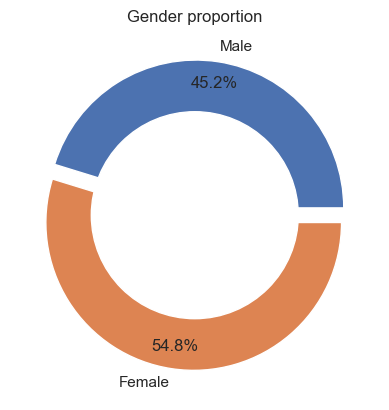

In [47]:
df['Gender'] = np.where(df['COMBINED.NAME'] == 'Madge Fletcher', 'F', df['Gender'])
df['Gender'] = np.where(df['COMBINED.NAME'] == 'Jess Love', 'F', df['Gender'])
df['Gender'] = np.where(df['COMBINED.NAME'] == 'Pete Sanders', 'M', df['Gender'])

df = df.drop_duplicates()
df['Year'] = df['DATE.FROM.(General)'].apply(lambda x: x.strftime('%Y'))
df['Year'] = df['Year'].astype(int)
df['Year_decade'] = [ int(np.floor(int(year)/5) * 5) 
                            for year in np.array(df['Year'])]

df_noinjuries = df[df['ROLE.CATEGORY.CONCATINATE'] != 'Injured']

## Gender Proportion
df_gender=pd.DataFrame(dict(Counter(df_noinjuries["Gender"])).items(),
                              columns=["Gender","Frequency"])
# print(df_gender)

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(df_gender['Frequency'], labels=['Male','Female','U',0,'Missing'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender proportion (with missing and unknown cases)')
  
# Displaying Chart
plt.show()

# without null
# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(df_gender[df_gender['Gender'].isin(['M','F'])]['Frequency'], 
        labels=['Male','Female'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender proportion')
  
# Displaying Chart
plt.show()


# # Pie Chart
# plt.pie(df_gender[df_gender['Gender'].isin(['M','F',0])]\
#         .replace({0: 'M'})\
#         .groupby('Gender')\
#         .sum()\
#         .reset_index()\
#         .sort_values('Gender',ascending=False)['Frequency'], 
#         labels=['Male','Female'],
#         autopct='%1.1f%%', pctdistance=0.85,
#         explode=explode)

# # draw circle
# centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# fig = plt.gcf()
  
# # Adding Circle in Pie chart
# fig.gca().add_artist(centre_circle)
  
# # Adding Title of chart
# plt.title('Gender proportion (assuming 0 is Male)')
  
# Displaying Chart
plt.show()

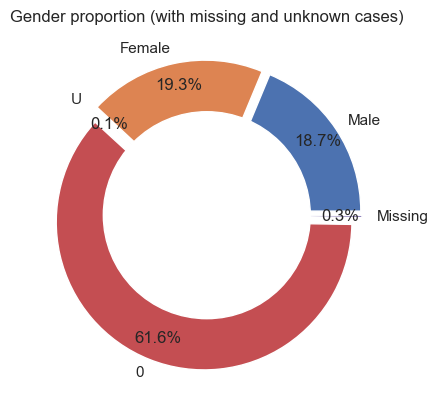

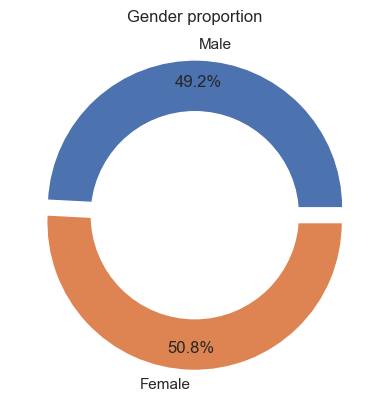

In [49]:
## Gender Proportion
df_gender=pd.DataFrame(dict(Counter(df_noinjuries.drop_duplicates(['PERSON.NUMBER','Gender'])["Gender"])).items(),
                              columns=["Gender","Frequency"])
# print(df_gender)

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(df_gender['Frequency'], labels=['Male','Female','U',0,'Missing'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender proportion (with missing and unknown cases)')
  
# Displaying Chart
plt.show()

# without null
# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(df_gender[df_gender['Gender'].isin(['M','F'])]['Frequency'], 
        labels=['Male','Female'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender proportion')
  
# Displaying Chart
plt.show()


# # Pie Chart
# plt.pie(df_gender[df_gender['Gender'].isin(['M','F',0])]\
#         .replace({0: 'M'})\
#         .groupby('Gender')\
#         .sum()\
#         .reset_index()\
#         .sort_values('Gender',ascending=False)['Frequency'], 
#         labels=['Male','Female'],
#         autopct='%1.1f%%', pctdistance=0.85,
#         explode=explode)

# # draw circle
# centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# fig = plt.gcf()
  
# # Adding Circle in Pie chart
# fig.gca().add_artist(centre_circle)
  
# # Adding Title of chart
# plt.title('Gender proportion (assuming 0 is Male)')
  
# Displaying Chart
plt.show()

### Participation by time

The visualisations below show the participation rates across time for `Male`, `Female` and `Unconfirmed`. Participation rate being the number of people involved in an event in a time period. The clustered bar chart shows that the majority of unverified persons lie within the 95-99 period. Furthermore, `Female` leads partipication across most periods.

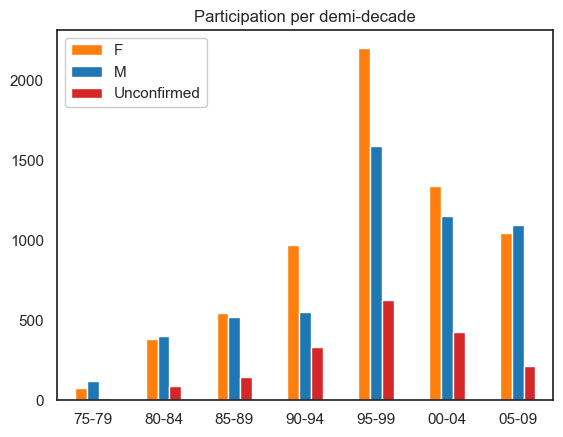

In [50]:
bymf= df_noinjuries[(df_noinjuries.Year_decade < 2010)]
bymf['Gender'] = bymf['Gender'].replace({0: 'Unconfirmed', 'U': 'Unconfirmed'})
ax = pd.crosstab(bymf['Year_decade'], 
            bymf['Gender'])\
.plot(kind='bar', rot=0, color=['tab:orange','tab:blue','tab:red'])
plt.legend(loc="upper left", ncol=1, facecolor='white', framealpha=1)
plt.title('Participation per demi-decade')
ax.set_xlabel('')
plt.xticks(range(0, 7, 1), ['75-79', '80-84','85-89', '90-94',
                            '95-99', '00-04','05-09'])
plt.show()

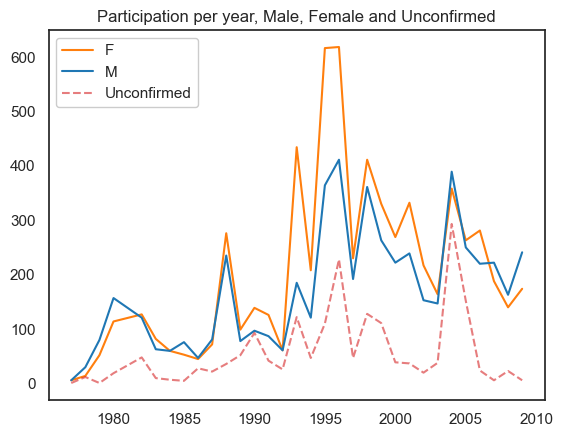

In [51]:
ax = pd.crosstab(bymf[bymf.Gender != 'Unconfirmed']['Year'], 
                 bymf[bymf.Gender != 'Unconfirmed']['Gender'])\
.plot(rot=0, color=['tab:orange','tab:blue'])

pd.crosstab(bymf[bymf.Gender == 'Unconfirmed']['Year'], 
            bymf[bymf.Gender == 'Unconfirmed']['Gender'])\
.plot(rot=0, color=['tab:red'], alpha=0.6, linestyle='dashed', ax=ax)

plt.legend(loc="upper left", ncol=1, facecolor='white', framealpha=1)
plt.title('Participation per year, Male, Female and Unconfirmed', )
ax.set_xlabel('')
plt.show()

In [52]:
# compare proportions
gender_props = pd.crosstab(bymf[bymf.Gender != 'Unconfirmed']['Year'], 
                 bymf[bymf.Gender != 'Unconfirmed']['Gender'], normalize='index').reset_index()\
                .melt(id_vars=['Year'], value_vars=['M','F'])

fig = px.line(gender_props, x="Year", y="value", color='Gender'
,color_discrete_map={'M':'#1f77b4','F':'#ff7f0e'}
    ,title='Participation per year, Male and Female proportions'
    ,height=500
    ,width=800)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="right",
    x=0.6
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.97)

# change y-axis limits
fig.update_yaxes(range=[0.2, 0.8])

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=16),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.show()

#### Participation by time (Unique participants)

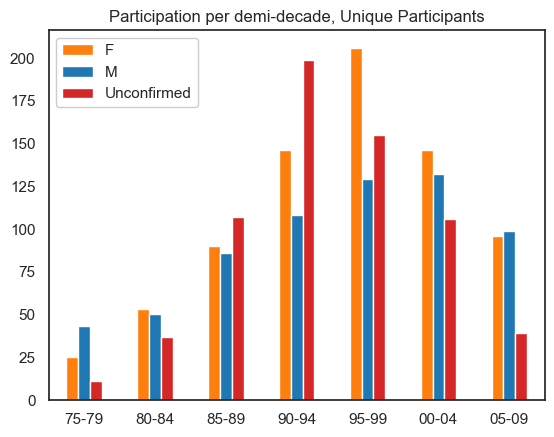

In [53]:
bymf= df_noinjuries[df_noinjuries.Year_decade < 2010].drop_duplicates(['PERSON.NUMBER','Year'])
bymf['Gender'] = bymf['Gender'].replace({0: 'Unconfirmed', 'U': 'Unconfirmed'})
ax = pd.crosstab(bymf['Year_decade'], 
            bymf['Gender'])\
.plot(kind='bar', rot=0, color=['tab:orange','tab:blue','tab:red'])
plt.legend(loc="upper left", ncol=1, facecolor='white', framealpha=1)
plt.title('Participation per demi-decade, Unique Participants')
ax.set_xlabel('')
plt.xticks(range(0, 7, 1), ['75-79', '80-84','85-89', '90-94',
                            '95-99', '00-04','05-09'])
plt.show()

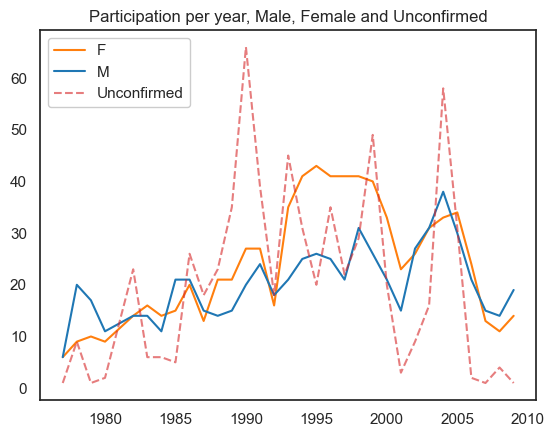

In [54]:
ax = pd.crosstab(bymf[bymf.Gender != 'Unconfirmed']['Year'], 
                 bymf[bymf.Gender != 'Unconfirmed']['Gender'])\
.plot(rot=0, color=['tab:orange','tab:blue'])

pd.crosstab(bymf[bymf.Gender == 'Unconfirmed']['Year'], 
            bymf[bymf.Gender == 'Unconfirmed']['Gender'])\
.plot(rot=0, color=['tab:red'], alpha=0.6, linestyle='dashed', ax=ax)

plt.legend(loc="upper left", ncol=1, facecolor='white', framealpha=1)
plt.title('Participation per year, Male, Female and Unconfirmed', )
ax.set_xlabel('')
plt.show()

In [55]:
# compare proportions
gender_props = pd.crosstab(bymf[bymf.Gender != 'Unconfirmed']['Year'], 
                 bymf[bymf.Gender != 'Unconfirmed']['Gender'], normalize='index').reset_index()\
                .melt(id_vars=['Year'], value_vars=['M','F'])

fig = px.line(gender_props, x="Year", y="value", color='Gender'
,color_discrete_map={'M':'#1f77b4','F':'#ff7f0e'}
    ,title='Participation (unique) per year, Male and Female proportions'
    ,height=500
    ,width=800)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="right",
    x=0.6
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.97)

# change y-axis limits
fig.update_yaxes(range=[0.2, 0.8])

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=16),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.show()

## Event participation

### Event participation by month

The first bar chart shows the participation rate over the entire dataset for each month. The data suggests that events with highest participation rates occur in Autumn. October is the month with the lowest frequency.

The second bar chart shows the number of unique participants over the entire dataset for each month. June tends to have the most unique participants.

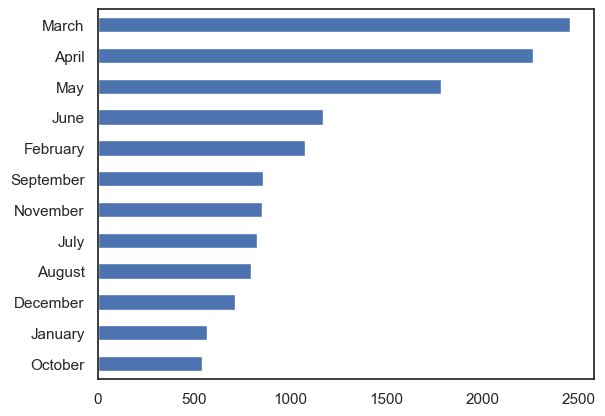

In [56]:
df['Month'] = df['DATE.FROM.(General)'].apply(lambda x: x.strftime('%B'))
df['month_number'] = df['DATE.FROM.(General)'].apply(lambda x: x.strftime('%m'))
ordered_months = df[['Month','month_number']]\
.drop_duplicates()\
.sort_values('month_number')['Month']\
.unique()

df['Month'] = pd.Categorical(df['Month'],categories=ordered_months, ordered=True)

df_noinjuries = df[df['ROLE.CATEGORY.CONCATINATE'] != 'Injured']

df_noinjuries['Month'].value_counts().sort_values().plot(kind='barh')
plt.show()

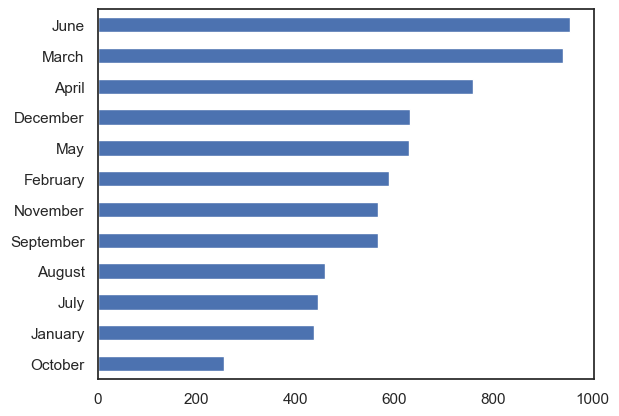

In [57]:
df_noinjuries.drop_duplicates(['PERSON.NUMBER','Month','Year'])['Month']\
.value_counts().sort_values().plot(kind='barh')
plt.show()

### Event participation by month-year

The first bar chart shows the top ten months (within their respective year) with the highest participation rates. March 2004 has the highest participation among all month-years (472 participations). For reference the median participation rate for monthly data is 37 participations.

The second bar chart shows the top ten months (within their respective year) with the highest number of unique participants. November 1990 consisted of 103 unique participants. For reference the median number of unique participants for monthly data is 29.

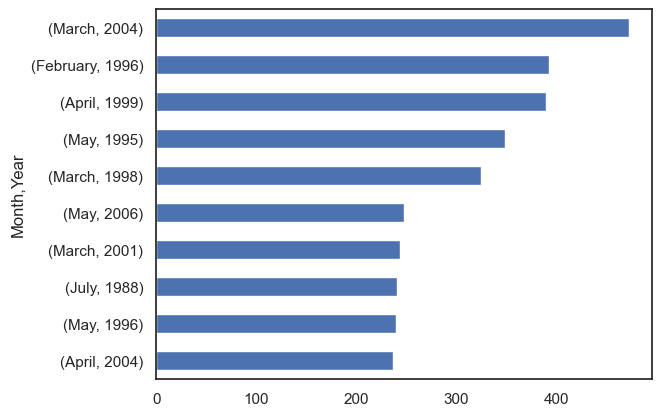

In [58]:
df_noinjuries[['Month','Year']]\
    .value_counts().head(10)\
    .sort_values().plot(kind='barh')
plt.show()

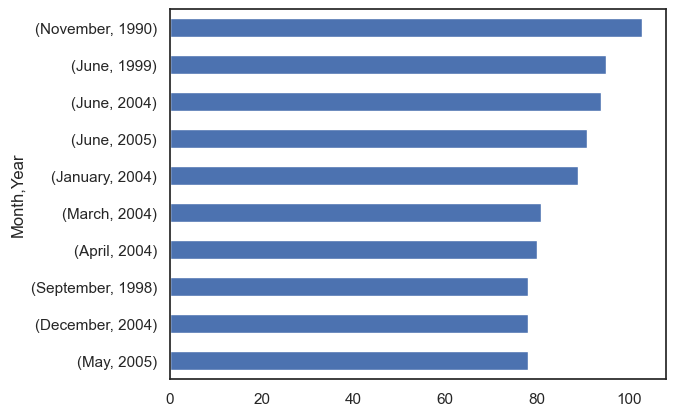

In [59]:
df_noinjuries.drop_duplicates(['PERSON.NUMBER','Month','Year'])[['Month','Year']]\
    .value_counts().head(10)\
    .sort_values().plot(kind='barh')
plt.show()

### Event participation by demi-decade

We use a bar chart to highlight the participation rates across time.

Data has been aggregated into five-year bins. The figure shows a steady incline over the first 20 years, peaking in the 1995-1999 period, and gradually declining.

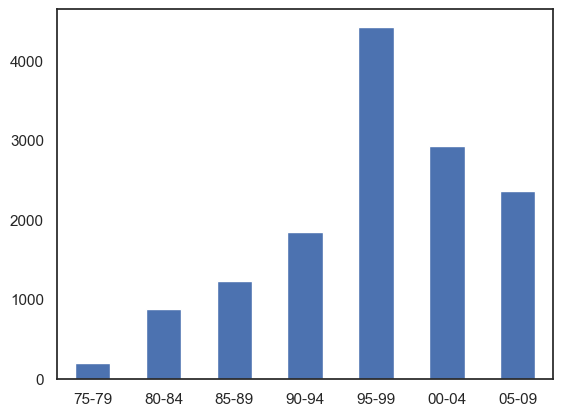

In [60]:
df = df.drop_duplicates()
df['Year'] = df['DATE.FROM.(General)'].apply(lambda x: x.strftime('%Y'))
df['Year'] = df['Year'].astype(int)
df['Year_decade'] = [ int(np.floor(int(year)/5) * 5) 
                            for year in np.array(df['Year'])]

df_noinjuries = df[df['ROLE.CATEGORY.CONCATINATE'] != 'Injured']

ax = df_noinjuries['Year_decade'].value_counts().reset_index().sort_values('index').head(-1)\
.plot(x='index',y='Year_decade', kind='bar', rot=0)

ax.set_xlabel('')
plt.xticks(range(0, 7, 1), ['75-79', '80-84','85-89', '90-94',
                            '95-99', '00-04','05-09'])

# adjust legend
plt.legend().set_visible(False)

### Event participation by year

To get a more granular view of the data, we plot the time as individual years. The highest peak is 1996 with 1257 records. 

Interesting to note that there was no data for the year 1981.

In [61]:
# We provide the top 5 years with the highest number of participants below.

# | Year | Participants |
# | :- | -: |
# | 1998 | 1257 |
# | 1995 | 1090 |
# | 2004 | 1040 |
# | 1998 | 885 |
# | 1993 | 739 |

In [62]:
# ax = df_noinjuries['Year'].\
#     value_counts().\
#     reset_index().\
#     append({'index':1981,'Year':0}, ignore_index=True).\
#     sort_values('index').\
#     head(-1).\
#     plot(x='index',y='Year', rot=0, label='Participation Rates', alpha=0.6)

# ax.set_xlabel('')

# # adjust legend
# plt.legend().set_visible(True)

# # In the figure below, we also include injured persons recorded for each event. 
# # We see a peak in 1993 of 107. 
# # This is quite significant as the median is 6 injuries per year (mean = 15).

# df_injuries = df[df['ROLE.CATEGORY.CONCATINATE'].str.contains('Injured',na=False)]

# # pd.merge(df_injuries['Year'].\
# #     value_counts().\
# #     reset_index(),
# #     pd.DataFrame({'index': list(range(1977, 2010))}),
# #     how='outer').\
# #     fillna(0).\
# #     sort_values('index').\
# #     plot(x='index',y='Year', rot=0, ax=ax, label='Injured')

import plotly.express as px

fig = px.line(df_noinjuries['Year'].\
    value_counts().\
    reset_index().\
    append({'index':1981,'Year':0}, ignore_index=True).\
    sort_values('index').\
    head(-1).\
    rename(columns={'index':'Year','Year':'Count'}), x="Year", y="Count"
    ,title='Participation rates per year'
    ,height=500
    ,width=800, markers=True)

fig.update_traces(line_color='#1f77b4', line_width=3, marker_color='#1f77b4', marker_size=10, opacity=0.6)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="right",
    x=0.6
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.9)

fig.update_traces(textposition="bottom right")

# change y-axis limits
fig.update_yaxes(range=[-100, 1400])

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=16),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.show()

### Unique participants by year

Peaks in 1990 and 2005 appear to be influenced by an increasing number of crew members and administrative staff.

In [63]:
# this is the number of distinct people who participated in each year

# df_noinjuries\
#     .groupby('Year')['PERSON.NUMBER']\
#     .nunique()\
#     .reset_index()\
#     .append({'Year':1981,'PERSON.NUMBER':0}, ignore_index=True)\
#     .sort_values('Year')\
#     .head(-1)\
#     .plot(x='Year',y='PERSON.NUMBER', rot=0, label='Unique Participants', alpha=0.6)

# plt.show()


fig = px.line(df_noinjuries\
    .groupby('Year')['PERSON.NUMBER']\
    .nunique()\
    .reset_index()\
    .append({'Year':1981,'PERSON.NUMBER':0}, ignore_index=True)\
    .sort_values('Year')\
    .head(-1)\
    .rename(columns={'index':'PERSON.NUMBER','PERSON.NUMBER':'Count'}), x="Year", y="Count"
    ,title='Unique participants per year'
    ,height=500
    ,width=800, markers=True)

fig.update_traces(line_color='#1f77b4', line_width=3, marker_color='#1f77b4', marker_size=10, opacity=0.6)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="right",
    x=0.6
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.9)

# change y-axis limits
fig.update_yaxes(range=[-5, 140], tickfont=dict(size=16),title_text='')
fig.update_xaxes(range=[1975, 2010], tickfont=dict(size=14),title_text='')

fig.show()

In [64]:
color_dict2 = {'Crew':'#d62728', 'Administration':'#9467bd','Subsidiary':'#e377c2',
'Performer':'#1f77b4','KeyCreative':'#2ca02c','Musician':'#ff7f0e'} #,'Unknown':'#7f7f7f'}

df_expanded = df_noinjuries.assign(Roles=df_noinjuries['ROLE.CATEGORY.CONCATINATE']\
    .str.split(' ')).explode('Roles').reset_index(drop=True)

df_expanded = df_expanded[(df_expanded['Roles'] != 'Injured') & (df_expanded['Roles'] != 'Unknown')]

fig = px.line(df_expanded\
    .groupby(['Year','Roles'])['PERSON.NUMBER']\
    .nunique()\
    .reset_index()\
    .sort_values('Year')\
    .head(-6)\
    .rename(columns={'PERSON.NUMBER':'Count'}), x="Year", y="Count", color='Roles'
    ,title='Unique participants by role type per year'
    ,height=500
    ,width=800,
    color_discrete_map=color_dict2)

fig.update_traces(opacity=0.8)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.05,
    xanchor="center",
    x=0.5
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.965)

# make y-axis labels larger
fig.update_yaxes(range=[-5, 75], tickfont=dict(size=16),title_text='')
fig.update_xaxes(range=[1975, 2010], tickfont=dict(size=14),title_text='')

fig.show()

### Returning, new and continuing participants

All plots illustrate unique participant rates as counts and proportions. We also plot these trends as area charts (non-stacked and stacked).

We define the following terms:

- Continuing = Someone who participated in all previous years (with no breaks) from the year they started
- Returning = Someone who participated in any previous year but took a break during this period
- New = Someone who participated in this year but not in any previous year

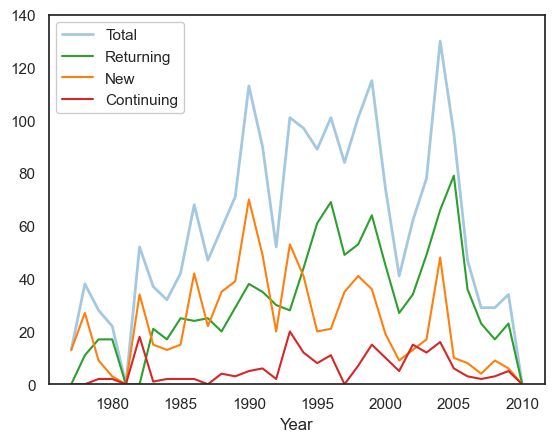

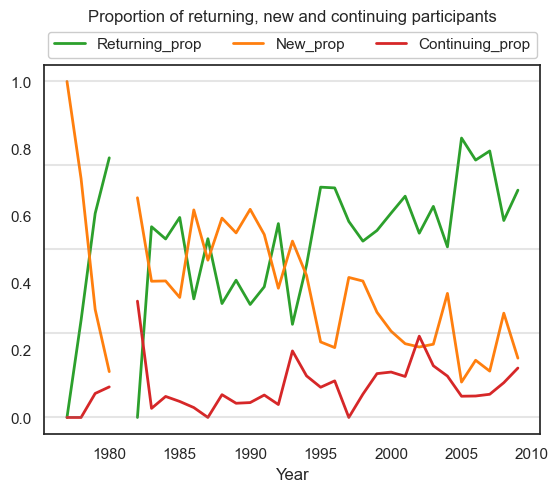

In [65]:
### this is a breakdown of new and returning participant

# lastyear = someone who participated in just previous year
# returning = someone who participated in any previous year
# new = someone who participated in this year but not in any previous year

total_people = []
total_returning = []
total_new = []

for y in range(1977, 2011):
    thisyear = df_noinjuries[df_noinjuries['Year'] == y]
    total_people.append(thisyear['PERSON.NUMBER'].nunique())
    people_from_previous_year = df_noinjuries[df_noinjuries['Year'] == y-1]['PERSON.NUMBER'].unique()
    people_from_previous_years = df_noinjuries[df_noinjuries['Year'] < y]['PERSON.NUMBER'].unique()
    total_returning.append(thisyear[thisyear['PERSON.NUMBER'].isin(people_from_previous_year)]['PERSON.NUMBER'].nunique())
    total_new.append(thisyear[~thisyear['PERSON.NUMBER'].isin(people_from_previous_years)]['PERSON.NUMBER'].nunique())


# create a dataframe with the total number of people who participated in each year
# and the number of new people who participated in each year
df_people = pd.DataFrame({'Year': list(range(1977, 2011)),
                            'Total': total_people,
                            'Returning': total_returning,
                            'New': total_new})
df_people['Continuing'] = df_people['Total'] - df_people['Returning'] - df_people['New']

fig, ax = plt.subplots()

# plot the total number of people who participated in each year
df_people.plot(x='Year',y='Total', rot=0, label='Total', ax=ax, linewidth=2, alpha=0.4, color='tab:blue')
df_people.plot(x='Year',y='Returning', rot=0, label='Returning', ax=ax, color='tab:green')
df_people.plot(x='Year',y='New', rot=0, label='New', ax=ax, color='tab:orange')
df_people.plot(x='Year',y='Continuing', rot=0, label='Continuing', ax=ax, color='tab:red')

ax.set_ylim(0, 140)

plt.legend(loc='upper left', facecolor='white', framealpha=1)
plt.show()

# fetch proportion of people who participated in each year
df_people['Returning_prop'] = df_people['Returning'] / df_people['Total']
df_people['New_prop'] = df_people['New'] / df_people['Total']
df_people['Continuing_prop'] = df_people['Continuing'] / df_people['Total']

# plot proportion of new and returning participants as line plot
df_people.plot(x='Year',y=['Returning_prop','New_prop','Continuing_prop'], rot=0, linewidth=2, 
color = ['tab:green','tab:orange','tab:red'])
plt.title('Proportion of returning, new and continuing participants\n\n')
[plt.axhline(y=x, color='grey', alpha=0.2) for x in [0, 0.25,0.5,0.75,1]]

# move legend 
plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.11), facecolor='white', framealpha=1)
plt.show()

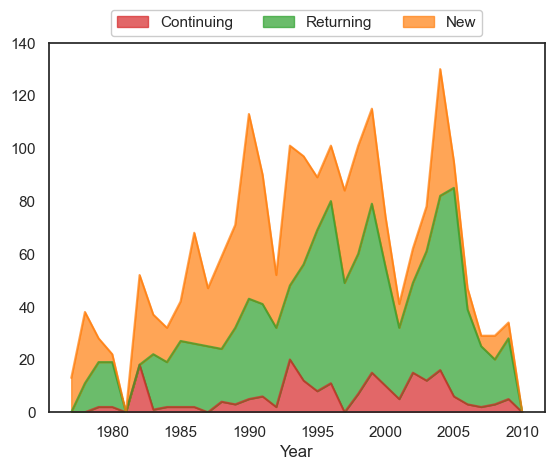

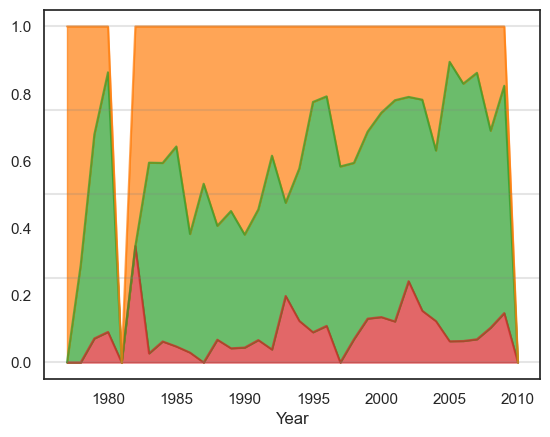

In [66]:
### area chart of above breakdown of new and returning participants

# create area chart of the number of people who participated in each year
df_people.plot.area(x='Year',y=['Continuing','Returning','New'], rot=0, stacked=True, 
color = ['tab:red','tab:green','tab:orange'], alpha=0.7)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.11), facecolor='white', framealpha=1)
plt.ylim(0, 140)

plt.show()

# create area chart of the proportion of people who participated in each year
df_people['Returning_prop'] = df_people['Returning'] / df_people['Total']
df_people['Continuing_prop'] = df_people['Continuing'] / df_people['Total']
df_people['New_prop'] = df_people['New'] / df_people['Total']
df_people.plot.area(x='Year',y=['Continuing_prop','Returning_prop','New_prop'], rot=0, stacked=True, 
color = ['tab:red','tab:green','tab:orange'], alpha=0.7)

# add grid on y
[plt.axhline(y=x, color='grey', alpha=0.2) for x in [0, 0.25,0.5,0.75,1]]
plt.legend().set_visible(False)
plt.show()

### New and continuing/returning participants

All plots illustrate unique participant rates. For these plots we combine the returning and continuing participants into one category.

We define the following terms:

- Continuing/Returning = Someone who participated in any previous year
- New = Someone who participated in this year but not in any previous year

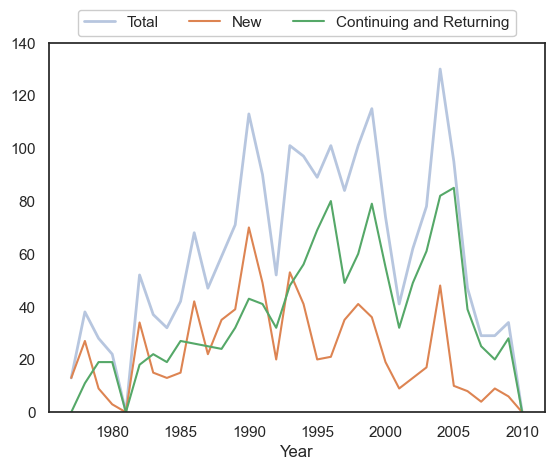

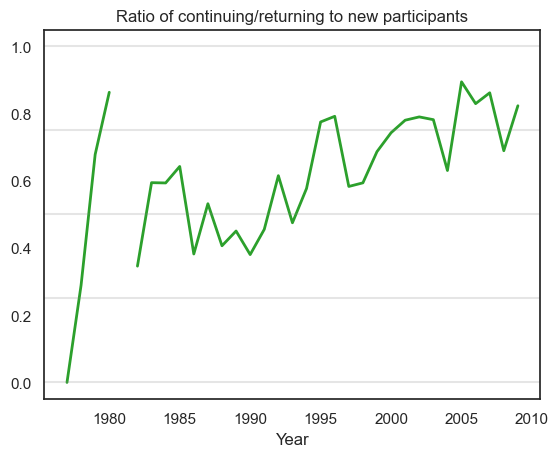

In [67]:
### this is a breakdown of new and continuing/returning participant
total_people = []
total_new = []

for y in range(1977, 2011):
    thisyear = df_noinjuries[df_noinjuries['Year'] == y]
    total_people.append(thisyear['PERSON.NUMBER'].nunique())
    people_from_previous_years = df_noinjuries[df_noinjuries['Year'] < y]['PERSON.NUMBER'].unique()
    total_new.append(thisyear[~thisyear['PERSON.NUMBER'].isin(people_from_previous_years)]['PERSON.NUMBER'].nunique())


# create a dataframe with the total number of people who participated in each year
# and the number of new people who participated in each year
df_people = pd.DataFrame({'Year': list(range(1977, 2011)),
                            'Total': total_people,
                            'New': total_new})
df_people['Continuing and Returning'] = df_people['Total'] - df_people['New']

fig, ax = plt.subplots()

# plot the total number of people who participated in each year
df_people.plot(x='Year',y='Total', rot=0, label='Total', ax=ax, linewidth=2, alpha=0.4)
df_people.plot(x='Year',y='New', rot=0, label='New', ax=ax)
df_people.plot(x='Year',y='Continuing and Returning', rot=0, label='Continuing and Returning', ax=ax)

plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.11) ,facecolor='white', framealpha=1)

ax.set_ylim(0, 140)
plt.show()

# fetch proportion of people who participated in each year
df_people['Returning_prop'] = df_people['Continuing and Returning'] / df_people['Total']
df_people['New_prop'] = df_people['New'] / df_people['Total']

# plot proportion of new and returning participants as line plot
df_people.plot(x='Year',y=['Returning_prop'], rot=0, linewidth=2, 
color = ['tab:green','tab:orange'])
plt.title('Ratio of continuing/returning to new participants')

# add lines at 0.25 and 0.5 0.75
[plt.axhline(y=x, color='grey', alpha=0.2) for x in [0, 0.25,0.5,0.75,1]]

plt.legend().set_visible(False)
plt.show()

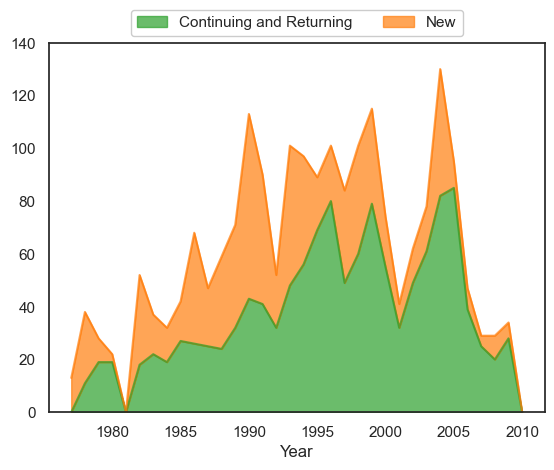

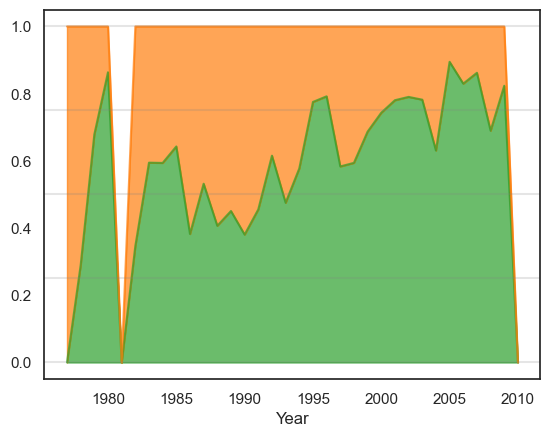

In [68]:
### area chart of above breakdown of new and returning participants

# create area chart of the number of people who participated in each year
df_people.plot.area(x='Year',y=['Continuing and Returning','New'], rot=0, stacked=True, 
color = ['tab:green','tab:orange'], alpha=0.7)
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.11) ,facecolor='white', framealpha=1)
plt.ylim(0, 140)
plt.show()

# create area chart of the proportion of people who participated in each year
df_people['Returning_prop'] = df_people['Continuing and Returning'] / df_people['Total']
df_people['New_prop'] = df_people['New'] / df_people['Total']
df_people.plot.area(x='Year',y=['Returning_prop','New_prop'], rot=0, stacked=True, 
color = ['tab:green','tab:orange'], alpha=0.7)

# add grid on y
[plt.axhline(y=x, color='grey', alpha=0.2) for x in [0, 0.25,0.5,0.75,1]]
plt.legend().set_visible(False)
plt.show()

### Assessing future behaviour of participants
All plots illustrate unique participant rates. We assess the future behaviour of participants by plotting the number of participants who have left the company and the number of participants who have stayed. This is shown alongside new participants.

We define the following terms:

- Left but returned later (temporary leavers) = Someone who participated in the previous year and left the company but returned later
- Left and never returned (discontinued) = Someone who participated in the previous year and left the company and never returned
- New = Someone who participated in this year but not in any previous year
- Leavers = Left but returned later + Left and never returned

It should be noted that anomalies exist for years 1980, 1981 and 2009. 1981 consists of no data, therefore the proportion of 1980 leavers is high. Also there are no temporary leavers for 2009, and this is why we see a zero ratio in the second plot.

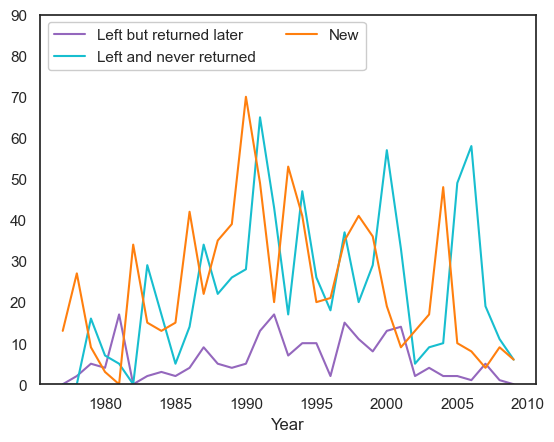

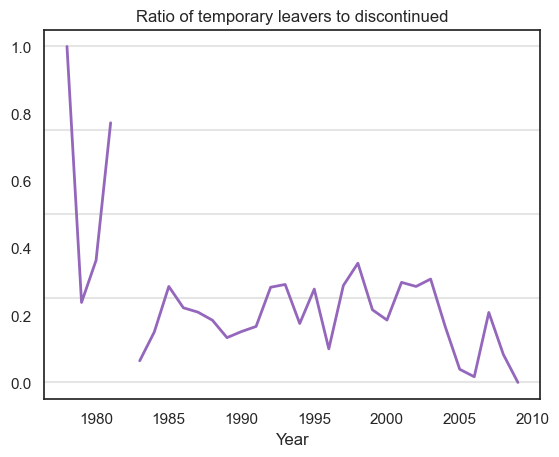

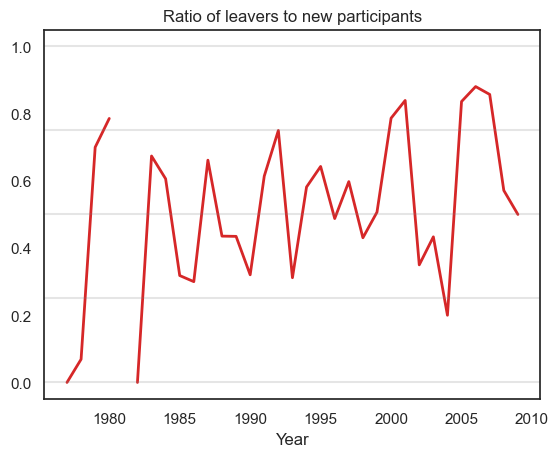

In [69]:
### this is a breakdown of new and continuing/returning participant
total_people = []
total_new = []
total_returning = []
total_left_noreturns= []
total_left_butreturned = []

for y in range(1977, 2010):
    thisyear = df_noinjuries[df_noinjuries['Year'] == y]
    total_people.append(thisyear['PERSON.NUMBER'].nunique())
    people_from_previous_year = df_noinjuries[df_noinjuries['Year'] == y-1]['PERSON.NUMBER'].unique()
    people_from_previous_years = df_noinjuries[df_noinjuries['Year'] < y]['PERSON.NUMBER'].unique()
    people_from_future_years = df_noinjuries[(df_noinjuries['Year'] >= y) & (df_noinjuries['Year'] <= 2009)]['PERSON.NUMBER'].unique()
    total_returning.append(thisyear[thisyear['PERSON.NUMBER'].isin(people_from_previous_year)]['PERSON.NUMBER'].nunique())
    total_new.append(thisyear[~thisyear['PERSON.NUMBER'].isin(people_from_previous_years)]['PERSON.NUMBER'].nunique())
    total_left = [x for x in people_from_previous_year if x not in thisyear['PERSON.NUMBER'].unique()]
    total_left_noreturn = [x for x in people_from_previous_year if x not in people_from_future_years]
    total_left_butreturned.append(len(list(set(total_left) - set(total_left_noreturn))))
    total_left_noreturns.append(len(total_left_noreturn))

# create a dataframe with the total number of people who participated in each year
# and the number of new people who participated in each year
df_people = pd.DataFrame({'Year': list(range(1977, 2010)),
                            'Total': total_people,
                            'LeftbutReturned': total_left_butreturned,
                            'LeftandNoReturn': total_left_noreturns,
                            'New': total_new})

fig, ax = plt.subplots()

# plot the total number of people who participated in each year
df_people.plot(x='Year',y='LeftbutReturned', rot=0, label='Left but returned later', ax=ax, color='tab:purple')
df_people.plot(x='Year',y='LeftandNoReturn', rot=0, label='Left and never returned', ax=ax, color='tab:cyan')
df_people.plot(x='Year',y='New', rot=0, label='New', ax=ax, color='tab:orange')

# make y axis end at 100
ax.set_ylim(0, 90)

plt.legend(loc='upper left', ncol=2, facecolor='white', framealpha=1)
plt.show()

# fetch proportion of people who participated in each year
df_people['TotalLeft'] = df_people['LeftandNoReturn'] + df_people['LeftbutReturned']
df_people['LeftReturned_prop'] = df_people['LeftbutReturned'] / df_people['TotalLeft']
df_people['LeftNoReturn_prop'] = df_people['LeftandNoReturn'] / df_people['TotalLeft']

# plot proportion of new and returning participants as line plot
df_people.plot(x='Year',y=['LeftReturned_prop'], rot=0, linewidth=2, 
color = ['tab:purple','tab:orange'])
plt.title('Ratio of temporary leavers to discontinued')

# add lines at 0.25 and 0.5 0.75
[plt.axhline(y=x, color='grey', alpha=0.2) for x in [0, 0.25,0.5,0.75,1]]

plt.legend().set_visible(False)
plt.show()

fig, ax = plt.subplots()
# fetch proportion of people who participated in each year
df_people['TotalLeftandNew'] = df_people['New'] + df_people['TotalLeft']
df_people['TotalLeftProp'] = df_people['TotalLeft'] / df_people['TotalLeftandNew']
df_people['NewProp'] = df_people['New'] / df_people['TotalLeftandNew']

# plot proportion of new and returning participants as line plot
df_people.head(4).plot(x='Year',y=['TotalLeftProp'], rot=0, linewidth=2, 
color = ['tab:red','tab:orange'], ax=ax)

df_people.tail(-5).plot(x='Year',y=['TotalLeftProp'], rot=0, linewidth=2, 
color = ['tab:red','tab:orange'], ax=ax)

# df_people[].plot(x='Year',y=['TotalLeftProp'], rot=0, linewidth=2, 
# color = ['tab:red','tab:orange'], ax=ax)

plt.title('Ratio of leavers to new participants')

# add lines at 0.25 and 0.5 0.75
[plt.axhline(y=x, color='grey', alpha=0.2) for x in [0, 0.25,0.5,0.75,1]]

plt.legend().set_visible(False)
plt.show()

## Career length

We first assess career length as a number, and then as a binned category. We define career length as the difference between the last and first year of participation. Depending on the plot, there may also be career length differences by role type.

### Career length as a numeric value
The first plot shows the distribution of career length as a series of side-by-side box plots. We can compare this by role and gender. We also provide the same visual but with just males and females included.

It should be noted that these first plots may contain duplicate people but will be represented as different roles i.e., see Tim Coldwell under the Performer, Musician, Key Creative and Crew categories.

The third plot demonstrates the data as a series of density plots by role type. This only show participation data with confirmed gender records (Males, Females). We also layer a rug plot filtered on participants with careers of 15 years or more. We have chosen to attach all role types to each person's career in this visual hence why all colours are present at the 33 year point on the x-axis i.e., Tim Coldwell.

In [70]:
unique_participants = df_noinjuries[['PERSON.NUMBER','COMBINED.NAME','Gender','ROLE.CATEGORY.CONCATINATE','Year','Year_decade']]\
                        .drop_duplicates()\
                        .copy()

unique_participants = unique_participants[unique_participants['Year'] < 2011]

unique_participants['previous_year'] = 0
unique_participants['previous_years'] = 0
# unique_participants['left'] = 0
unique_participants['left_noreturn'] = 0

for y in range(1977, 2011):
    thisyear = unique_participants[unique_participants['Year'] == y]
    people_from_previous_year = unique_participants[unique_participants['Year'] == y-1]['PERSON.NUMBER'].unique()
    people_from_previous_years = unique_participants[unique_participants['Year'] < y-1]['PERSON.NUMBER'].unique()
    people_from_future_years = unique_participants[unique_participants['Year'] > y]['PERSON.NUMBER'].unique()

    for z in thisyear['PERSON.NUMBER'].unique():
        thisrow = (unique_participants['PERSON.NUMBER'] == z) & (unique_participants['Year'] == y)
        unique_participants.loc[thisrow, 'previous_year'] = z in people_from_previous_year
        unique_participants.loc[thisrow, 'previous_years'] = z in people_from_previous_years
        unique_participants.loc[thisrow, 'left_noreturn'] = z not in people_from_future_years

tt = unique_participants.assign(Roles=unique_participants['ROLE.CATEGORY.CONCATINATE']\
    .str.split(' ')).explode('Roles').reset_index(drop=True).copy()

nonreturners = (tt['left_noreturn'] == 1)
oneyearparticipants = (tt['left_noreturn'] == 1) &\
                      (tt['previous_year'] == 0) &\
                      (tt['previous_years'] == 0)

continuing =(tt['previous_year'] == 1)

In [71]:
tt2 = df_noinjuries.assign(Roles=df_noinjuries['ROLE.CATEGORY.CONCATINATE']\
    .str.split(' ')).explode('Roles').reset_index(drop=True).copy()

first_occurrence = tt2[(tt2.Roles != 'Injured') & (tt2.Roles != 'Unknown')]\
    .drop_duplicates(['PERSON.NUMBER','Roles','Year'], keep='first')\
    .drop_duplicates(['PERSON.NUMBER','Roles'], keep='first')

last_occurrence = tt2[(tt2.Roles != 'Injured') & (tt2.Roles != 'Unknown')]\
    .drop_duplicates(['PERSON.NUMBER','Roles','Year'], keep='last')\
    .drop_duplicates(['PERSON.NUMBER','Roles'], keep='last')

data = pd.merge(last_occurrence, first_occurrence[['PERSON.NUMBER','Roles','Year']], on=['PERSON.NUMBER','Roles'], how='inner')
data['Year_diff']  = (data['Year_x'] - data['Year_y'])+1

# replace Gender value `0` to "Unknown"
data.Gender.replace(0, 'Unconfirmed', inplace=True)
data.Gender.replace('U', 'Unconfirmed', inplace=True)

data4 = data.copy()

color_dict2 = {'Crew':'#d62728', 'Administration':'#9467bd','Subsidiary':'#e377c2',
'Performer':'#1f77b4','KeyCreative':'#2ca02c','Musician':'#ff7f0e','Unknown':'#7f7f7f'}


fig = px.box(
    data_frame = data[(~data.Roles.isnull())]
    ,y = 'Year_diff'
    ,x = 'Gender'
    ,color = 'Roles'
    ,color_discrete_map=color_dict2
    ,hover_data=['COMBINED.NAME']
    ,points='all'
)

fig.update_traces(
    hovertemplate="<br>".join([
        "%{customdata[0]}",
        "%{y}, %{x}"
    ])
)

# make points transparent
fig.update_traces(marker_size=9, marker_line_color='white', marker_line_width=1, opacity=0.7)

# make figure larger
fig.update_layout(height=500, width=800)

# move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=.925
))

# add a title
fig.update_layout(yaxis_title='', xaxis_title='',
title_text='Career length (in years) with Circus Oz by Gender and Role', title_x=0.5,
margin=dict(l=30, r=30, t=90, b=0))

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=16))
fig.update_xaxes(tickfont=dict(size=16))

# change x-axis labels
fig.update_xaxes(tickvals=['M','F','Unconfirmed'], ticktext=['Male','Female','Unconfirmed/Unknown'])

fig.show()

In [72]:
fig = px.box(
    data_frame = data[data.Gender.isin(['M','F']) & (data.Roles != 'Unknown')\
        & (~data.Roles.isnull())]
    ,y = 'Year_diff'
    ,x = 'Gender'
    ,color = 'Roles'
    ,color_discrete_map=color_dict2
    ,hover_data=['COMBINED.NAME']
    ,points='all'
)

fig.update_traces(
    hovertemplate="<br>".join([
        "%{customdata[0]}",
        "%{y}, %{x}"
    ])
)

# make points transparent
fig.update_traces(marker_size=9, marker_line_color='white', marker_line_width=1, opacity=0.7)

# make figure larger
fig.update_layout(height=500, width=800)

# move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="center",
    x=.5
))

# add a title
fig.update_layout(yaxis_title='', xaxis_title='',
title_text='Career length (in years) with Circus Oz by Gender and Role', title_x=0.5,
margin=dict(l=30, r=30, t=90, b=0))

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=16))
fig.update_xaxes(tickfont=dict(size=16))

# change x-axis labels
fig.update_xaxes(tickvals=['M','F'], ticktext=['Male','Female'])

fig.show()

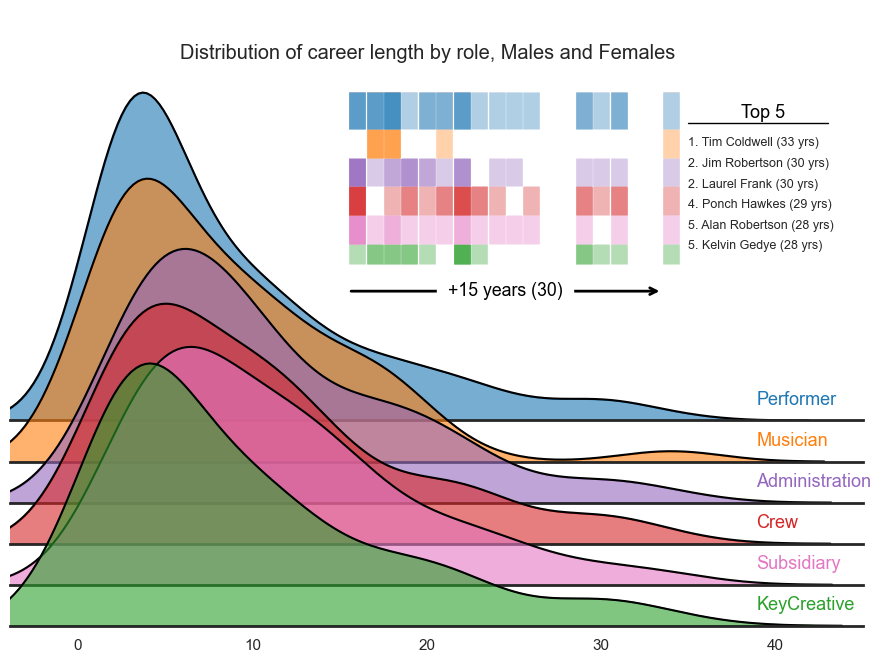

In [73]:
unique_participants123 = df_noinjuries[['PERSON.NUMBER','COMBINED.NAME','Gender','ROLE.CATEGORY.CONCATINATE','Year','Year_decade']]\
                        .drop_duplicates()\
                        .copy()

unique_participants123 = unique_participants123[unique_participants123['Year'] < 2011]

tt123 = unique_participants123.assign(Roles=unique_participants123['ROLE.CATEGORY.CONCATINATE']\
    .str.split(' ')).explode('Roles').reset_index(drop=True).copy()

first_occurrence123 = tt123[tt123.Roles != 'Injured'].drop_duplicates(['PERSON.NUMBER','Year'], keep='first')\
    .drop_duplicates(['PERSON.NUMBER'], keep='first')

last_occurrence123 = tt123[tt123.Roles != 'Injured'].drop_duplicates(['PERSON.NUMBER','Year'], keep='last')\
    .drop_duplicates(['PERSON.NUMBER'], keep='last')

data123 = pd.merge(last_occurrence123, first_occurrence123[['PERSON.NUMBER','Year']], on=['PERSON.NUMBER'], how='inner')
data123['Year_diff']  = (data123['Year_x'] - data123['Year_y'])+1

# # replace Gender value `0` to "Unknown"
# data.Gender.replace(0, 'Unconfirmed', inplace=True)
# data.Gender.replace('U', 'Unconfirmed', inplace=True)

tt_withyrdiff123 = pd.merge(tt123, data123[['PERSON.NUMBER','Year_diff']], on='PERSON.NUMBER')
tt_withyrdiff_roles123 = tt_withyrdiff123.drop_duplicates(subset=['PERSON.NUMBER','Roles'])

# replace Gender value `0` to "Unknown"
tt_withyrdiff_roles123.Gender.replace(0, 'Unconfirmed', inplace=True)
tt_withyrdiff_roles123.Gender.replace('U', 'Unconfirmed', inplace=True)
data234 = tt_withyrdiff_roles123[tt_withyrdiff_roles123.Gender != 'Unconfirmed']
data234['Year_diff'] = data234['Year_diff'] + 1

def upper_rugplot(data, height=.05, ax=None, **kwargs):
    from matplotlib.collections import LineCollection
    ax = ax or plt.gca()
    kwargs.setdefault("linewidth", 1)
    segs = np.stack((np.c_[data, data],
                     np.c_[np.ones_like(data), np.ones_like(data)-height]),
                    axis=-1)
    lc = LineCollection(segs, transform=ax.get_xaxis_transform(), **kwargs)
    ax.add_collection(lc)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})  
palette = color_dict2 #sns.color_palette("Paired", 8)    

# original_order = ['Administration', 'Subsidiary','Crew', 'Performer', 'KeyCreative', 'Musician']
original_order = ['Performer', 'Musician', 'Administration','Crew','Subsidiary', 'KeyCreative']
data234['Roles'] = pd.Categorical(data234['Roles'], categories=original_order, ordered=True)
 
g = sns.FacetGrid(data234[data234.Roles != 'Unknown'], palette=palette, row="Roles", hue="Roles", aspect=8, height=1.2)  
g.map_dataframe(sns.kdeplot, x="Year_diff", fill=True, alpha=0.6)  
g.map_dataframe(sns.kdeplot, x="Year_diff", color='black')    

data_over15 = data234[data234['Year_diff'] >= 16]

upper_rugplot(data_over15[data_over15['Roles'] == 'KeyCreative']['Year_diff'], 
color=palette['KeyCreative'], alpha=0.35, linewidth=12, height=0.42, ax=g.axes[2,0])
upper_rugplot(range(16,40), color='white', linewidth=14, height=.37, ax=g.axes[2,0])  

upper_rugplot(data_over15[data_over15['Roles'] == 'Subsidiary']['Year_diff'], 
color=palette['Subsidiary'], linewidth=12, height=0.37, ax=g.axes[2,0], alpha=0.35) 
upper_rugplot(range(16,40), color='white', linewidth=14, height=.30, ax=g.axes[2,0]) 

upper_rugplot(data_over15[data_over15['Roles'] == 'Crew']['Year_diff'], 
color=palette['Crew'], linewidth=12, height=0.30, ax=g.axes[2,0], alpha=0.35) 
upper_rugplot(range(16,40), color='white', linewidth=14, height=.23, ax=g.axes[2,0]) 

upper_rugplot(data_over15[data_over15['Roles'] == 'Administration']['Year_diff'], 
color=palette['Administration'], linewidth=12, height=0.23, ax=g.axes[2,0], alpha=0.35) 
upper_rugplot(range(16,40), color='white', linewidth=14, height=.16, ax=g.axes[2,0])  

upper_rugplot(data_over15[data_over15['Roles'] == 'Musician']['Year_diff'], 
color=palette['Musician'], linewidth=12, height=.16, ax=g.axes[2,0], alpha=0.35) 
upper_rugplot(range(16,40), color='white', linewidth=14, height=.09, ax=g.axes[2,0])  

upper_rugplot(data_over15[data_over15['Roles'] == 'Performer']['Year_diff'], 
color=palette['Performer'], linewidth=12, height=.09, ax=g.axes[2,0],  alpha=0.35)
upper_rugplot(range(16,40), color='white', linewidth=14, height=.02, ax=g.axes[1,0])  

def label(x, color, label):      
    ax = plt.gca()      
    ax.text(0.875, .05, label, color=color, fontsize=13,      
    ha="left", va="center", transform=ax.transAxes)    

# # add arrow from 10 to 11
ax = g.axes[2,0]
ax.annotate("", xy=(33.5, 0.0515), xytext=(15.5, 0.0515), arrowprops=dict(arrowstyle="->", color='black', linewidth=2))

# annotaion under arrow
ax.annotate("+15 years (30)", xy=(24.5, 0.0515), xytext=(24.5, 0.0515), fontsize=12.75, 
ha="center", va="center", color='black',
bbox=dict(boxstyle='square,pad=.6',facecolor='white', edgecolor='white'))

# top 5
ax.annotate("Top 5", xy=(39.25, 0.095), xytext=(39.25, 0.095), fontsize=13, ha="center", va="center", color='black')
ax.plot([35, 43], [0.0925, 0.0925], color='black', linewidth=1)
ax.annotate("1. Tim Coldwell (33 yrs)", xy=(35, 0.0875), xytext=(35, 0.0875), fontsize=9, ha="left", va="center")
ax.annotate("2. Jim Robertson (30 yrs)", xy=(35, 0.0825), xytext=(35, 0.0825), fontsize=9, ha="left", va="center")
ax.annotate("2. Laurel Frank (30 yrs)", xy=(35, 0.0775), xytext=(35, 0.0775), fontsize=9, ha="left", va="center")
ax.annotate("4. Ponch Hawkes (29 yrs)", xy=(35, 0.0725), xytext=(35, 0.0725), fontsize=9, ha="left", va="center")
ax.annotate("5. Alan Robertson (28 yrs)", xy=(35, 0.0675), xytext=(35, 0.0675), fontsize=9, ha="left", va="center")
ax.annotate("5. Kelvin Gedye (28 yrs)", xy=(35, 0.0625), xytext=(35, 0.0625), fontsize=9, ha="left", va="center")

g.map(label, "Roles")  
g.fig.subplots_adjust(hspace=-0.9)
g.set_titles("")  
g.set(yticks=[], xlabel="", ylabel="", xlim=[-3.9, 45], ylim=[0, 0.1])  
g.despine( left=True)

plt.suptitle('Distribution of career length by role, Males and Females', x=0.52, y=0.9)  
plt.show()

### Career length as a binned category
We categorise participants by their respective career legnth - this amounts to 7 groups. The first plot clearly shows that the majority of participants have a career length of 1 years. The second plot reveals that the majority of these one-year participants are people with unconfirmed or unknown gender records.

In [74]:
def get_tenure_bins(data):
    tenure = data['Year_diff'].value_counts().reset_index().sort_values('index')\
        .rename(columns={'index':'tenure', 'Year_diff':'count'})
    tenures =[tenure[tenure.tenure == 1]['count'].sum(), # 1yr
            tenure[tenure.tenure == 2]['count'].sum(), # 2yrs
            tenure[tenure.tenure.isin(range(3, 6))]['count'].sum(),  # 3-5yrs
            tenure[tenure.tenure.isin(range(6, 11))]['count'].sum(),  # 6-10yrs
            tenure[tenure.tenure.isin(range(11, 16))]['count'].sum(),  # 11-15yrs
            tenure[tenure.tenure.isin(range(16, 21))]['count'].sum(), # 16-20yrs
            tenure[tenure.tenure >= 21]['count'].sum()]  # 21+ yrs

    tenures = pd.DataFrame(tenures, columns=['count'], 
    index=['1 year','2 years','3-5 years','6-10 years','11-15 years','16-20 years','21+ years'])
    return tenures

tt = unique_participants.assign(Roles=unique_participants['ROLE.CATEGORY.CONCATINATE']\
    .str.split(' ')).explode('Roles').reset_index(drop=True).copy()

first_occurrence = tt[tt.Roles != 'Injured'].drop_duplicates(['PERSON.NUMBER','Year'], keep='first')\
    .drop_duplicates(['PERSON.NUMBER'], keep='first')

last_occurrence = tt[tt.Roles != 'Injured'].drop_duplicates(['PERSON.NUMBER','Year'], keep='last')\
    .drop_duplicates(['PERSON.NUMBER'], keep='last')

data = pd.merge(last_occurrence, first_occurrence[['PERSON.NUMBER','Year']], on='PERSON.NUMBER', how='inner')
data['Year_diff']  = (data['Year_x'] - data['Year_y'])+1

# replace Gender value `0` to "Unknown"
data.Gender.replace(0, 'Unconfirmed', inplace=True)
data.Gender.replace('U', 'Unconfirmed', inplace=True)

data3 = data.copy()

career_binned = get_tenure_bins(data)

# get proportion as a percentage
career_binned['proportion'] = round(career_binned['count'] / career_binned['count'].sum() * 100,2).astype(str) + '%'

# plot bar chart
fig = px.bar(career_binned, x=career_binned.index, y='count', text='proportion')

# make points transparent
fig.update_traces(marker_color=['#ff7f0e','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4'])

# add bar label
fig.update_traces(texttemplate='%{text}', textposition='outside', textfont_size=16)


# change angle of x-axis ticks
fig.update_xaxes(tickangle=0)

# Change the bar mode
fig.update_layout(height=500, width=800, 
title_text='Career length (in years) with Circus Oz', title_x=0.5,
margin=dict(l=50, r=50, t=70, b=50))

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=16))
fig.update_xaxes(tickfont=dict(size=14))

# make y-axis limits larger
fig.update_yaxes(range=[0, 495])

# no legend
fig.update_layout(showlegend=False)

fig.show()


In [75]:
# tt_withyrdiff = pd.merge(tt, data[['PERSON.NUMBER','Year_diff']], on='PERSON.NUMBER')
# tt_withyrdiff_roles = tt_withyrdiff.drop_duplicates(subset=['PERSON.NUMBER','Roles'])

career_binned_byrole_all = pd.DataFrame()
career_binned_byrole = get_tenure_bins(data[(data['Gender'] =='M')])
career_binned_byrole['Gender'] = 'Male'
career_binned_byrole_all = career_binned_byrole_all.append(career_binned_byrole)

career_binned_byrole = get_tenure_bins(data[(data['Gender'] =='F')])
career_binned_byrole['Gender'] = 'Female'
career_binned_byrole_all = career_binned_byrole_all.append(career_binned_byrole)

career_binned_byrole = get_tenure_bins(data[~(data['Gender'].isin(['M','F']))])
career_binned_byrole['Gender'] = 'Unconfirmed/Unknown'
career_binned_byrole_all = career_binned_byrole_all.append(career_binned_byrole)

fig = px.bar(
    data_frame = career_binned_byrole_all
    ,y = 'count'
    ,x = career_binned_byrole_all.index
    ,color = 'Gender'
    ,color_discrete_map={'Male':'#1f77b4','Female':'#ff7f0e','Unconfirmed/Unknown':'#d62728'}
    # ,facet_col='Gender'
    ,barmode='group'
    ,title='Career length by gender'
    ,height=500
    ,width=800
)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="right",
    x=0.75
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.97)

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=16),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='Years with Circus Oz')

# change x-axis labels
fig.update_xaxes(ticktext=['1','2','3-5','6-10','11-15','16-20','21+'], 
tickvals=['1 year','2 years','3-5 years','6-10 years','11-15 years','16-20 years','21+ years'])

fig.show()

### Participants with one-year careers by role
We focus on these participants with an interactive dot plot - hover over points for person-level data. We can see that the majority of these one-year participants are administration and crew workers.

It should be noted that there may be multiple same people records in the plot below as they may have been assigned different roles in the same year.

In [76]:
data = tt[oneyearparticipants & (tt['Roles'] != 'Injured')].drop('ROLE.CATEGORY.CONCATINATE', axis=1).drop_duplicates()
data.sort_values(by='Roles', ascending=False, inplace=True)

# replace Gender value `0` to "Unknown"
data.Gender.replace(0, 'Unconfirmed', inplace=True)
data.Gender.replace('U', 'Unconfirmed', inplace=True)

data = data[data['Roles'] != 'Unknown']

fig = px.strip(data, x='Year', y='Roles', color="Gender", hover_data=['COMBINED.NAME'], stripmode='overlay',
color_discrete_map={'M': '#1f77b4', 'F': '#ff7f0e', 'Unconfirmed': '#d62728'})

# add jitter
# make hover have no title, just the value
fig.update_traces(
    hovertemplate="<br>".join([
        "%{customdata[0]}",
        "%{y},%{x}"
    ])
)
# # add color_map to change data points
# color_map = {'M': 'tab:blue', 'F': 'tab:orange', 'U': 'tab:green', 'O': 'tab:red'}

# move legend to top and horizontal
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=0.93,
    xanchor="right",
    x=1,
    font=dict(size=15),
    # make background a little transparent
    bgcolor='rgba(255,255,255,0.5)',
    bordercolor='black',
    borderwidth=1
))


# add marker outline
fig.update_traces(marker_line_width=1, marker_line_color='black')

# change marker colour according Gender
fig.update_traces(marker=dict(size=24),
                    jitter=1, 
                    opacity=0.55)

# make figure wider
fig.update_layout(width=800, height=800)

# add gridlines for y-axis
fig.update_yaxes(showgrid=True, gridwidth=1, tickfont=dict(size=14), title_text='')
fig.update_xaxes(showgrid=True, tickfont=dict(size=14), title_text='',showticklabels=False)

# 1990    156
# 1985    103
# 1995     73
# 1980     44
# 2000     43
# 1975     26
# 2005     22

# 1990    151
# 1985     73
# 1995     55
# 2000     42
# 1980     31
# 1975     26
# 2005     22

# add annotation for demi-decade sums
fig.add_annotation(x=0.015,y=-0.05, xref="paper", yref="paper", text="77-79", showarrow=False, font=dict(size=14), align="left")
fig.add_annotation(x=0.035,y=1.035, xref="paper", yref="paper", text="(26)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)

fig.add_annotation(x=0.145,y=-0.05, xref="paper", yref="paper", text="80-84", showarrow=False, font=dict(size=14), align="left")
fig.add_annotation(x=0.165,y=1.035, xref="paper", yref="paper", text="(31)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)

fig.add_annotation(x=0.295,y=-0.05, xref="paper", yref="paper", text="85-89", showarrow=False, font=dict(size=14), align="left")
fig.add_annotation(x=0.315,y=1.035, xref="paper", yref="paper", text="(73)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)

fig.add_annotation(x=0.475,y=-0.05, xref="paper", yref="paper", text="90-94", showarrow=False, font=dict(size=14), align="left")
fig.add_annotation(x=0.475,y=1.035, xref="paper", yref="paper", text="(151)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)

fig.add_annotation(x=0.615,y=-0.05, xref="paper", yref="paper", text="95-99", showarrow=False, font=dict(size=14), align="left")
fig.add_annotation(x=0.615,y=1.035, xref="paper", yref="paper", text="(55)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)

fig.add_annotation(x=0.8,y=-0.05, xref="paper", yref="paper", text="00-04", showarrow=False, font=dict(size=14), align="left")
fig.add_annotation(x=0.78,y=1.035, xref="paper", yref="paper", text="(42)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)

fig.add_annotation(x=0.95,y=-0.05, xref="paper", yref="paper", text="05-09", showarrow=False, font=dict(size=14), align="left")
fig.add_annotation(x=0.94,y=1.035, xref="paper", yref="paper", text="(22)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)

# Crew              156 155
# Administration    108
# Unknown            67
# Subsidiary         53
# Performer          47 48
# KeyCreative        23
# Musician           13

# add annotation for role sums
fig.add_annotation(x=1.075,y=0.875, xref="paper", yref="paper", text="(108)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)
fig.add_annotation(x=1.075,y=0.725, xref="paper", yref="paper", text="(155)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)
fig.add_annotation(x=1.0725,y=0.55, xref="paper", yref="paper", text="(23)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)
fig.add_annotation(x=1.0725,y=0.395, xref="paper", yref="paper", text="(13)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)
fig.add_annotation(x=1.0725,y=0.225, xref="paper", yref="paper", text="(48)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)
fig.add_annotation(x=1.0725,y=0.075, xref="paper", yref="paper", text="(53)", showarrow=False, font=dict(size=13.5), align="left",opacity=0.8)
# fig.add_annotation(x=1.05,y=0.05, xref="paper", yref="paper", text="(67)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)


# make y-limits bigger
fig.update_yaxes(range=[-0.5, 5.95])

# add title
fig.update_layout(title_text="Participants with one-year careers with Circus Oz", title_font_size=20, title_x=0.5, title_y=0.995)

fig.show()

### Career length as a binned category (cont.)
Below we show the differences between role, gender and career length categories. This is an interactive plot, and role type filtering can be appliedto get a more granular comparison of the data.

Some insights from this plot:
- A majority of male performers are only with Circus Oz for under a year.
- Female performers populate more evenly across shorter career length groups.
- Male musicians have more one-year career participants than female.
- Most male key creatives have a career length of either 1 year or 3-5 years.
- Female admin workers tend to have longer careers than male admin workers.
- A majority of female crew workers are only with Circus Oz for under a year.

In [77]:
# tt_withyrdiff = pd.merge(tt, data3[['PERSON.NUMBER','Year_diff']], on='PERSON.NUMBER')
# tt_withyrdiff_roles = tt_withyrdiff.drop_duplicates(subset=['PERSON.NUMBER','Roles'])

tt_withyrdiff_roles = data4

career_binned = get_tenure_bins(tt_withyrdiff_roles)
career_binned_byrole_all = pd.DataFrame()

for role in tt_withyrdiff_roles[~tt_withyrdiff_roles['Roles'].isnull()]['Roles'].unique():
    if (role == 'Unknown') | (role == 'Injured'): continue
    career_binned_byrole = get_tenure_bins(tt_withyrdiff_roles[(tt_withyrdiff_roles['Gender'] =='M') &\
        (tt_withyrdiff_roles['Roles'] == role)])
    career_binned_byrole['Roles'] = role
    career_binned_byrole['Gender'] = 'Male'
    career_binned_byrole_all = career_binned_byrole_all.append(career_binned_byrole)

for role in tt_withyrdiff_roles[~tt_withyrdiff_roles['Roles'].isnull()]['Roles'].unique():
    if (role == 'Unknown') | (role == 'Injured'): continue
    career_binned_byrole = get_tenure_bins(tt_withyrdiff_roles[(tt_withyrdiff_roles['Gender'] =='F') &\
        (tt_withyrdiff_roles['Roles'] == role)])
    career_binned_byrole['Roles'] = role
    career_binned_byrole['Gender'] = 'Female'
    career_binned_byrole_all = career_binned_byrole_all.append(career_binned_byrole)

fig = px.bar(
    data_frame = career_binned_byrole_all
    ,y = 'count'
    ,x = career_binned_byrole_all.index
    ,color = 'Roles'
    ,color_discrete_map=color_dict2
    ,facet_col='Gender'
    ,title='Career length by role and gender'
    ,height=500
    ,width=800
)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="center",
    x=0.5
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.97)

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='Years with Circus Oz')

# change x-axis labels
fig.update_xaxes(ticktext=['1','2','3-5','6-10','11-15','16-20','21+'], 
tickvals=['1 year','2 years','3-5 years','6-10 years','11-15 years','16-20 years','21+ years'])

fig.show()

In [32]:
# import plotly.express as px
# data = tt[nonreturners & (tt['Roles'] != 'Injured')].drop('ROLE.CATEGORY.CONCATINATE', axis=1).drop_duplicates()
# data.sort_values(by='Roles', ascending=False, inplace=True)

# fig = px.strip(data, x='Year', y='Roles', color="Gender", hover_data=['COMBINED.NAME'], stripmode='overlay',
# color_discrete_sequence = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c','#2ca02c'])

# # add jitter
# # make hover have no title, just the value
# fig.update_traces(
#     hovertemplate="<br>".join([
#         "%{customdata[0]}",
#         "%{y},%{x}"
#     ])
# )

# # move legend to top and horizontal
# fig.update_layout(legend=dict(
#     orientation="h",
#     yanchor="bottom",
#     y=0.93,
#     xanchor="right",
#     x=1,
#     font=dict(size=15),
#     bgcolor='rgba(255,255,255,0.5)',
#     bordercolor='black',
#     borderwidth=1
# ))


# # add marker outline
# fig.update_traces(marker_line_width=1, marker_line_color='black')

# # change marker colour according Gender
# fig.update_traces(marker=dict(size=28),
#                     jitter=1, 
#                     opacity=0.55)

# # make figure wider
# fig.update_layout(height=800)

# # add gridlines for y-axis
# fig.update_yaxes(showgrid=True, gridwidth=1, tickfont=dict(size=15), title_text='')
# fig.update_xaxes(showgrid=True, tickfont=dict(size=16), title_text='',showticklabels=False)

# # 1990    198
# # 1995    161
# # 2005    128
# # 1985    124
# # 2000    106
# # 1980     56
# # 1975     23

# # add annotation for demi-decade sums
# fig.add_annotation(x=0.025,y=-0.05, xref="paper", yref="paper", text="77-79", showarrow=False, font=dict(size=18), align="left")
# fig.add_annotation(x=0.045,y=1.0375, xref="paper", yref="paper", text="(23)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)

# fig.add_annotation(x=0.145,y=-0.05, xref="paper", yref="paper", text="80-84", showarrow=False, font=dict(size=18), align="left")
# fig.add_annotation(x=0.165,y=1.0375, xref="paper", yref="paper", text="(56)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)

# fig.add_annotation(x=0.295,y=-0.05, xref="paper", yref="paper", text="85-89", showarrow=False, font=dict(size=18), align="left")
# fig.add_annotation(x=0.315,y=1.0375, xref="paper", yref="paper", text="(124)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)

# fig.add_annotation(x=0.475,y=-0.05, xref="paper", yref="paper", text="90-94", showarrow=False, font=dict(size=18), align="left")
# fig.add_annotation(x=0.475,y=1.0375, xref="paper", yref="paper", text="(198)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)

# fig.add_annotation(x=0.615,y=-0.05, xref="paper", yref="paper", text="95-99", showarrow=False, font=dict(size=18), align="left")
# fig.add_annotation(x=0.615,y=1.0375, xref="paper", yref="paper", text="(161)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)

# fig.add_annotation(x=0.8,y=-0.05, xref="paper", yref="paper", text="00-04", showarrow=False, font=dict(size=18), align="left")
# fig.add_annotation(x=0.78,y=1.0375, xref="paper", yref="paper", text="(106)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)

# fig.add_annotation(x=0.95,y=-0.05, xref="paper", yref="paper", text="05-09", showarrow=False, font=dict(size=18), align="left")
# fig.add_annotation(x=0.94,y=1.0375, xref="paper", yref="paper", text="(128)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)

# # Crew              253
# # Administration    175
# # Subsidiary        133
# # Performer         132
# # Unknown            70
# # KeyCreative        65
# # Musician           31

# # add annotation for role sums
# fig.add_annotation(x=1.055,y=0.885, xref="paper", yref="paper", text="(175)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)
# fig.add_annotation(x=1.055,y=0.75, xref="paper", yref="paper", text="(253)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)
# fig.add_annotation(x=1.05,y=0.6125, xref="paper", yref="paper", text="(65)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)
# fig.add_annotation(x=1.05,y=0.48, xref="paper", yref="paper", text="(31)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)
# fig.add_annotation(x=1.055,y=0.35, xref="paper", yref="paper", text="(132)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)
# fig.add_annotation(x=1.055,y=0.21, xref="paper", yref="paper", text="(133)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)
# fig.add_annotation(x=1.05,y=0.08, xref="paper", yref="paper", text="(70)", showarrow=False, font=dict(size=15), align="left",opacity=0.8)


# # make y-limits bigger
# fig.update_yaxes(range=[-0.75, 7.05])

# # add title
# fig.update_layout(title_text="Participants who never returned", title_font_size=20, title_x=0.5, title_y=0.9925)

# fig.show()

### Individual career trajectories

The following plots looks at few groups of individuals with different career trajectories. We have chosen to focus on the following groups:

- Participants with more than 15 years with Circus Oz. This can include people who have left and returned.
- Participants with more than 15 years with Circus Oz who have been predominantly active over their career with Circus Oz. We define predominantly active as having more than 50% of their career length with Circus Oz.
- Participants who have continously been with Circus Oz since they started with no breaks until 2009.

It should be noted that the annual break in 1981 does not reflect a break in the career of these individuals, rather an indication of missing data.

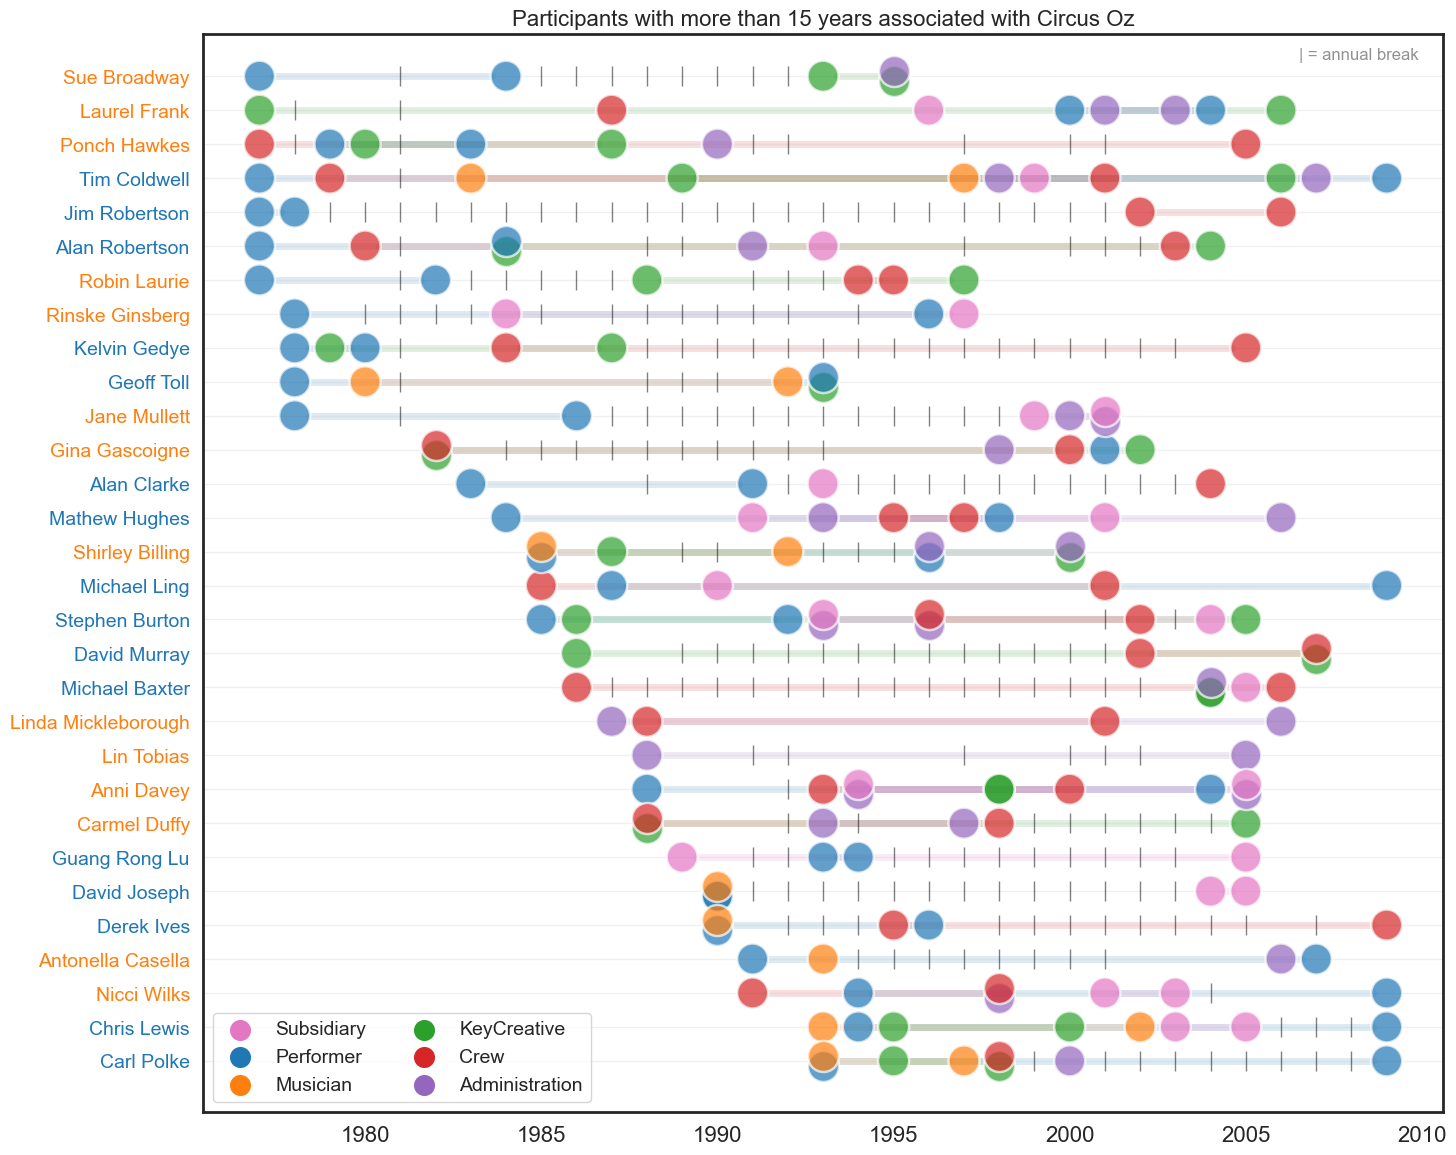

In [78]:
tt_withyrdiff = pd.merge(tt123, data234[['PERSON.NUMBER','Year_diff']], on='PERSON.NUMBER')
tt_withyrdiff_roles = tt_withyrdiff.drop_duplicates(subset=['PERSON.NUMBER','Roles'])

leftforever_pno = list(tt_withyrdiff_roles[tt_withyrdiff_roles['Year_diff']>=17]['PERSON.NUMBER'].unique())
continued_pno = tt123[(tt123['PERSON.NUMBER'].isin(leftforever_pno))].sort_values('Year',ascending=True).drop_duplicates(['PERSON.NUMBER'])

continuers = tt123[tt123['PERSON.NUMBER'].isin(continued_pno['PERSON.NUMBER'].unique())]
continuers = continuers[~continuers['ROLE.CATEGORY.CONCATINATE'].isnull()]

first_occurrence = continuers.drop_duplicates(['PERSON.NUMBER','Roles','Year'], keep='first')\
    .drop_duplicates(['PERSON.NUMBER','Roles'], keep='first')

last_occurrence = continuers.drop_duplicates(['PERSON.NUMBER','Roles','Year'], keep='last')\
    .drop_duplicates(['PERSON.NUMBER','Roles'], keep='last')

data = (first_occurrence.append(last_occurrence)).drop_duplicates()
data = data[data.Roles != 'Injured']
data.sort_values(by='Roles', ascending=False, inplace=True)

# find rows with multiple roles in same year
multipleroles_oneyear = data[['COMBINED.NAME','Year','Roles']]\
                        .groupby(['COMBINED.NAME','Year'])\
                        .filter(lambda x: len(x) > 1)
                        #[['COMBINED.NAME','Year']]\
                        #.drop_duplicates()

# make sure y-axis follows order of roles
original_order = list(data.sort_values(['Year'])['COMBINED.NAME'].unique())
data['COMBINED.NAME'] = pd.Categorical(data['COMBINED.NAME'], categories=original_order, ordered=True)

data2 = data[~data.index.isin(multipleroles_oneyear.index)].copy()
multipleroles_oneyear = multipleroles_oneyear.reset_index().drop('index', axis=1)

color_dict = {'Crew':'tab:red', 'Administration':'tab:purple', 'Subsidiary':'tab:pink',
'Performer':'tab:blue','KeyCreative':'tab:green', 'Musician':'tab:orange', 'Unknown':'tab:gray'}

fig, ax = plt.subplots(figsize=(16,14))
sns.scatterplot(data=data2, #data2, 
x='Year', y='COMBINED.NAME', 
hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Sue Broadway
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Sue Broadway') &\
                                           (multipleroles_oneyear['Year'] == 1995) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=0+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Sue Broadway') &\
                                           (multipleroles_oneyear['Year'] == 1995) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=0-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Alan Robertson
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Alan Robertson') &\
                                           (multipleroles_oneyear['Year'] == 1984) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=5+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Alan Robertson') &\
                                           (multipleroles_oneyear['Year'] == 1984) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=5-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Geoff Toll
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Geoff Toll') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=9+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Geoff Toll') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=9-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Jane Mullett
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Jane Mullett') &\
                                           (multipleroles_oneyear['Year'] == 2001) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=10+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Jane Mullett') &\
                                           (multipleroles_oneyear['Year'] == 2001) &\
                                           (multipleroles_oneyear['Roles'] == 'Subsidiary')],legend=False,
                x='Year', y=10-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Gina Gascoigne
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Gina Gascoigne') &\
                                           (multipleroles_oneyear['Year'] == 1982) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=11+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Gina Gascoigne') &\
                                           (multipleroles_oneyear['Year'] == 1982) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=11-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Shirley Billing
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 1985) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=14+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 1985) &\
                                           (multipleroles_oneyear['Roles'] == 'Musician')],legend=False,
                x='Year', y=14-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 1996) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=14+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 1996) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=14-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 2000) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=14+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 2000) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=14-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Stephen Burton
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Stephen Burton') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=16+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Stephen Burton') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Subsidiary')],legend=False,
                x='Year', y=16-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Stephen Burton') &\
                                           (multipleroles_oneyear['Year'] == 1996) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=16+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Stephen Burton') &\
                                           (multipleroles_oneyear['Year'] == 1996) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=16-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# David Murray
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'David Murray') &\
                                           (multipleroles_oneyear['Year'] == 2007) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=17+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'David Murray') &\
                                           (multipleroles_oneyear['Year'] == 2007) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=17-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Michael Baxter
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Michael Baxter') &\
                                           (multipleroles_oneyear['Year'] == 2004) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=18+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Michael Baxter') &\
                                           (multipleroles_oneyear['Year'] == 2004) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=18-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Anni Davey
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 1994) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=21+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 1994) &\
                                           (multipleroles_oneyear['Roles'] == 'Subsidiary')],legend=False,
                x='Year', y=21-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=21, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 2005) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=21+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 2005) &\
                                           (multipleroles_oneyear['Roles'] == 'Subsidiary')],legend=False,
                x='Year', y=21-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Carmel Duffy
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carmel Duffy') &\
                                           (multipleroles_oneyear['Year'] == 1988) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=22+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carmel Duffy') &\
                                           (multipleroles_oneyear['Year'] == 1988) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=22-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# David Joseph
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'David Joseph') &\
                                           (multipleroles_oneyear['Year'] == 1990) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=24+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'David Joseph') &\
                                           (multipleroles_oneyear['Year'] == 1990) &\
                                           (multipleroles_oneyear['Roles'] == 'Musician')],legend=False,
                x='Year', y=24-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Derek Ives
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Derek Ives') &\
                                           (multipleroles_oneyear['Year'] == 1990) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=25+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Derek Ives') &\
                                           (multipleroles_oneyear['Year'] == 1990) &\
                                           (multipleroles_oneyear['Roles'] == 'Musician')],legend=False,
                x='Year', y=25-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Nicci Wilks
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Nicci Wilks') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=27+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Nicci Wilks') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=27-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Carl Polke
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carl Polke') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=29+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carl Polke') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Musician')],legend=False,
                x='Year', y=29-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carl Polke') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=29+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carl Polke') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=29-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# make x-axis labels different colors
for label in ax.get_yticklabels():
    gender_label = data[data['COMBINED.NAME'] == label.get_text()]['Gender'].values[0]
    if gender_label == 'M': label.set_color('#1f77b4')
    elif gender_label == 'F': label.set_color('#ff7f0e')
    else: label.set_color('#d62728')
        
# add a horizontal line  between the start and end of each person's career
for p in data['COMBINED.NAME'].unique():
    for q in data[data['COMBINED.NAME']==p].sort_values('Year')['Roles'].unique():
        start = data[(data['COMBINED.NAME']==p) & (data['Roles']==q)]['Year'].min()
        end = data[(data['COMBINED.NAME']==p) & (data['Roles']==q)]['Year'].max()

        if start != end:
            plt.plot([start+.4, end-.4], [p, p], color=color_dict[q], alpha=0.15, linewidth=5, zorder=0)

# add short vertical line aat the midpoint of each person's career
for p in data.sort_values('Year')['COMBINED.NAME'].unique():
    # if p == 'Tim Coldwell': continue
    non_yrs = set(range(unique_participants[unique_participants['COMBINED.NAME'] == p]['Year'].min(),
    unique_participants[unique_participants['COMBINED.NAME'] == p]['Year'].max()))\
            .difference(set(unique_participants[(unique_participants['COMBINED.NAME'] == p) &\
            (unique_participants['Year'] >= unique_participants[unique_participants['COMBINED.NAME'] == p]['Year'].min()) &\
            (unique_participants['Year'] < 2010)]['Year'].unique()))
    if len(non_yrs) > 0:
        # print(p, len(non_yrs))
        for q in non_yrs:
            plt.plot([q], [p], color='black', alpha=0.5, marker='|', markersize=15)

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title('Participants with more than 15 years associated with Circus Oz' , fontsize=16)

# add annotation top right of plot to denote the vertical lines
plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

# increase y-axis limits to make room for the title
plt.ylim(30.5, -1.25)

plt.show()

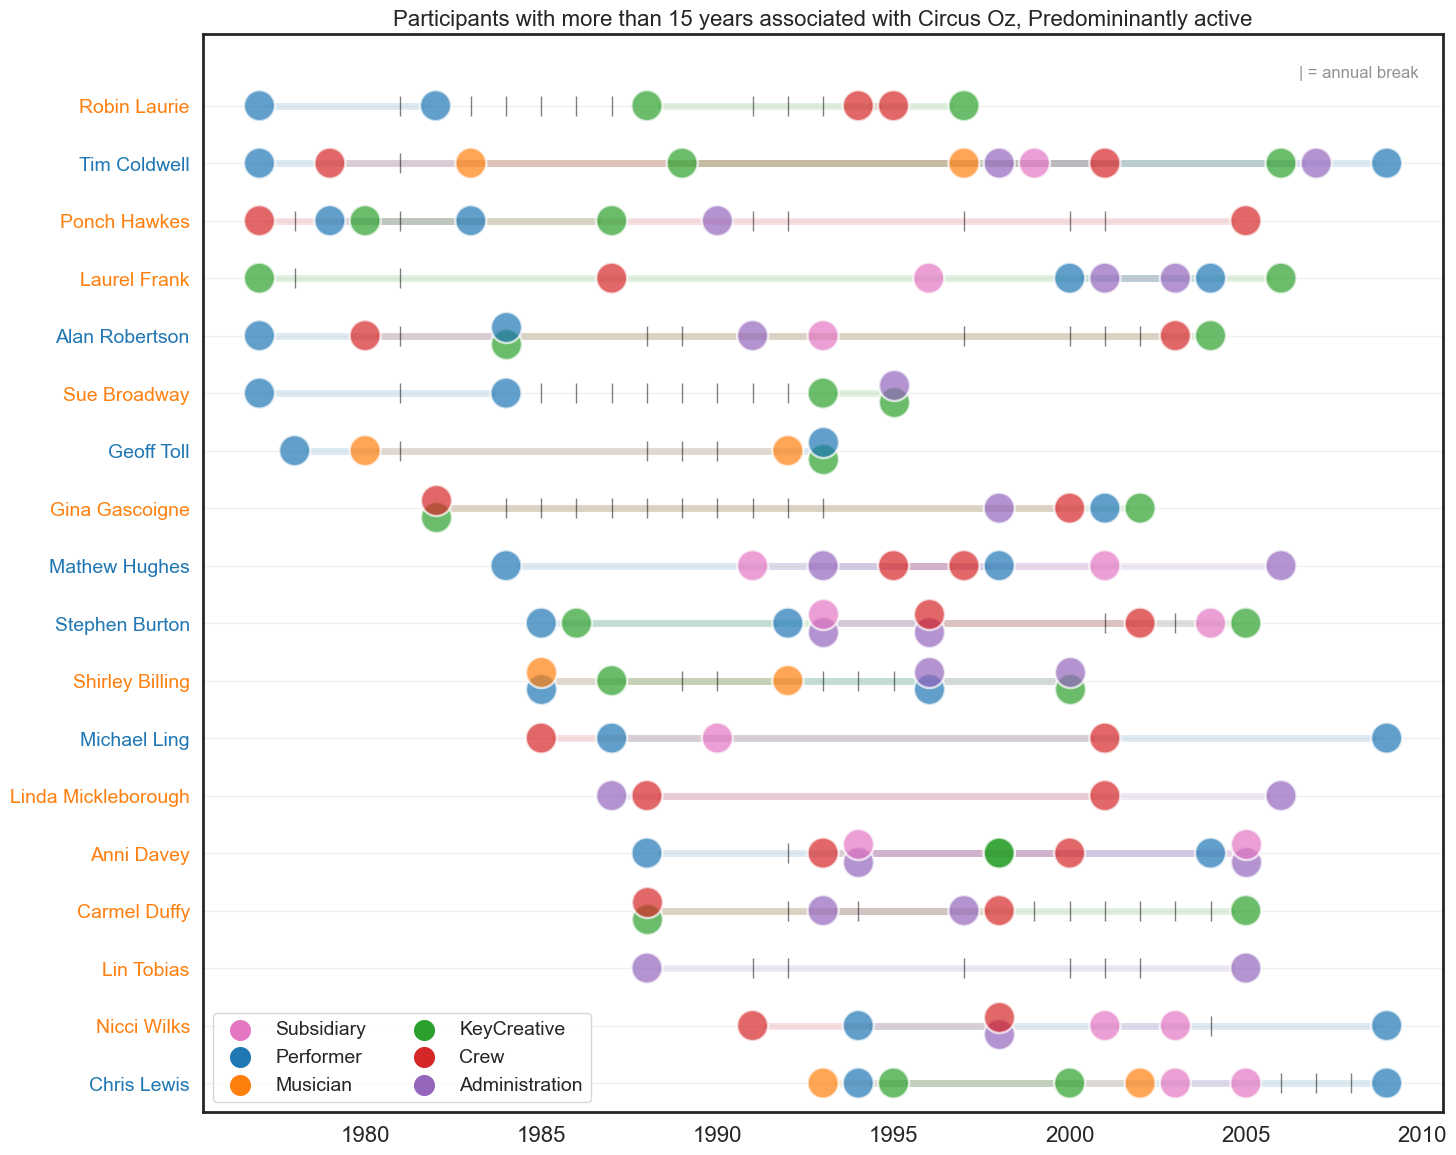

In [79]:
# leftforever_pno = list(tt_withyrdiff_roles[tt_withyrdiff_roles['Year_diff']>=15]['PERSON.NUMBER'].unique())
# continued_pno = tt[(tt['PERSON.NUMBER'].isin(leftforever_pno))].sort_values('Year',ascending=True).drop_duplicates(['PERSON.NUMBER'])

# continuers = tt[tt['PERSON.NUMBER'].isin(continued_pno['PERSON.NUMBER'].unique())]
# continuers = continuers[~continuers['ROLE.CATEGORY.CONCATINATE'].isnull()]

# first_occurrence = continuers.drop_duplicates(['PERSON.NUMBER','Roles','Year'], keep='first')\
#     .drop_duplicates(['PERSON.NUMBER','Roles'], keep='first')

# last_occurrence = continuers.drop_duplicates(['PERSON.NUMBER','Roles','Year'], keep='last')\
#     .drop_duplicates(['PERSON.NUMBER','Roles'], keep='last')

# data = (first_occurrence.append(last_occurrence)).drop_duplicates()
# data = data[data.Roles != 'Injured']
# data.sort_values(by='Roles', ascending=False, inplace=True)
data = data[~data['COMBINED.NAME'].isin(['Jim Robertson','Rinske Ginsberg','Kelvin Gedye',
'Jane Mullett','Alan Clarke','David Murray','Michael Baxter','Guang Rong Lu', 
'David Joseph','Derek Ives','Antonella Casella','Carl Polke'])]

# find rows with multiple roles in same year
multipleroles_oneyear = data[['COMBINED.NAME','Year','Roles']]\
                        .groupby(['COMBINED.NAME','Year'])\
                        .filter(lambda x: len(x) > 1)
                        #[['COMBINED.NAME','Year']]\
                        #.drop_duplicates()

# make sure y-axis follows order of roles
original_order = list(data.sort_values(['Year'])['COMBINED.NAME'].unique())
data['COMBINED.NAME'] = pd.Categorical(data['COMBINED.NAME'], categories=original_order, ordered=True)

data2 = data[~data.index.isin(multipleroles_oneyear.index)].copy()
multipleroles_oneyear = multipleroles_oneyear.reset_index().drop('index', axis=1)

color_dict = {'Crew':'tab:red', 'Administration':'tab:purple', 'Subsidiary':'tab:pink',
'Performer':'tab:blue','KeyCreative':'tab:green', 'Musician':'tab:orange', 'Unknown':'tab:gray'}

fig, ax = plt.subplots(figsize=(16,14))
sns.scatterplot(data=data2, #data2, 
x='Year', y='COMBINED.NAME', 
hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Sue Broadway
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Sue Broadway') &\
                                           (multipleroles_oneyear['Year'] == 1995) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=5+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Sue Broadway') &\
                                           (multipleroles_oneyear['Year'] == 1995) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=5-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Alan Robertson
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Alan Robertson') &\
                                           (multipleroles_oneyear['Year'] == 1984) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=4+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Alan Robertson') &\
                                           (multipleroles_oneyear['Year'] == 1984) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=4-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Geoff Toll
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Geoff Toll') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=6+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Geoff Toll') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=6-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Gina Gascoigne
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Gina Gascoigne') &\
                                           (multipleroles_oneyear['Year'] == 1982) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=7+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Gina Gascoigne') &\
                                           (multipleroles_oneyear['Year'] == 1982) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=7-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Shirley Billing
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 1985) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=10+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 1985) &\
                                           (multipleroles_oneyear['Roles'] == 'Musician')],legend=False,
                x='Year', y=10-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 1996) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=10+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 1996) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=10-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 2000) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=10+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Shirley Billing') &\
                                           (multipleroles_oneyear['Year'] == 2000) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=10-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Stephen Burton
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Stephen Burton') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=9+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Stephen Burton') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Subsidiary')],legend=False,
                x='Year', y=9-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Stephen Burton') &\
                                           (multipleroles_oneyear['Year'] == 1996) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=9+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Stephen Burton') &\
                                           (multipleroles_oneyear['Year'] == 1996) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=9-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Anni Davey
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 1994) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=13+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 1994) &\
                                           (multipleroles_oneyear['Roles'] == 'Subsidiary')],legend=False,
                x='Year', y=13-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=13, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 2005) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=13+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Anni Davey') &\
                                           (multipleroles_oneyear['Year'] == 2005) &\
                                           (multipleroles_oneyear['Roles'] == 'Subsidiary')],legend=False,
                x='Year', y=13-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Carmel Duffy
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carmel Duffy') &\
                                           (multipleroles_oneyear['Year'] == 1988) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=14+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carmel Duffy') &\
                                           (multipleroles_oneyear['Year'] == 1988) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=14-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Nicci Wilks
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Nicci Wilks') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=16+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Nicci Wilks') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=16-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# make x-axis labels different colors
for label in ax.get_yticklabels():
    gender_label = data[data['COMBINED.NAME'] == label.get_text()]['Gender'].values[0]
    if gender_label == 'M': label.set_color('#1f77b4')
    elif gender_label == 'F': label.set_color('#ff7f0e')
    else: label.set_color('#d62728')

# add a horizontal line  between the start and end of each person's career
for p in data['COMBINED.NAME'].unique():
    for q in data[data['COMBINED.NAME']==p].sort_values('Year')['Roles'].unique():
        start = data[(data['COMBINED.NAME']==p) & (data['Roles']==q)]['Year'].min()
        end = data[(data['COMBINED.NAME']==p) & (data['Roles']==q)]['Year'].max()

        if start != end:
            plt.plot([start+.4, end-.4], [p, p], color=color_dict[q], alpha=0.15, linewidth=5, zorder=0)

# add short vertical line aat the midpoint of each person's career
for p in data.sort_values('Year')['COMBINED.NAME'].unique():
    # if p == 'Tim Coldwell': continue
    non_yrs = set(range(unique_participants[unique_participants['COMBINED.NAME'] == p]['Year'].min(),
    unique_participants[unique_participants['COMBINED.NAME'] == p]['Year'].max()))\
            .difference(set(unique_participants[(unique_participants['COMBINED.NAME'] == p) &\
            (unique_participants['Year'] >= unique_participants[unique_participants['COMBINED.NAME'] == p]['Year'].min()) &\
            (unique_participants['Year'] < 2010)]['Year'].unique()))
    if len(non_yrs) > 0:
        # print(p, len(non_yrs))
        for q in non_yrs:
            plt.plot([q], [p], color='black', alpha=0.5, marker='|', markersize=15)

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title('Participants with more than 15 years associated with Circus Oz, Predomininantly active' , fontsize=16)

# add annotation top right of plot to denote the vertical lines
plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

# increase y-axis limits to make room for the title
plt.ylim(17.5, -1.25)

plt.show()

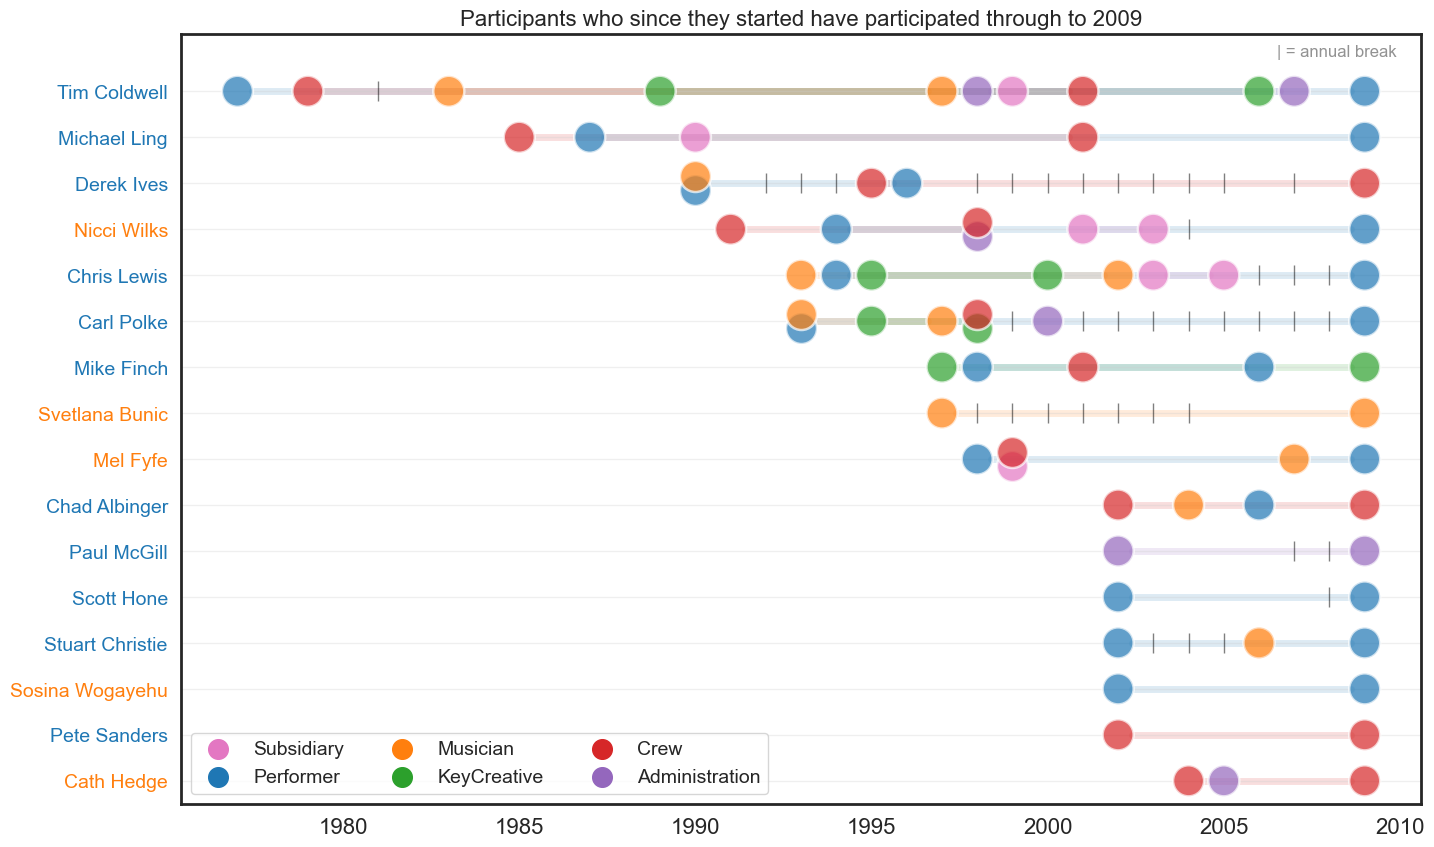

In [80]:
unique_participants = df_noinjuries[['PERSON.NUMBER','COMBINED.NAME','Gender','ROLE.CATEGORY.CONCATINATE','Year','Year_decade']]\
                        .drop_duplicates()\
                        .copy()

unique_participants = unique_participants[unique_participants['Year'] < 2011]

unique_participants['previous_year'] = 0
unique_participants['previous_years'] = 0
# unique_participants['left'] = 0
unique_participants['left_noreturn'] = 0

for y in range(1977, 2011):
    thisyear = unique_participants[unique_participants['Year'] == y]
    people_from_previous_year = unique_participants[unique_participants['Year'] == y-1]['PERSON.NUMBER'].unique()
    people_from_previous_years = unique_participants[unique_participants['Year'] < y-1]['PERSON.NUMBER'].unique()
    people_from_future_years = unique_participants[unique_participants['Year'] > y]['PERSON.NUMBER'].unique()

    for z in thisyear['PERSON.NUMBER'].unique():
        thisrow = (unique_participants['PERSON.NUMBER'] == z) & (unique_participants['Year'] == y)
        unique_participants.loc[thisrow, 'previous_year'] = z in people_from_previous_year
        unique_participants.loc[thisrow, 'previous_years'] = z in people_from_previous_years
        unique_participants.loc[thisrow, 'left_noreturn'] = z not in people_from_future_years

tt = unique_participants.assign(Roles=unique_participants['ROLE.CATEGORY.CONCATINATE']\
    .str.split(' ')).explode('Roles').reset_index(drop=True).copy()

nonreturners = (tt['left_noreturn'] == 1)
oneyearparticipants = (tt['left_noreturn'] == 1) &\
                      (tt['previous_year'] == 0) &\
                      (tt['previous_years'] == 0)

continuing =(tt['previous_year'] == 1)

leftforever_pno = list(tt[(tt.left_noreturn == 1) & (tt.Year != 2009)]['PERSON.NUMBER'].unique())
new2009_pno = list(tt[(tt.Year == 2009) & (tt.previous_years == 0) & (tt.previous_year == 0)]['PERSON.NUMBER'].unique())
leftforever_pno.extend(new2009_pno)
continued_pno = tt[(~tt['PERSON.NUMBER'].isin(leftforever_pno))].sort_values('Year',ascending=True).drop_duplicates(['PERSON.NUMBER'])
continued_pno = continued_pno[continued_pno['Year'] < 2005]

continuers = tt[tt['PERSON.NUMBER'].isin(continued_pno['PERSON.NUMBER'].unique())]
continuers = continuers[~continuers['ROLE.CATEGORY.CONCATINATE'].isnull()]

first_occurrence = continuers.drop_duplicates(['PERSON.NUMBER','Roles','Year'], keep='first')\
    .drop_duplicates(['PERSON.NUMBER','Roles'], keep='first')

last_occurrence = continuers.drop_duplicates(['PERSON.NUMBER','Roles','Year'], keep='last')\
    .drop_duplicates(['PERSON.NUMBER','Roles'], keep='last')

data = (first_occurrence.append(last_occurrence)).drop_duplicates()
data = data[data.Roles != 'Injured']
data.sort_values(by='Roles', ascending=False, inplace=True)

# find rows with multiple roles in same year
multipleroles_oneyear = data[['COMBINED.NAME','Year','Roles']]\
                        .groupby(['COMBINED.NAME','Year'])\
                        .filter(lambda x: len(x) > 1)
                        #[['COMBINED.NAME','Year']]\
                        #.drop_duplicates()

# make sure y-axis follows order of roles
original_order = list(data.sort_values(['Year'])['COMBINED.NAME'].unique())
data['COMBINED.NAME'] = pd.Categorical(data['COMBINED.NAME'], categories=original_order, ordered=True)

data2 = data[~data.index.isin(multipleroles_oneyear.index)].copy()
multipleroles_oneyear = multipleroles_oneyear.reset_index().drop('index', axis=1)

color_dict = {'Crew':'tab:red', 'Administration':'tab:purple', 'Subsidiary':'tab:pink',
'Performer':'tab:blue','KeyCreative':'tab:green', 'Musician':'tab:orange', 'Unknown':'tab:gray'}

fig, ax = plt.subplots(figsize=(16,10))
sns.scatterplot(data=data2, x='Year', y='COMBINED.NAME', 
hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Mel Fyfe
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Mel Fyfe') &\
                                           (multipleroles_oneyear['Year'] == 1999) &\
                                           (multipleroles_oneyear['Roles'] == 'Subsidiary')],legend=False,
                x='Year', y=8+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Mel Fyfe') &\
                                           (multipleroles_oneyear['Year'] == 1999) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=8-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Derek Ives
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Derek Ives') &\
                                           (multipleroles_oneyear['Year'] == 1990) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=2+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Derek Ives') &\
                                           (multipleroles_oneyear['Year'] == 1990) &\
                                           (multipleroles_oneyear['Roles'] == 'Musician')],legend=False,
                x='Year', y=2-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Nicci Wilks
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Nicci Wilks') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'Administration')],legend=False,
                x='Year', y=3+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Nicci Wilks') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=3-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Carl Polke
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carl Polke') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Performer')],legend=False,
                x='Year', y=5+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carl Polke') &\
                                           (multipleroles_oneyear['Year'] == 1993) &\
                                           (multipleroles_oneyear['Roles'] == 'Musician')],legend=False,
                x='Year', y=5-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carl Polke') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'KeyCreative')],legend=False,
                x='Year', y=5+.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Carl Polke') &\
                                           (multipleroles_oneyear['Year'] == 1998) &\
                                           (multipleroles_oneyear['Roles'] == 'Crew')],legend=False,
                x='Year', y=5-.15, hue='Roles', ax=ax, s=500, alpha=0.7, palette=color_dict)

# Stuart Christie
sns.scatterplot(data=multipleroles_oneyear[(multipleroles_oneyear['COMBINED.NAME'] == 'Stuart Christie') &\
                                           (multipleroles_oneyear['Year'] == 2006) &\
                                           (multipleroles_oneyear['Roles'] == 'Musician')],legend=False,
                x='Year', y='COMBINED.NAME', hue='Roles', ax=ax, s=500, alpha=0.475, palette=color_dict)

# make x-axis labels different colors
for label in ax.get_yticklabels():
    gender_label = data[data['COMBINED.NAME'] == label.get_text()]['Gender'].values[0]
    if gender_label == 'M': label.set_color('#1f77b4')
    elif gender_label == 'F': label.set_color('#ff7f0e')
    else: label.set_color('#d62728')

# add a horizontal line  between the start and end of each person's career
for p in data['COMBINED.NAME'].unique():
    for q in data[data['COMBINED.NAME']==p].sort_values('Year')['Roles'].unique():
        start = data[(data['COMBINED.NAME']==p) & (data['Roles']==q)]['Year'].min()
        end = data[(data['COMBINED.NAME']==p) & (data['Roles']==q)]['Year'].max()

        if start != end:
            plt.plot([start+.4, end-.4], [p, p], color=color_dict[q], alpha=0.15, linewidth=5, zorder=0)

# add short vertical line aat the midpoint of each person's career
for p in data.sort_values('Year')['COMBINED.NAME'].unique():
    # if p == 'Tim Coldwell': continue
    non_yrs = set(range(unique_participants[unique_participants['COMBINED.NAME'] == p]['Year'].min(), 2010))\
            .difference(set(unique_participants[(unique_participants['COMBINED.NAME'] == p) &\
            (unique_participants['Year'] >= unique_participants[unique_participants['COMBINED.NAME'] == p]['Year'].min()) &\
            (unique_participants['Year'] < 2010)]['Year'].unique()))
    if len(non_yrs) > 0:
        for q in non_yrs:
            plt.plot([q], [p], color='black', alpha=0.5, marker='|', markersize=15)

plt.legend(loc='lower left', fontsize=14, ncol=3, facecolor='white')
for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title('Participants who since they started have participated through to 2009', fontsize=16)

# add annotation top right of plot to denote the vertical lines
plt.annotate('| = annual break', xy=(2006.5, -.75), fontsize=12, alpha=0.5)

# increase y-axis limits to make room for the title
plt.ylim(15.5, -1.25)

plt.show()

### Career length by career start date
We now assess the average career length of participants by their career start date. We can see that the average career length decreases as the career start date (represented by demi-decade) increases. Plots are given for two different measures of centrality - mean and median. 

We also provide plots after omitting participants with one-year careers with Circus Oz - this is done to highlight the influence of these one-year participants on the overall trends.

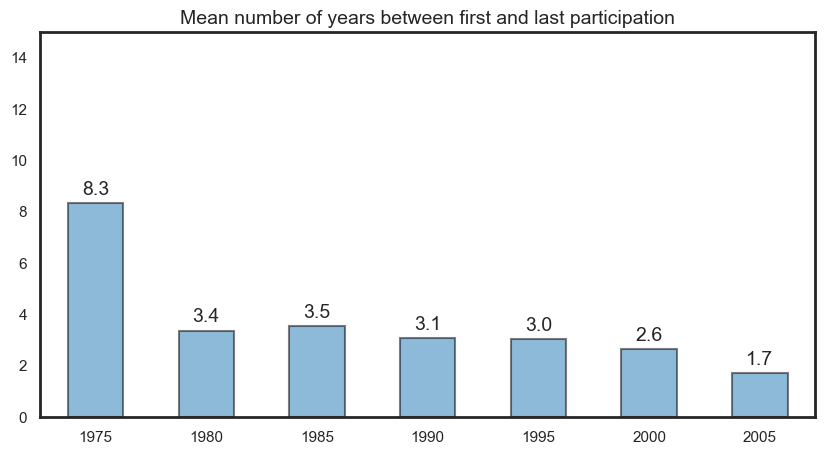

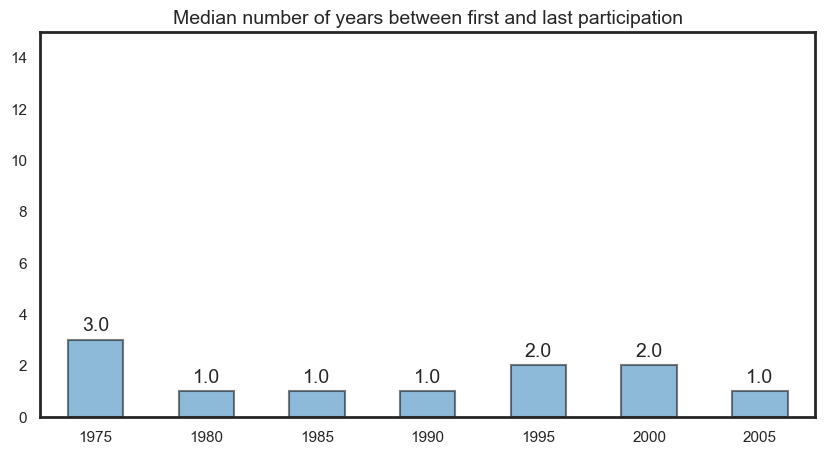

In [81]:
unique_participants = df_noinjuries[['PERSON.NUMBER','COMBINED.NAME','Gender','ROLE.CATEGORY.CONCATINATE','Year','Year_decade']]\
                        .drop_duplicates()\
                        .copy()

unique_participants = unique_participants[unique_participants['Year'] < 2011]

tt = unique_participants.assign(Roles=unique_participants['ROLE.CATEGORY.CONCATINATE']\
    .str.split(' ')).explode('Roles').reset_index(drop=True).copy()

first_occurrence = tt[tt.Roles != 'Injured'].drop_duplicates(['PERSON.NUMBER','Year'], keep='first')\
    .drop_duplicates(['PERSON.NUMBER'], keep='first')

last_occurrence = tt[tt.Roles != 'Injured'].drop_duplicates(['PERSON.NUMBER','Year'], keep='last')\
    .drop_duplicates(['PERSON.NUMBER'], keep='last')

data = pd.merge(last_occurrence, first_occurrence[['PERSON.NUMBER','Year']], on=['PERSON.NUMBER'], how='inner')
data['Year_diff']  = (data['Year_x'] - data['Year_y'])+1

# # replace Gender value `0` to "Unknown"
# data.Gender.replace(0, 'Unconfirmed', inplace=True)
# data.Gender.replace('U', 'Unconfirmed', inplace=True)

tt_withyrdiff = pd.merge(tt, data[['PERSON.NUMBER','Year_diff']], on='PERSON.NUMBER')
tt_withyrdiff_roles = tt_withyrdiff.drop_duplicates(subset=['PERSON.NUMBER','Roles'])

tt_withyrdiff_roles['Year_diff2'] = tt_withyrdiff_roles['Year_diff'] #+1

# mean - 7.8 w/out Tim Coldwell
tt_withyrdiff_roles[['COMBINED.NAME','Year_decade','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME'])\
    .groupby(['Year_decade'])['Year_diff2'].mean()\
    .plot(kind='bar', figsize=(10,5), color='#1f77b4', alpha=0.5, edgecolor='black', linewidth=1.5)

# put bar labels on top
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height().round(1)), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

plt.xlabel('')
plt.xticks(rotation=0)
plt.ylim(0, 15)
plt.title('Mean number of years between first and last participation', fontsize=14)
plt.show()

# median
tt_withyrdiff_roles[['COMBINED.NAME','Year_decade','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME'])\
    .groupby(['Year_decade'])['Year_diff2'].median()\
    .plot(kind='bar', figsize=(10,5), color='#1f77b4', alpha=0.5, edgecolor='black', linewidth=1.5)
    
# put bar labels on top
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height().round(1)), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

plt.xlabel('')
plt.xticks(rotation=0)
plt.ylim(0, 15)
plt.title('Median number of years between first and last participation', fontsize=14)
plt.show()

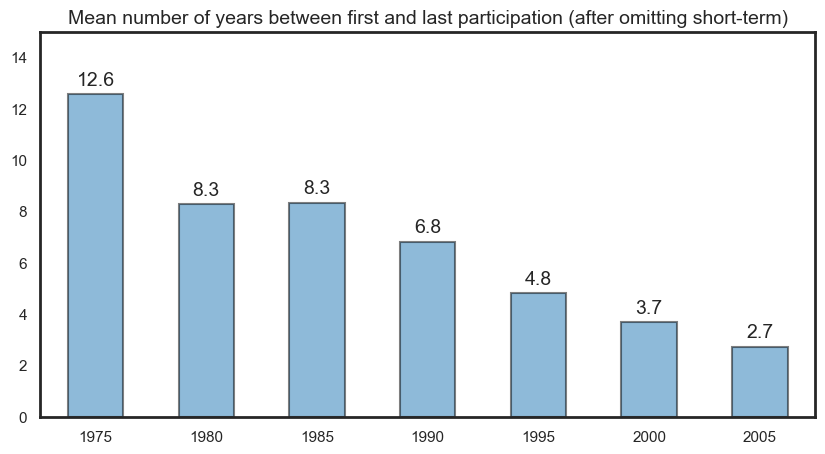

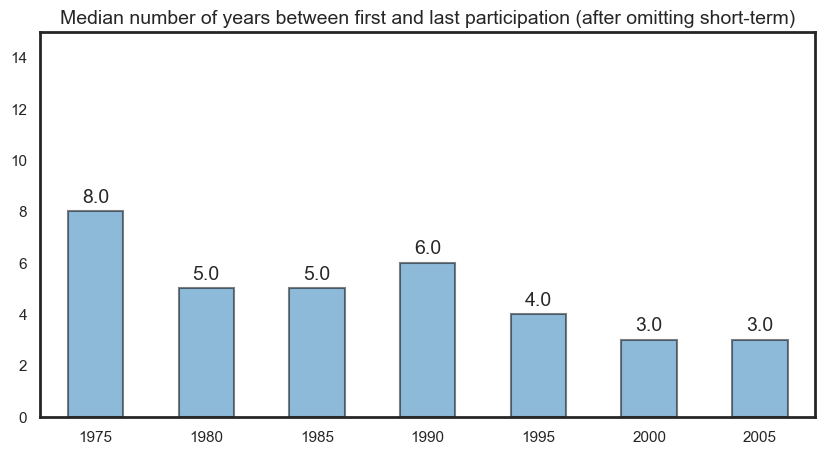

In [82]:
# mean
tt_withyrdiff_roles[~tt_withyrdiff_roles['Year_diff2'].isin([1])][['COMBINED.NAME','Year_decade','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME'])\
    .groupby(['Year_decade'])['Year_diff2'].mean()\
    .plot(kind='bar', figsize=(10,5), color='#1f77b4', alpha=0.5, edgecolor='black', linewidth=1.5)

# put bar labels on top
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height().round(1)), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

plt.xlabel('')
plt.xticks(rotation=0)
plt.ylim(0, 15)
plt.title('Mean number of years between first and last participation (after omitting short-term)', fontsize=14)
plt.show()

# median
tt_withyrdiff_roles[~tt_withyrdiff_roles['Year_diff2'].isin([1])][['COMBINED.NAME','Year_decade','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME'])\
    .groupby(['Year_decade'])['Year_diff2'].median()\
    .plot(kind='bar', figsize=(10,5), color='#1f77b4', alpha=0.5, edgecolor='black', linewidth=1.5)
    
# put bar labels on top
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height().round(1)), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

plt.xlabel('')
plt.xticks(rotation=0)
plt.ylim(0, 15)
plt.title('Median number of years between first and last participation (after omitting short-term)', fontsize=14)
plt.show()

### Career length by career start date and gender

The following are interactive plots. Filtering can be enabled using the legend items.

In [83]:
tt_withyrdiff_roles['Gender'].replace('U', 'Unconfirmed', inplace=True)
tt_withyrdiff_roles['Gender'].replace(0, 'Unconfirmed', inplace=True)

bygender = tt_withyrdiff_roles[['COMBINED.NAME','Year_decade','Gender','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME'])\
    .groupby(['Year_decade','Gender'])['Year_diff2'].mean().reset_index()

# bygender['Gender'].replace('U', 'Unconfirmed', inplace=True)
# bygender['Gender'].replace(0, 'Unconfirmed', inplace=True)

# bar 
fig = px.bar(
    data_frame = bygender
    ,y = 'Year_diff2'
    ,x = 'Year_decade'
    ,color = 'Gender'
    ,color_discrete_map={'M':'#1f77b4','F':'#ff7f0e','Unconfirmed':'#d62728'}
    # ,facet_col='Gender'
    ,barmode='group'
    ,title='Mean career length by employment start decade and gender'
    ,height=500
    ,width=800
)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="right",
    x=0.7
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.97)

# change y-axis limits
fig.update_yaxes(range=[0, 16])

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.show()


# median bar 
fig = px.bar(
    data_frame = bygender
    ,y = 'Year_diff2'
    ,x = 'Year_decade'
    ,color = 'Gender'
    ,color_discrete_map={'M':'#1f77b4','F':'#ff7f0e','Unconfirmed':'#d62728'}
    # ,facet_col='Gender'
    ,barmode='group'
    ,title='Median career length by employment start decade and gender'
    ,height=500
    ,width=800
)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="right",
    x=0.7
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.97)

# change y-axis limits
fig.update_yaxes(range=[0, 16])

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.show()

In [84]:
bygender = tt_withyrdiff_roles[~tt_withyrdiff_roles['Year_diff2'].isin([1])][['COMBINED.NAME','Year_decade','Gender','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME'])\
    .groupby(['Year_decade','Gender'])['Year_diff2'].mean().reset_index()

# bar 
fig = px.bar(
    data_frame = bygender
    ,y = 'Year_diff2'
    ,x = 'Year_decade'
    ,color = 'Gender'
    ,color_discrete_map={'M':'#1f77b4','F':'#ff7f0e','Unconfirmed':'#d62728'}
    # ,facet_col='Gender'
    ,barmode='group'
    ,title='Mean career length by employment start decade and gender (after omitting short-term)'
    ,height=500
    ,width=800
)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="right",
    x=0.7
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.97)

# change y-axis limits
fig.update_yaxes(range=[0, 16])

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.show()


# median bar 
fig = px.bar(
    data_frame = bygender
    ,y = 'Year_diff2'
    ,x = 'Year_decade'
    ,color = 'Gender'
    ,color_discrete_map={'M':'#1f77b4','F':'#ff7f0e','Unconfirmed':'#d62728'}
    # ,facet_col='Gender'
    ,barmode='group'
    ,title='Median career length by employment start decade and gender (after omitting short-term)'
    ,height=500
    ,width=800
)

#move legend to top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.065,
    xanchor="right",
    x=0.7
))

# Change the bar mode
fig.update_layout(title_x=0.5, title_y=0.97)

# change y-axis limits
fig.update_yaxes(range=[0, 16])

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.show()

### Career length by career start date and role
We now assess the average career length of participants by their career start date and role type. We use heatmaps to visualise this. Heatmaps are provided for all the data, and data for Males and Females, respectively.

In [85]:
# change all Year_diff2 to the max value for each person
tt_withyrdiff_roles['Year_decade2'] = tt_withyrdiff_roles.groupby(['COMBINED.NAME'])['Year_decade'].transform('min')

byrole = tt_withyrdiff_roles[['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].mean().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Greens')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Mean career length by employment start decade and role, All',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')


fig.show()

# females
byrole = tt_withyrdiff_roles[tt_withyrdiff_roles['Gender'] == 'F'][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].mean().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Oranges')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Mean career length by employment start decade and role, Females',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)


# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')

fig.show()


# Males
byrole = tt_withyrdiff_roles[tt_withyrdiff_roles['Gender'] == 'M'][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].mean().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Blues')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Mean career length by employment start decade and role, Males',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)


# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')

fig.show()

In [86]:
# change all Year_diff2 to the max value for each person
tt_withyrdiff_roles['Year_decade2'] = tt_withyrdiff_roles.groupby(['COMBINED.NAME'])['Year_decade'].transform('min')

byrole = tt_withyrdiff_roles[['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].median().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Greens')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Median career length by employment start decade and role, All',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')


fig.show()

# females
byrole = tt_withyrdiff_roles[tt_withyrdiff_roles['Gender'] == 'F'][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].median().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Oranges')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Median career length by employment start decade and role, Females',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')

fig.show()


# Males
byrole = tt_withyrdiff_roles[tt_withyrdiff_roles['Gender'] == 'M'][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].median().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Blues')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Median career length by employment start decade and role, Males',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')

fig.show()

In [87]:
# change all Year_diff2 to the max value for each person
tt_withyrdiff_roles['Year_decade2'] = tt_withyrdiff_roles.groupby(['COMBINED.NAME'])['Year_decade'].transform('min')

byrole = tt_withyrdiff_roles[tt_withyrdiff_roles.Year_diff2 != 1][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].mean().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Greens')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Mean career length by employment start decade and role (after omitting short-term), All',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')


fig.show()

# females
byrole = tt_withyrdiff_roles[tt_withyrdiff_roles['Gender'] == 'F'][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].mean().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Oranges')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Mean career length by employment start decade and role (after omitting short-term), Females',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')

fig.show()


# Males
byrole = tt_withyrdiff_roles[tt_withyrdiff_roles['Gender'] == 'M'][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].mean().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Blues')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Mean career length by employment start decade and role (after omitting short-term), Males',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')

fig.show()

In [88]:
# change all Year_diff2 to the max value for each person
tt_withyrdiff_roles['Year_decade2'] = tt_withyrdiff_roles.groupby(['COMBINED.NAME'])['Year_decade'].transform('min')

byrole = tt_withyrdiff_roles[tt_withyrdiff_roles.Year_diff2 != 1][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].median().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Greens')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Median career length by employment start decade and role (after omitting short-term), All',
    title_x=0.5,
    title_y=0.97,
    title_font_size=16,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')


fig.show()

# females
byrole = tt_withyrdiff_roles[tt_withyrdiff_roles['Gender'] == 'F'][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].median().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Oranges')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Median career length by employment start decade and role (after omitting short-term), Females',
    title_x=0.5,
    title_y=0.97,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
    ,title_font_size=16
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')

fig.show()


# Males
byrole = tt_withyrdiff_roles[tt_withyrdiff_roles['Gender'] == 'M'][['COMBINED.NAME','Year_decade2','Roles','Year_diff2']]\
    .drop_duplicates(['COMBINED.NAME','Roles'])\
    .groupby(['Year_decade2','Roles'])['Year_diff2'].median().reset_index()

byrole = byrole[(byrole['Roles']!='Injured') & (byrole['Roles']!='Unknown')]
byrole['Year_decade2'] = byrole['Year_decade2'].astype(str)

# heatmap takes average
fig = px.density_heatmap(
    data_frame = byrole
    ,y = 'Roles'
    ,x = 'Year_decade2',
    z = 'Year_diff2',
    range_color = [0,35],
    color_continuous_scale='Blues')

# make y-axis labels larger
fig.update_yaxes(tickfont=dict(size=14),title_text='')
fig.update_xaxes(tickfont=dict(size=14),title_text='')

fig.update_layout(
    title='Median career length by employment start decade and role (after omitting short-term), Males',
    title_x=0.5,
    title_y=0.97,
    coloraxis_colorbar=dict(
    title="",
    tickfont=dict(size=14))
    ,title_font_size=16
)

# add values in each cell
fig.update_traces(texttemplate='%{z:.2f}')

fig.show()

In [89]:
# fig = px.strip(data, x='Year', y='COMBINED.NAME', #color="Roles", hover_data=['Roles'], 
# stripmode='group')
# # color_discrete_sequence = ['#e377c2', '#1f77b4', '#ff7f0e', '#2ca02c', '#8c564b', '#9467bd', '#d62728'])

# # add jitter
# # make hover have no title, just the value
# fig.update_traces(
#     hovertemplate="<br>".join([
#         "%{customdata[0]}",
#         "%{y},%{x}"
#     ])
# )
# # # add color_map to change data points
# # color_map = {'M': 'tab:blue', 'F': 'tab:orange', 'U': 'tab:green', 'O': 'tab:red'}

# # move legend to top and horizontal
# # fig.update_layout(legend=dict(
# #     orientation="h",
# #     yanchor="bottom",
# #     y=0.94,
# #     xanchor="right",
# #     x=0.935,
# #     font=dict(size=12),
# #     # make background a little transparent
# #     bgcolor='rgba(255,255,255,0.5)',
# #     bordercolor='black',
# #     borderwidth=1
# # ))


# # add marker outline
# fig.update_traces(marker_line_width=1, marker_line_color='black')

# # change marker colour according Gender
# fig.update_traces(marker=dict(size=20),
#                     # jitter=1, 
#                     opacity=0.6)

# # make figure wider
# fig.update_layout(height=800)

# # add gridlines for y-axis
# fig.update_yaxes(showgrid=True, gridwidth=1, tickfont=dict(size=15), title_text='')
# fig.update_xaxes(showgrid=True, tickfont=dict(size=16), title_text='') #,showticklabels=False)

# # add horizontal line between two data points with transparent colour
# fig.add_shape(type="line", x0=2002, y0=15, x1=2009, y1=15, line=dict(color="rgba(255,255,255,1)", width=1.5))



# # make y-limits bigger
# fig.update_yaxes(range=[-1, 16])

# # add title
# fig.update_layout(title_text="Participants with one-year careers with Circus Oz", title_font_size=20, title_x=0.5, title_y=0.995)
# fig.show()

## Person-level data

### Person summary

We calculate summary statistics of participation rate across all persons and also across gender. These are shown in the table below.

| Gender | Count | Mean | Standard Deviation | Min | 25% | 50% (Median) | 75% | Max |
| :- | :- | :- | :- | :- | :- | :- | :- | :- |
| All | 796 | 17.5 | 36.8 | 1 | 1 | 2 | 15 | 374 |
| M | 149 | 36.8 | 56.3 | 1 | 4 | 15 | 43| 374 |
| F | 152 | 42.3 | 47.8 | 1 | 10 | 27 | 54 | 253 |
| Unconfirmed | 495 | 4.0 | 6.9 | 1 | 1 | 1 | 3 | 83 |

**Some insights from the above**:
- 796 unique persons (excluding injured).
- Mean number of events per person = 17.5.
- However, median (2) is a better measure of centrality as the data is right skewed.
- 75% of the data participate in 15 or less events.
<br><br>
- `Male` and `Female` median is a lot larger when we disregard other values in the Gender column.
    - This plays into the idea that people with fewer records have less information about them.
- Compared to `Male` (149) and `Female` (152), `Unconfirmed` occurs far more frequently (495).
- `Female` median (27) is larger than male (15).
<br><br>
- 75% of `Male` perform in less than 43 events.
- 75% of `Female` perform in less than 54 events.
- 75% of `Unconfirmed` perform in 3 or less events.

We also provide a histogram with a layered boxplot to highlight the skewness seen in participation rates.

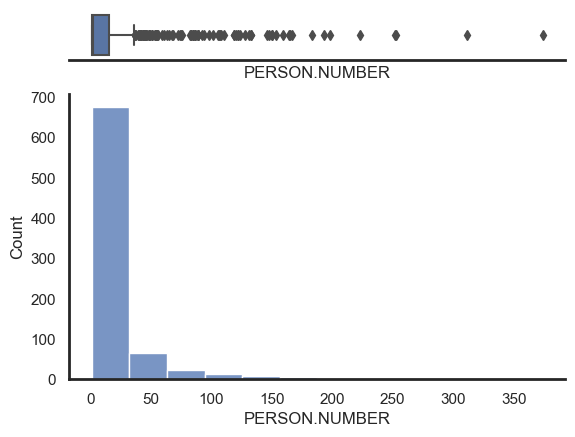

In [90]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df_noinjuries['PERSON.NUMBER'].value_counts(), ax=ax_box)
sns.histplot(x=df_noinjuries['PERSON.NUMBER'].value_counts(), 
             bins=12, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Below we list 20 people who have been involved in the most Circus Oz events. We have coloured each bar according to the gender record.
- Tim Coldwell leads with 369 events followed by Michael Ling with 304 events.
- Both males and females are among the highest

One interesting insight from looking at participation rates is that 98% of all events in the data have links to one person among the top 1% of most active participants (from Tim Coldwell to Chris Lewis). 

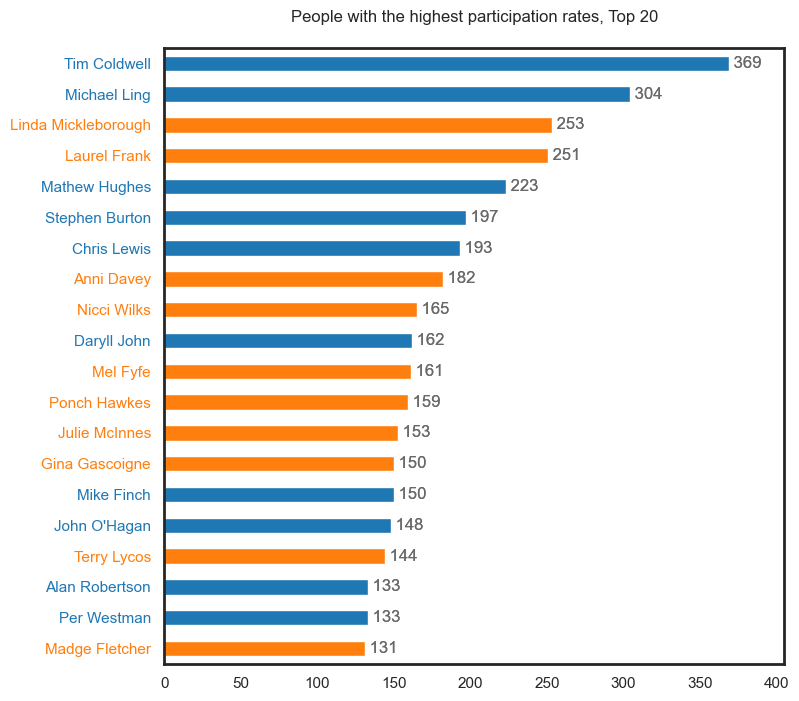

In [91]:
fig, ax = plt.subplots(figsize=(8, 8))

persons_freq = pd.DataFrame(df_noinjuries\
    .drop_duplicates(['COMBINED.NAME','EVENT.NUMBER'])['COMBINED.NAME']\
    .value_counts())

# df_noinjuries[df_noinjuries['COMBINED.NAME'].isin(['Tim Coldwell','Michael Ling','Linda Mickleborough','Laurel Frank',
# 'Matthew Hughes','Stephen Burton','Chris Lewis'])]['EVENT.NUMBER'].nunique()/436 # 0.979

tab_df = persons_freq\
    .reset_index()\
    .rename({'index':'Person',
             'COMBINED.NAME':'Frequency'}, axis=1)\
    .head(20)\
    .sort_values('Frequency')

# labels = (tab_df['Frequency']/persons_freq.shape[0])\
#         .round(2).astype('str') + '%'

labels = ' ' + tab_df['Frequency'].astype('str')

tab_df.plot.barh(x='Person', y='Frequency',rot=0, ax=ax)

# # make x-axis labels different colors
colors_for_plot = []
this_col = ''
for label in ax.get_yticklabels():
    gender_label = data[data['COMBINED.NAME'] == label.get_text()]['Gender'].values[0]
    if gender_label == 'M': this_col = '#1f77b4'
    elif gender_label == 'F': this_col = '#ff7f0e'
    else: this_col = '#d62728'
    colors_for_plot.append(this_col)
    label.set_color(this_col)

tab_df.plot.barh(x='Person', y='Frequency',rot=0, ax=ax, color=colors_for_plot)

# add bar labels
[ax.bar_label(container, labels=labels, color='dimgrey')
 for container in ax.containers]

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)
plt.title('People with the highest participation rates, Top 20\n')

plt.xlim([0, 405])
plt.show()

```{epigraph}
98% of all events in the data have links to the top 1% of most active participants.
```

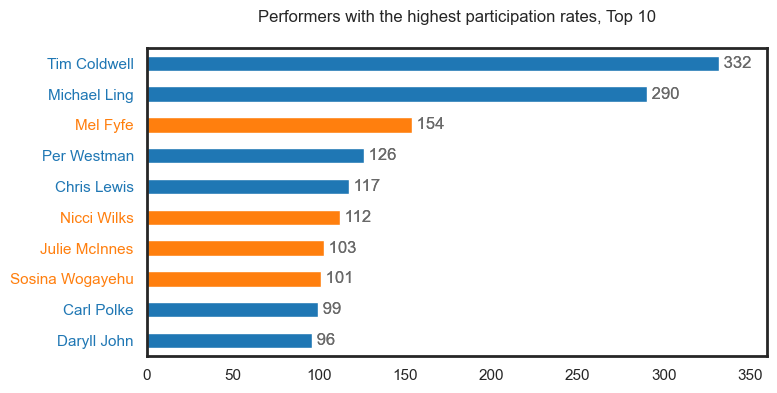

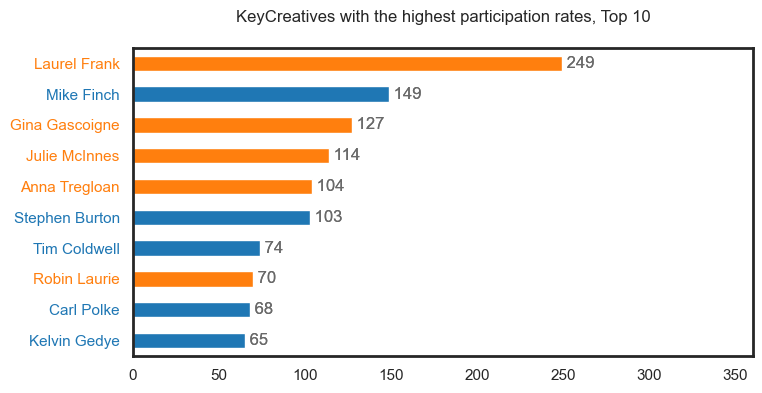

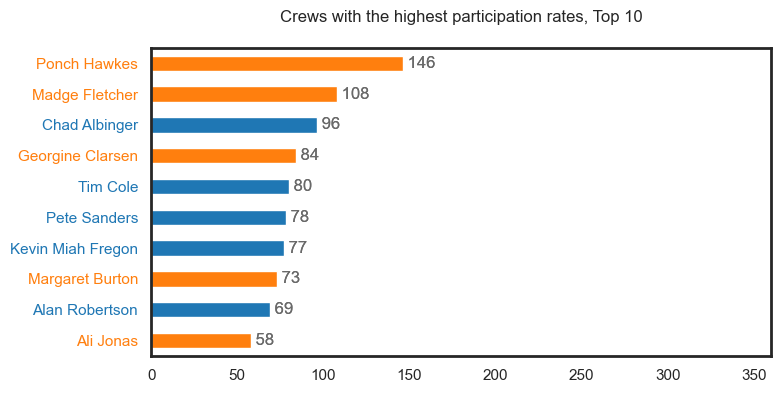

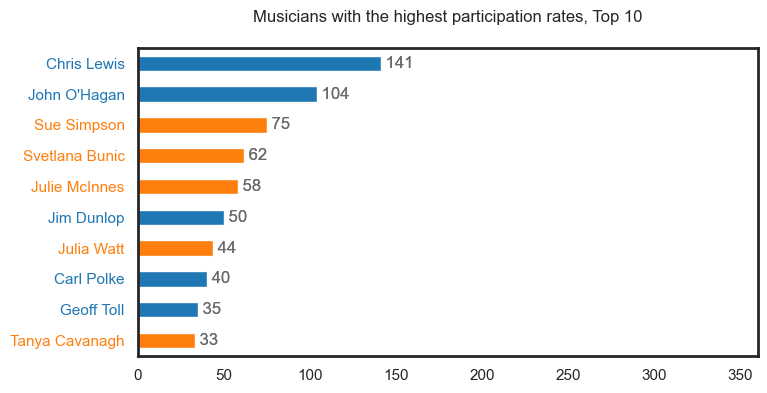

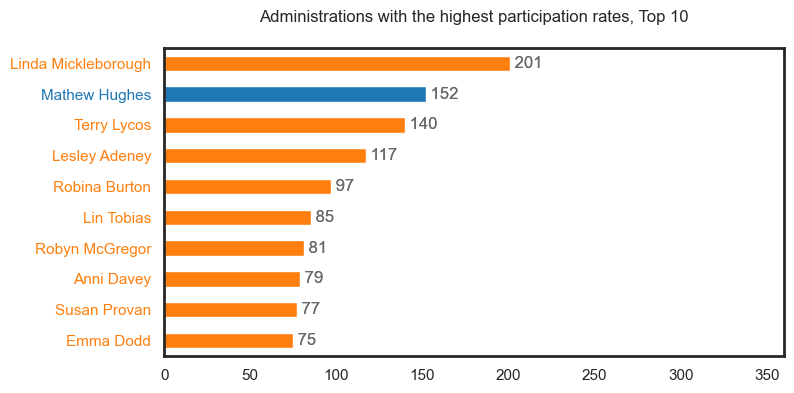

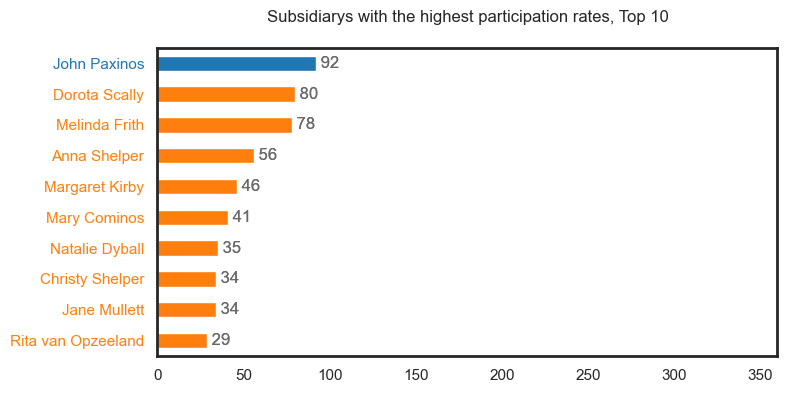

In [92]:
ss = df_noinjuries[['PERSON.NUMBER','COMBINED.NAME','EVENT.NUMBER','Gender','ROLE.CATEGORY.CONCATINATE','Year','Year_decade']]\
                        .drop_duplicates()\
                        .copy()

ss = ss[ss['Year'] < 2011].assign(Roles=ss['ROLE.CATEGORY.CONCATINATE']\
    .str.split(' ')).explode('Roles').reset_index(drop=True).copy()

for r in ss[~ss.Roles.isnull()].Roles.unique():
    if r in ['Unknown', 'Injured', 'Missing']: continue

    fig, ax = plt.subplots(figsize=(8, 4))

    persons_freq = pd.DataFrame(ss[ss.Roles == r]\
        .drop_duplicates(['COMBINED.NAME','EVENT.NUMBER'])['COMBINED.NAME']\
        .value_counts())

    # df_noinjuries[df_noinjuries['COMBINED.NAME'].isin(['Tim Coldwell','Michael Ling','Linda Mickleborough','Laurel Frank',
    # 'Matthew Hughes','Stephen Burton','Chris Lewis'])]['EVENT.NUMBER'].nunique()/436 # 0.979

    tab_df = persons_freq\
        .reset_index()\
        .rename({'index':'Person',
                'COMBINED.NAME':'Frequency'}, axis=1)\
        .head(10)\
        .sort_values('Frequency')

    # labels = (tab_df['Frequency']/persons_freq.shape[0])\
    #         .round(2).astype('str') + '%'

    labels = ' ' + tab_df['Frequency'].astype('str')

    tab_df.plot.barh(x='Person', y='Frequency',rot=0, ax=ax)

    # # make x-axis labels different colors
    colors_for_plot = []
    this_col = ''
    for label in ax.get_yticklabels():
        gender_label = ss[ss['COMBINED.NAME'] == label.get_text()]['Gender'].values[0]
        if gender_label == 'M': this_col = '#1f77b4'
        elif gender_label == 'F': this_col = '#ff7f0e'
        else: this_col = '#d62728'
        colors_for_plot.append(this_col)
        label.set_color(this_col)

    tab_df.plot.barh(x='Person', y='Frequency',rot=0, ax=ax, color=colors_for_plot)

    # add bar labels
    [ax.bar_label(container, labels=labels, color='dimgrey')
    for container in ax.containers]

    # remove legend and y-axis title
    ax.legend().set_visible(False)
    plt.ylabel(None)
    plt.title(f'{r}s with the highest participation rates, Top 10\n')

    plt.xlim([0, 360])
    plt.show()

In [93]:
### Output top 100 for Kirsten and Gillian
# def make_categories_to_string(col = 'Primary.Role_(FMP)'):
#     roles = list(this_person[col].value_counts().reset_index()['index'].values)
#     if 'Injured' in roles: roles.remove('Injured')
#     return(", ".join(roles))

# df2 = pd.read_excel('data/23 Nov_Circus Oz_MasterList-RoleCategories_1978-2009_WorkingOut.xlsx')

# # remove redundant rows
# df2 = df2[~df2['PERSON.NUMBER'].isnull()][['PERSON.NUMBER','COMBINED.NAME','Gender','Primary.Role_(FMP)', 'Secondary.role_(FMP)', 
#         'Personnel.Note.1_(FMP)','Personnel.Note.2_(FMP)', 'Role.1.Binders.2003-04_(FMP)', 'Role.2.Binders.2003-04_(FMP)', 'Role.3.Binders.2003-04_(FMP)',
#        'Contributor.Function.1_(AS)', 'Contributor.Function.2_(AS)','Contributor.Function.3_(AS)', 'Video.Id.description_(CO-clips)',
#        'Estimated.Role','Estimated.Role.Note']].drop_duplicates()
       
# # assign event number to each related person
# for person_no in df2['PERSON.NUMBER'].unique():
#     this_person = df2[df2['PERSON.NUMBER'] == person_no]

#     for column in df2.columns:
#         if (column != 'PERSON.NUMBER') & (column != 'COMBINED.NAME') & (column != 'Gender'):
#             this_roles = make_categories_to_string(col = column)

#             # assign roles to person in df2
#             df2.loc[df2['PERSON.NUMBER'] == person_no, column] = this_roles
        

# top100 = df_noinjuries.drop_duplicates(subset=['EVENT.NUMBER','PERSON.NUMBER'])['PERSON.NUMBER'].value_counts().head(100)
# top100_performers = df_noinjuries[df_noinjuries['Role.Category.Concatinate'].apply(lambda x: not isinstance(x, float) and 'Performer' in x)]\
#     .drop_duplicates(subset=['EVENT.NUMBER','PERSON.NUMBER'])['PERSON.NUMBER'].value_counts().head(100) # 100

# top100_musicians = df_noinjuries[df_noinjuries['Role.Category.Concatinate'].apply(lambda x: not isinstance(x, float) and 'Musician' in x)]\
#     .drop_duplicates(subset=['EVENT.NUMBER','PERSON.NUMBER'])['PERSON.NUMBER'].value_counts().head(100) # 57

# top100_admin = df_noinjuries[df_noinjuries['Role.Category.Concatinate'].apply(lambda x: not isinstance(x, float) and 'Administration' in x)]\
#     .drop_duplicates(subset=['EVENT.NUMBER','PERSON.NUMBER'])['PERSON.NUMBER'].value_counts().head(100) # 100

# top100_keycreative = df_noinjuries[df_noinjuries['Role.Category.Concatinate'].apply(lambda x: not isinstance(x, float) and 'KeyCreative' in x)]\
#     .drop_duplicates(subset=['EVENT.NUMBER','PERSON.NUMBER'])['PERSON.NUMBER'].value_counts().head(100) # 97

# top100_crew = df_noinjuries[df_noinjuries['Role.Category.Concatinate'].apply(lambda x: not isinstance(x, float) and 'Crew' in x)]\
#     .drop_duplicates(subset=['EVENT.NUMBER','PERSON.NUMBER'])['PERSON.NUMBER'].value_counts().head(100) # 100

# top100_subsidiary = df_noinjuries[df_noinjuries['Role.Category.Concatinate'].apply(lambda x: not isinstance(x, float) and 'Subsidiary' in x)]\
#     .drop_duplicates(subset=['EVENT.NUMBER','PERSON.NUMBER'])['PERSON.NUMBER'].value_counts().head(100) # 100

# top100 = pd.merge(top100.reset_index().rename(columns={'index':'PERSON.NUMBER', 'PERSON.NUMBER':'Count'}), df2.drop_duplicates(), on='PERSON.NUMBER')
# top100_performers = pd.merge(top100_performers.reset_index().rename(columns={'index':'PERSON.NUMBER', 'PERSON.NUMBER':'Count'}), df2.drop_duplicates(), on='PERSON.NUMBER')
# top100_musicians = pd.merge(top100_musicians.reset_index().rename(columns={'index':'PERSON.NUMBER', 'PERSON.NUMBER':'Count'}), df2.drop_duplicates(), on='PERSON.NUMBER')
# top100_admin = pd.merge(top100_admin.reset_index().rename(columns={'index':'PERSON.NUMBER', 'PERSON.NUMBER':'Count'}), df2.drop_duplicates(), on='PERSON.NUMBER')
# top100_keycreative = pd.merge(top100_keycreative.reset_index().rename(columns={'index':'PERSON.NUMBER', 'PERSON.NUMBER':'Count'}), df2.drop_duplicates(), on='PERSON.NUMBER')
# top100_crew = pd.merge(top100_crew.reset_index().rename(columns={'index':'PERSON.NUMBER', 'PERSON.NUMBER':'Count'}), df2.drop_duplicates(), on='PERSON.NUMBER')
# top100_subsidiary = pd.merge(top100_subsidiary.reset_index().rename(columns={'index':'PERSON.NUMBER', 'PERSON.NUMBER':'Count'}), df2.drop_duplicates(), on='PERSON.NUMBER')

# # Create an ExcelWriter object
# writer = pd.ExcelWriter('top100.xlsx', engine='openpyxl')

# # Write each dataframe to a separate sheet in the workbook
# top100.to_excel(writer, sheet_name='top100')
# top100_performers.to_excel(writer, sheet_name='top100_performers')
# top100_musicians.to_excel(writer, sheet_name='top100_musicians')
# top100_admin.to_excel(writer, sheet_name='top100_admin')
# top100_keycreative.to_excel(writer, sheet_name='top100_keycreative')
# top100_crew.to_excel(writer, sheet_name='top100_crew')
# top100_subsidiary.to_excel(writer, sheet_name='top100_subsidiary')

# # Save the workbook
# writer.save()

## Role-level data


### Roles

We take a deep dive into the recorded roles across the participant data. A person can have many roles within an event (see proportions below).

| Number of roles | Proportion |
| :- | :- |
| 1 | 93.1% |
| 2 | 6.0% |
| 3 | 0.8% |
| 4 | 0.1% |

We first review the distribution across role types by treating each role within an event for a given person as one record. `Performer` has the most records making up 31% of the data.

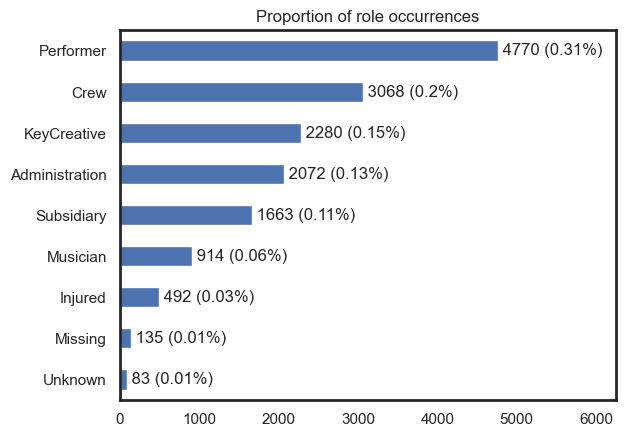

In [94]:
df['ROLE.CATEGORY.CONCATINATE'] = df['ROLE.CATEGORY.CONCATINATE'].fillna('Missing')

# convert the DataFrame to a list of transactions
transactions = [row.split() for row in df['ROLE.CATEGORY.CONCATINATE'].values]
transactions_m = [row.split() for row in 
                  df[df.Gender=='M']['ROLE.CATEGORY.CONCATINATE'].values]
transactions_f = [row.split() for row in 
                  df[df.Gender=='F']['ROLE.CATEGORY.CONCATINATE'].values]

roles_dict = dict()

#printing the counts
for role in transactions:
    for r in role:
        if r in roles_dict: roles_dict[r] += 1
        else: roles_dict[r] = 1
            
role_count = pd.DataFrame(roles_dict.items(), 
                          columns=['Role', 'Count'])
toproles = role_count.sort_values('Count', ascending=True)

labels = ' ' + toproles['Count'].astype('str') + ' (' \
         + (toproles['Count']/toproles['Count'].sum())\
         .round(2).astype('str') + '%)'

ax = toproles.plot.barh(x='Role', y='Count',rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)
plt.title('Proportion of role occurrences')

plt.xlim([0, 6250])
plt.show()

#### How many roles on average?

We explore whether certain roles on average (median) tend to be pairs or not. The visualisaiton below highlights the median number of roles given a role type. This bar chart suggests that most of time people tend to do one role only during an event.

We also tested averaged differences for data filtered on `Males` and `Females`, and found only one difference. Our findings are summarised below.
- On average, male `Musician` tend to have one extra role, while majority of female musicians are solely `Musician`.
- 47% of male `Musician` are also listed as being a `Performer`.
- 14% of male `Musician` are also listed as being a `KeyCreative`.

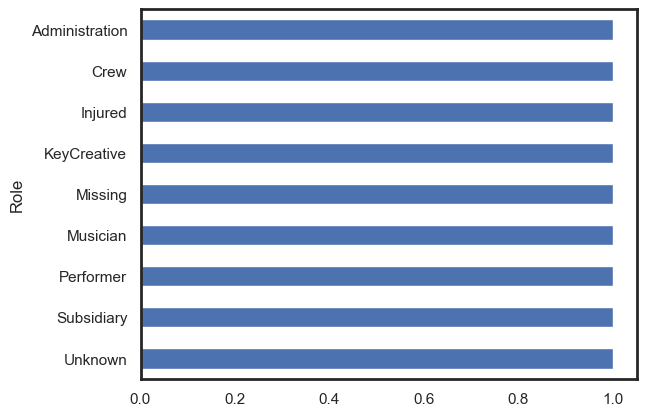

In [95]:
roles_unique = []

for ele in transactions:
    x=np.array(ele)
    roles_unique.extend(x)
    
roles_averages = dict()

for y in list(np.unique(np.array(roles_unique))):
    number_roles = []
    _ = [number_roles.append(len(x)) for x in transactions if y in x]
    roles_averages[y] = pd.DataFrame(number_roles).median().values[0]
    
roles_averages_df = pd.DataFrame(roles_averages.items())
roles_averages_df.columns = ['Role','Avg. no of Roles']
roles_averages_df = roles_averages_df.set_index('Role')
roles_averages_df.sort_values('Role', ascending=False).plot(kind = 'barh')

# adjust legend
plt.legend().set_visible(False)
plt.show()

# check for differences between Male and Female subsets
for y in list(np.unique(np.array(roles_unique))):
    number_roles_m = []
    number_roles_f = []
    _ = [number_roles_m.append(len(x)) for x in transactions_m if y in x]
    _ = [number_roles_f.append(len(x)) for x in transactions_f if y in x]
    diff = pd.DataFrame(number_roles_m).median().values[0] - pd.DataFrame(number_roles_f).median().values[0]
    # if abs(diff) >= 1: print(y, pd.DataFrame(number_roles_m).median().values[0],
    #                         pd.DataFrame(number_roles_f).median().values[0])

```{epigraph}
On average, male musicians tend to have one extra role, while majority of female musicians are solely a musician.
```

#### Association Rule Mining

Now we assess the occurrences of multiple roles happening together. We adopt association rule mining as it can help us answer questions such as what's the likelihood of a `Perfomer` also being a `Musician`. This becomes more interesting as we drill down across gender and time. 

We start by generating association rules for the data in its entirety.
- 66% of people who are KeyCreatives and Musicians tend to also be Performers
- 43% of people who are Musicians tend to also be Performers
- 26% of people who are KeyCreatives and Performers tend to also be Musicians

In [96]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
te_df = pd.DataFrame(te_array, columns=te.columns_)
frequent_itemsets_ap = apriori(te_df, min_support=0.005, use_colnames=True)
rules_ap = association_rules(frequent_itemsets_ap, 
                             metric="lift", 
                             min_threshold=1)

# rules_ap[rules_ap.lift >= 1].sort_values('confidence', ascending = False).head(10)
rules_ap.sort_values('confidence', ascending = False)\
.drop(['lift','leverage','conviction'],axis=1) #.head(10)

antecedents               consequents  antecedent support  \
4   (Musician, KeyCreative)               (Performer)            0.007593   
1                (Musician)               (Performer)            0.063671   
3  (Performer, KeyCreative)                (Musician)            0.019505   
2     (Performer, Musician)             (KeyCreative)            0.027517   
0               (Performer)                (Musician)            0.332288   
6                (Musician)  (Performer, KeyCreative)            0.063671   
7             (KeyCreative)     (Performer, Musician)            0.158830   
5               (Performer)   (Musician, KeyCreative)            0.332288   

   consequent support   support  confidence  
4            0.332288  0.005016    0.660550  
1            0.332288  0.027517    0.432166  
3            0.063671  0.005016    0.257143  
2            0.158830  0.005016    0.182278  
0            0.063671  0.027517    0.082809  
6            0.019505  0.005016    0.078775  
7            0.027517  0.005016    0.031579  
5            0.007593  0.005016    0.015094

```{note}
- **Antecedents**: Antecedents are the items or conditions that are present in a given itemset (i.e., roles) in an association rule. They are also known as the "left-hand side" or "premise" of the rule.
- **Consequents**: Consequents are the items or conditions that are predicted to occur in a given itemset based on the presence of the antecedents in the association rule. They are also known as the "right-hand side" or "conclusion" of the rule.
- **Antecedent support**: Antecedent support is the percentage of itemsets in the dataset that contain the antecedents of an association rule.
- **Consequent support**: Consequent support is the percentage of itemsets in the dataset that contain the consequents of an association rule.
- **Support**: Support is a measure of how frequently an association rule occurs in the dataset. It is calculated as the percentage of itemsets that contain both the antecedents and the consequents of the rule.
- **Confidence**: Confidence is a measure of how strongly the presence of the antecedents in an itemset predicts the presence of the consequents. It is calculated as the percentage of itemsets that contain the antecedents and the consequents, divided by the percentage of itemsets that contain the antecedents.
```

Next we generate association rules for `Male` data and `Female` data, and compare the confidence of the rules to highlight any significant differences. Below are rules with a difference larger than 5%.

- `Males` who are `KeyCreatives` tend to also be `Performers` 8\% more than `Females`
- `Males` who are `Musicians` tend to also be `Performers` 9\% more than `Males`.

In [97]:
te = TransactionEncoder()
te_array = te.fit(transactions_m).transform(transactions_m)
te_df = pd.DataFrame(te_array, columns=te.columns_)
frequent_itemsets_ap = apriori(te_df, min_support=0.005, use_colnames=True)
rules_ap_m = association_rules(frequent_itemsets_ap, 
                             metric="confidence", 
                             min_threshold=0.005)

te = TransactionEncoder()
te_array = te.fit(transactions_f).transform(transactions_f)
te_df = pd.DataFrame(te_array, columns=te.columns_)
frequent_itemsets_ap = apriori(te_df, min_support=0.005, use_colnames=True)
rules_ap_f = association_rules(frequent_itemsets_ap, 
                             metric="confidence", 
                             min_threshold=0.005)


pd.set_option('display.float_format', lambda x: '%.3f' % x)

supports = pd.merge(rules_ap_m, rules_ap_f, on=['antecedents','consequents'])
supports = supports[['antecedents','consequents',
                      'support_x','support_y',
                      'confidence_x','confidence_y']]
supports.columns = ['antecedents','consequents', 'support_M','support_F',
                      'confidence_M','confidence_F']         
supports['diff'] = supports['confidence_M'] - supports['confidence_F']
supports[abs(supports['diff']) > 0.05].sort_values('diff', ascending=False)

antecedents  consequents  support_M  support_F  confidence_M  \
7     (Musician)  (Performer)      0.043      0.022         0.470   
5  (KeyCreative)  (Performer)      0.033      0.014         0.164   

   confidence_F  diff  
7         0.380 0.090  
5         0.085 0.079

#### Role changes over time

We visualise role types over time excluding Missing, Unknown and Injured categories. Across each five-year period, `Performer` is the role type with the highest frequency, followed by `KeyCreative` and `Crew`. All role types follow a similiar trajectory, with the exception of `Musician`.

The second visualisation uses proportion instead of frequency - this allows for a more balanced view for each respective five-year period. It tells a slightly different story in which the `Performer` role is proportionally decreasing.

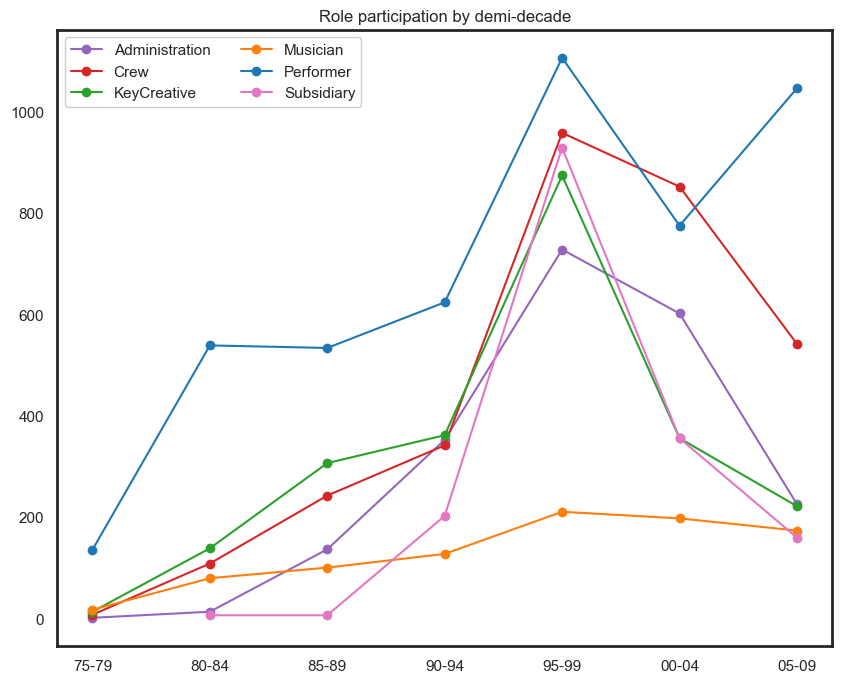

In [98]:
# remove injuries and missing data
df_noinjuries = df[df['ROLE.CATEGORY.CONCATINATE'] != 'Injured']

df_noinjuries["Role.Category.Concatinate"] = df_noinjuries["ROLE.CATEGORY.CONCATINATE"]\
    .apply(lambda x: re.sub("Injured", "", x))\
    .apply(lambda x: re.sub("Unknown", "", x))\
    .str\
    .strip()
    
df_noinjuries = df_noinjuries[~df_noinjuries["ROLE.CATEGORY.CONCATINATE"].isin(["", "Missing", "Unknown"])]

toproles_decade = pd.DataFrame()

### 1975
data_70s = df_noinjuries[df_noinjuries['Year_decade'] == 1975]

# convert the DataFrame to a list of transactions
transactions = [row.split() for row in data_70s['ROLE.CATEGORY.CONCATINATE'].values]

roles_dict = dict()

#printing the counts
for role in transactions:
    for r in role:
        if r in roles_dict: roles_dict[r] += 1
        else: roles_dict[r] = 1
            
role_count = pd.DataFrame(roles_dict.items(), 
                          columns=['Role', 'Count'])
toproles_70s = role_count.sort_values('Count', ascending=True)
toproles_70s['Decade'] = 1975
toproles_70s['Proportion'] = toproles_70s['Count']/toproles_70s['Count'].sum()
toproles_decade = pd.concat([toproles_decade,toproles_70s])

### 1980
data_70s = df_noinjuries[df_noinjuries['Year_decade'] == 1980]

# convert the DataFrame to a list of transactions
transactions = [row.split() for row in data_70s['ROLE.CATEGORY.CONCATINATE'].values]

roles_dict = dict()

#printing the counts
for role in transactions:
    for r in role:
        if r in roles_dict: roles_dict[r] += 1
        else: roles_dict[r] = 1
            
role_count = pd.DataFrame(roles_dict.items(), 
                          columns=['Role', 'Count'])
toproles_70s = role_count.sort_values('Count', ascending=True)
toproles_70s['Decade'] = 1980
toproles_70s['Proportion'] = toproles_70s['Count']/toproles_70s['Count'].sum()

toproles_decade = pd.concat([toproles_decade,toproles_70s])

### 1985
data_70s = df_noinjuries[df_noinjuries['Year_decade'] == 1985]

# convert the DataFrame to a list of transactions
transactions = [row.split() for row in data_70s['ROLE.CATEGORY.CONCATINATE'].values]

roles_dict = dict()

#printing the counts
for role in transactions:
    for r in role:
        if r in roles_dict: roles_dict[r] += 1
        else: roles_dict[r] = 1
            
role_count = pd.DataFrame(roles_dict.items(), 
                          columns=['Role', 'Count'])
toproles_70s = role_count.sort_values('Count', ascending=True)
toproles_70s['Decade'] = 1985
toproles_70s['Proportion'] = toproles_70s['Count']/toproles_70s['Count'].sum()
toproles_decade = pd.concat([toproles_decade,toproles_70s])

### 1990
data_70s = df_noinjuries[df_noinjuries['Year_decade'] == 1990]

# convert the DataFrame to a list of transactions
transactions = [row.split() for row in data_70s['ROLE.CATEGORY.CONCATINATE'].values]

roles_dict = dict()

#printing the counts
for role in transactions:
    for r in role:
        if r in roles_dict: roles_dict[r] += 1
        else: roles_dict[r] = 1
            
role_count = pd.DataFrame(roles_dict.items(), 
                          columns=['Role', 'Count'])
toproles_70s = role_count.sort_values('Count', ascending=True)
toproles_70s['Decade'] = 1990
toproles_70s['Proportion'] = toproles_70s['Count']/toproles_70s['Count'].sum()
toproles_decade = pd.concat([toproles_decade,toproles_70s])

### 1995
data_70s = df_noinjuries[df_noinjuries['Year_decade'] == 1995]

# convert the DataFrame to a list of transactions
transactions = [row.split() for row in data_70s['ROLE.CATEGORY.CONCATINATE'].values]

roles_dict = dict()

#printing the counts
for role in transactions:
    for r in role:
        if r in roles_dict: roles_dict[r] += 1
        else: roles_dict[r] = 1
            
role_count = pd.DataFrame(roles_dict.items(), 
                          columns=['Role', 'Count'])
toproles_70s = role_count.sort_values('Count', ascending=True)
toproles_70s['Decade'] = 1995
toproles_70s['Proportion'] = toproles_70s['Count']/toproles_70s['Count'].sum()
toproles_decade = pd.concat([toproles_decade,toproles_70s])

### 2000
data_70s = df_noinjuries[df_noinjuries['Year_decade'] == 2000]

# convert the DataFrame to a list of transactions
transactions = [row.split() for row in data_70s['ROLE.CATEGORY.CONCATINATE'].values]

roles_dict = dict()

#printing the counts
for role in transactions:
    for r in role:
        if r in roles_dict: roles_dict[r] += 1
        else: roles_dict[r] = 1
            
role_count = pd.DataFrame(roles_dict.items(), 
                          columns=['Role', 'Count'])
toproles_70s = role_count.sort_values('Count', ascending=True)
toproles_70s['Decade'] = 2000
toproles_70s['Proportion'] = toproles_70s['Count']/toproles_70s['Count'].sum()
toproles_decade = pd.concat([toproles_decade,toproles_70s])

### 2005
data_70s = df_noinjuries[df_noinjuries['Year_decade'] == 2005]

# convert the DataFrame to a list of transactions
transactions = [row.split() for row in data_70s['ROLE.CATEGORY.CONCATINATE'].values]

roles_dict = dict()

#printing the counts
for role in transactions:
    for r in role:
        if r in roles_dict: roles_dict[r] += 1
        else: roles_dict[r] = 1
            
role_count = pd.DataFrame(roles_dict.items(), 
                          columns=['Role', 'Count'])
toproles_70s = role_count.sort_values('Count', ascending=True)
toproles_70s['Decade'] = 2005
toproles_70s['Proportion'] = toproles_70s['Count']/toproles_70s['Count'].sum()
toproles_decade = pd.concat([toproles_decade,toproles_70s])


### 2010
data_70s = df_noinjuries[df_noinjuries['Year_decade'] == 2010]

# convert the DataFrame to a list of transactions
transactions = [row.split() for row in data_70s['ROLE.CATEGORY.CONCATINATE'].values]

roles_dict = dict()

#printing the counts
for role in transactions:
    for r in role:
        if r in roles_dict: roles_dict[r] += 1
        else: roles_dict[r] = 1
            
role_count = pd.DataFrame(roles_dict.items(), 
                          columns=['Role', 'Count'])
toproles_70s = role_count.sort_values('Count', ascending=True)
toproles_70s['Decade'] = 2005
toproles_70s['Proportion'] = toproles_70s['Count']/toproles_70s['Count'].sum()
toproles_decade = pd.concat([toproles_decade,toproles_70s])

fig, ax = plt.subplots(figsize=(10, 8))

for x in toproles_decade[toproles_decade.Role != 'Injured']['Role'].unique():
    plt.plot(toproles_decade[toproles_decade['Role']== x]['Decade'],
             toproles_decade[toproles_decade['Role']== x]['Count'], 
             label = x, marker='o',color = color_dict2[x])

plt.legend(loc="upper left", ncol=2, facecolor='white', framealpha=1)
plt.title('Role participation by demi-decade', )
ax.set_xlabel('')

plt.xticks(range(1975, 2010, 5), ['75-79', '80-84','85-89', '90-94',
                            '95-99', '00-04','05-09'])
plt.show()

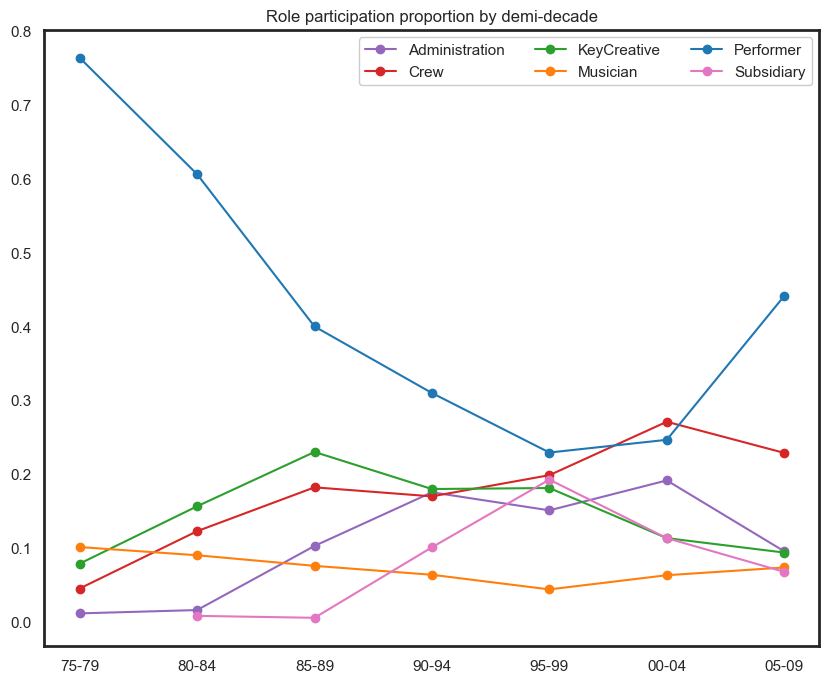

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))

for x in toproles_decade[toproles_decade.Role != 'Injured']['Role'].unique():
    plt.plot(toproles_decade[toproles_decade['Role']== x]['Decade'],
             toproles_decade[toproles_decade['Role']== x]['Proportion'], 
             label = x, marker='o', color = color_dict2[x])

plt.legend(loc="upper right", ncol=3, facecolor='white', framealpha=1)
plt.title('Role participation proportion by demi-decade', )
ax.set_xlabel('')
plt.xticks(range(1975, 2010, 5), ['75-79', '80-84','85-89', '90-94',
                            '95-99', '00-04','05-09'])
plt.show()

#### Male and female proportion by role over time

We isolate the data for each role and assess the data with respect to `Males` and `Females`. This is repeated using proportions. Main findings are listed below.

- There have been more female `KeyCreatives` participations over time, with the exception of 95-99 and 05-09.
- Post-1995 more males participated as `Crew` members.
- There have been more male `Musicians` participations over time, with the exception of 85-89 and 05-09.
- There have been more male `Performers` participations over time.
- There have been more females participating in `Administration` over time. Interesting to see no `Administration` records prior to 1980.
- There have been more females participating as a `Subsidiary`, however data is only recorded between 1990 and 2004.


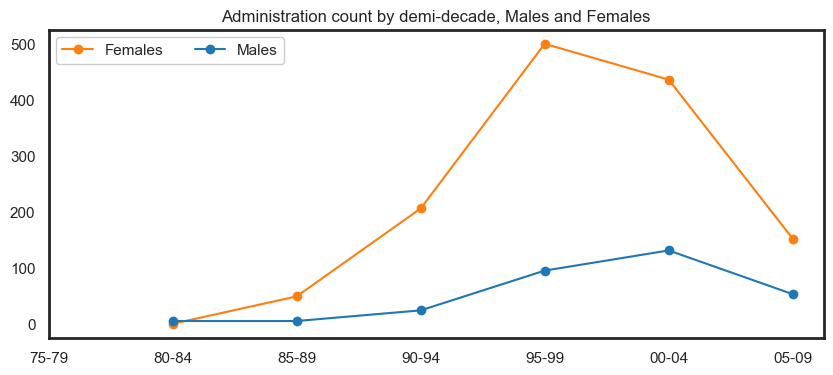

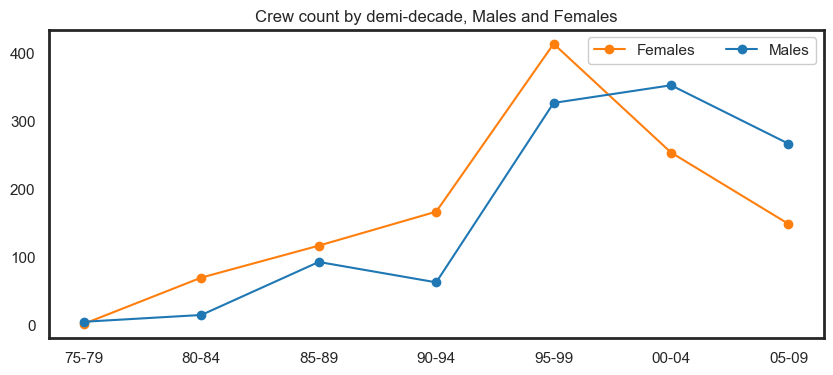

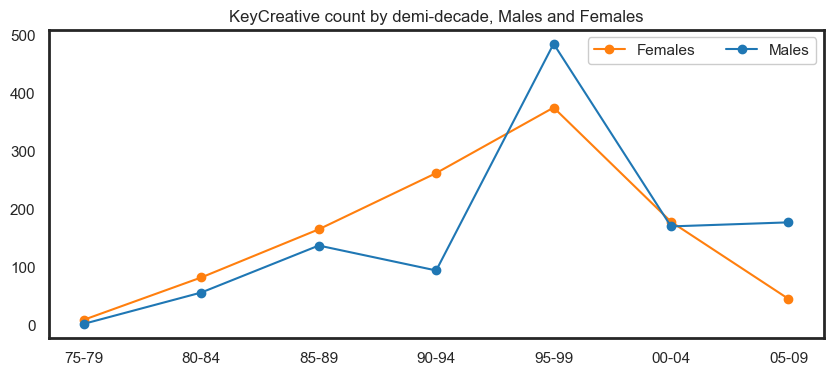

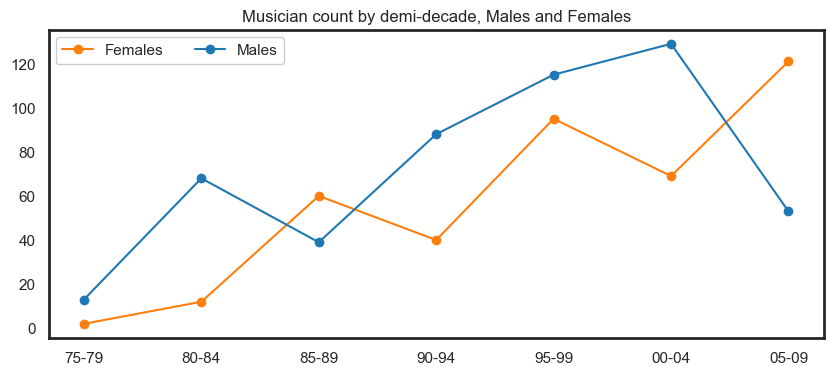

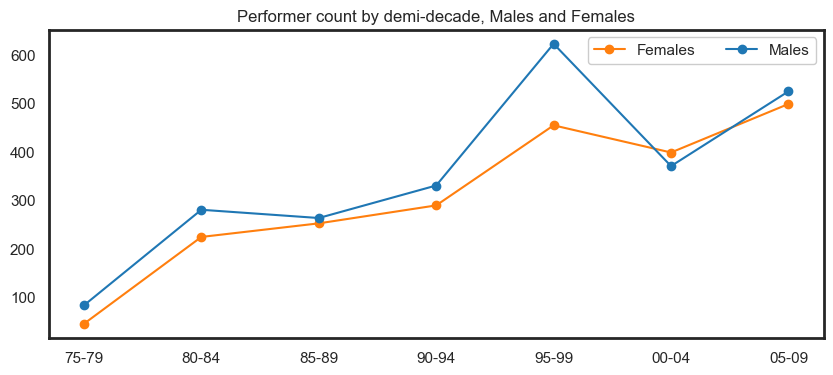

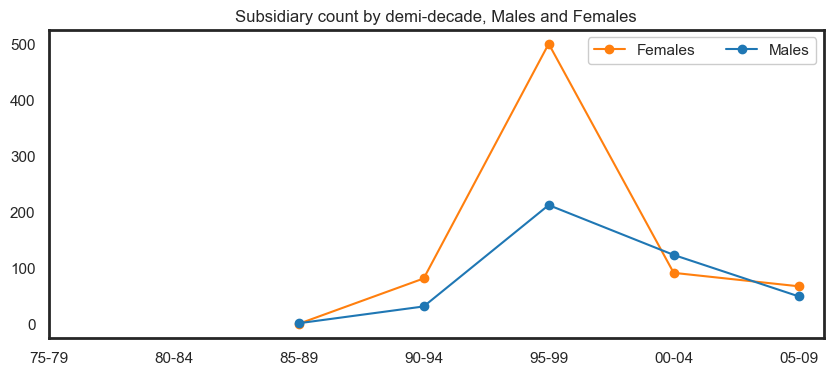

In [100]:
toproles_decade_gender = pd.DataFrame()
supports_decade = pd.DataFrame()

for x in list(df_noinjuries['Year_decade'].unique())[:-1]: 
    ### 1975
    data_70s = df_noinjuries[df_noinjuries['Year_decade'] == x]

    # convert the DataFrame to a list of transactions
    transactions_m = [row.split() for row in 
                      data_70s[(data_70s.Gender=='M')]['ROLE.CATEGORY.CONCATINATE'].values]
    transactions_f = [row.split() for row in 
                      data_70s[data_70s.Gender=='F']['ROLE.CATEGORY.CONCATINATE'].values]
    roles_dict = dict()

    #printing the counts
    for role in transactions_m:
        for r in role:
            if r in roles_dict: roles_dict[r] += 1
            else: roles_dict[r] = 1

    role_count = pd.DataFrame(roles_dict.items(), 
                              columns=['Role', 'Count'])
    toproles_70s_m = role_count.sort_values('Count', ascending=True)
    toproles_70s_m['Decade'] = x
    # toproles_70s_m['Gender'] = 'Male'

    roles_dict = dict()
    
    #printing the counts
    for role in transactions_f:
        for r in role:
            if r in roles_dict: roles_dict[r] += 1
            else: roles_dict[r] = 1

    role_count = pd.DataFrame(roles_dict.items(), 
                              columns=['Role', 'Count'])
    toproles_70s_f = role_count.sort_values('Count', ascending=True)
    toproles_70s_f['Decade'] = x
    # toproles_70s_f['Gender'] = 'Female'
    
    toproles_70s_mf = pd.merge(toproles_70s_m, toproles_70s_f[['Role','Decade','Count']], on=['Role','Decade'])
    toproles_70s_mf['count_sum'] = toproles_70s_mf['Count_x'] + toproles_70s_mf['Count_y']
    toproles_70s_mf['Proportion_x'] = toproles_70s_mf['Count_x']/toproles_70s_mf['count_sum']
    toproles_70s_mf['Proportion_y'] = toproles_70s_mf['Count_y']/toproles_70s_mf['count_sum']
    toproles_decade_gender = pd.concat([toproles_decade_gender,toproles_70s_mf])
    
    te = TransactionEncoder()
    te_array = te.fit(transactions_m).transform(transactions_m)
    te_df = pd.DataFrame(te_array, columns=te.columns_)
    frequent_itemsets_ap = apriori(te_df, min_support=0.001, use_colnames=True)
    rules_ap_m = association_rules(frequent_itemsets_ap, 
                                 metric="confidence", 
                                 min_threshold=0.001)

    te = TransactionEncoder()
    te_array = te.fit(transactions_f).transform(transactions_f)
    te_df = pd.DataFrame(te_array, columns=te.columns_)
    frequent_itemsets_ap = apriori(te_df, min_support=0.001, use_colnames=True)
    rules_ap_f = association_rules(frequent_itemsets_ap, 
                                 metric="confidence", 
                                 min_threshold=0.001)

    supports = pd.merge(rules_ap_m, rules_ap_f, on=['antecedents','consequents'])
    supports['Decade'] = x
    supports_decade = supports_decade.append(supports)

toproles_decade_gender.columns = ['Role','Count_m','Decade','Count_f',
                                  'count_sum','Proportion_m','Proportion_f']

for x in toproles_decade[toproles_decade.Role != 'Injured']['Role'].unique():
    fig, ax = plt.subplots(figsize=(10, 4))

    plt.plot(toproles_decade_gender[toproles_decade_gender['Role']==x]['Decade'],
             toproles_decade_gender[toproles_decade_gender['Role']==x]['Count_f'], 
             label = 'Females', marker='o', color='tab:orange')

    plt.plot(toproles_decade_gender[toproles_decade_gender['Role']==x]['Decade'],
             toproles_decade_gender[toproles_decade_gender['Role']==x]['Count_m'], 
             label = 'Males', marker='o',  color='tab:blue')

    plt.legend(loc="best", ncol=3, facecolor='white', framealpha=1)
    plt.title(f'{x} count by demi-decade, Males and Females', )
    ax.set_xlabel('')

    plt.xticks(range(1975, 2010, 5), ['75-79', '80-84','85-89', '90-94',
                                '95-99', '00-04','05-09'])
    plt.show()

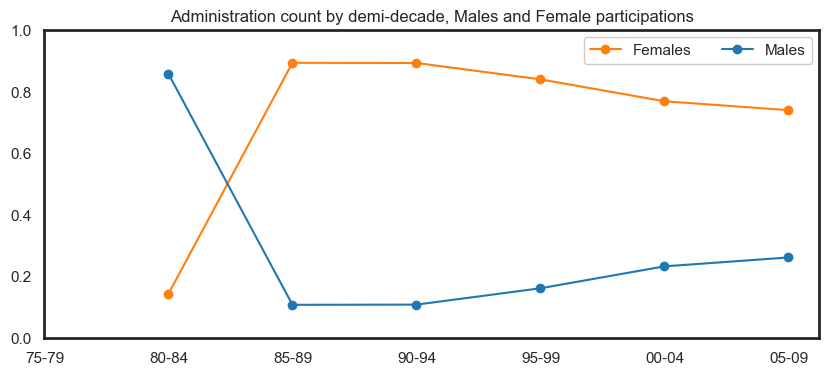

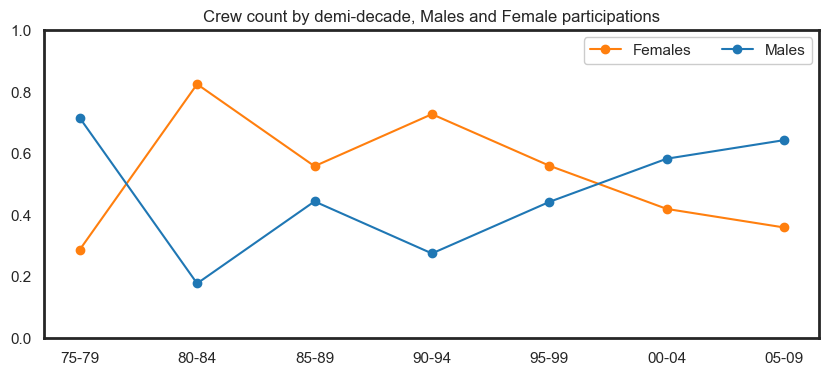

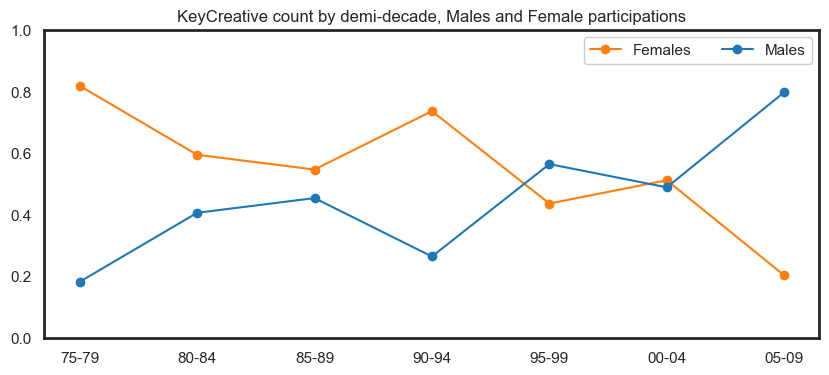

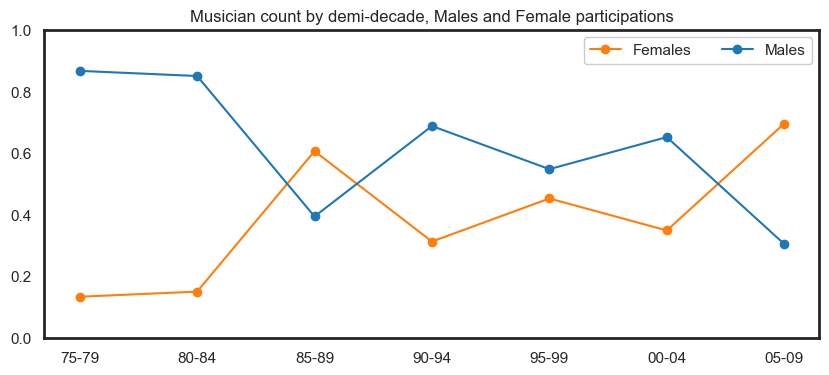

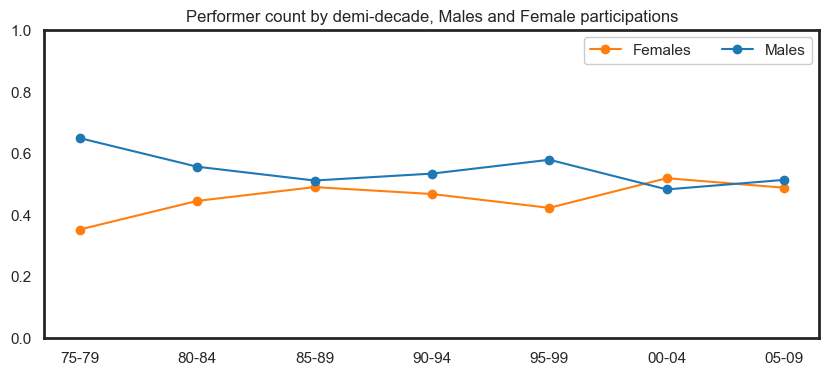

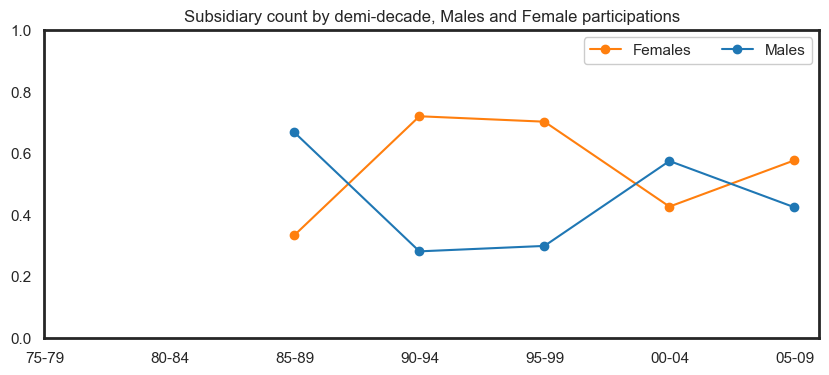

In [101]:
for x in toproles_decade[toproles_decade.Role != 'Injured']['Role'].unique():
    fig, ax = plt.subplots(figsize=(10, 4))

    plt.plot(toproles_decade_gender[toproles_decade_gender['Role']==x]['Decade'],
             toproles_decade_gender[toproles_decade_gender['Role']==x]['Proportion_f'], 
             label = 'Females', marker='o', color='tab:orange')

    plt.plot(toproles_decade_gender[toproles_decade_gender['Role']==x]['Decade'],
             toproles_decade_gender[toproles_decade_gender['Role']==x]['Proportion_m'], 
             label = 'Males', marker='o',  color='tab:blue')

    plt.legend(loc="best", ncol=3, facecolor='white', framealpha=1)
    plt.title(f'{x} count by demi-decade, Males and Female participations', )
    ax.set_xlabel('')

    plt.ylim([0, 1])
    plt.xticks(range(1975, 2010, 5), ['75-79', '80-84','85-89', '90-94',
                                '95-99', '00-04','05-09'])
    plt.show()

#### Association Rule Mining (cont.)

We now review association rules across time and gender. For each generated rule, we calculated the difference of the **confidence** of said rule for `Males` with the **confidence** of the same rule for `Females` for each given five-year period. 

Positive differences indicate that the rule occurs more often for `Males` while negative differences indicate that the rule occurs more often for `Females`. We then sorted the differences by its absolute value and inspected the most significant rules visually (see coloured time series plot).

The table below highlights association rule differences of more than 15%. We provide some examples of how one might interpret these rule differences highlighted in the column `Male-Female difference`.
<br>
- Example (1): `Males` who are `Musicians` (see antecedents) are 42.3% more likely than `Females` to also be a `Performer` (see consequents) in 75-79 period.
- Example (2): `Females` who are `Musicians` are 35.9% more likely than `Males` to also be a `Performer` in 85-89 period.
- Example (2): `Females` who are `Musicians` are 28.2% more likely than `Males` to also be a `KeyCreative` in 85-89 period.

In [102]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

supports = supports_decade[['antecedents','consequents',
                      'antecedent support_x','antecedent support_y',
                    #   'support_x','support_y',
                      'confidence_x','confidence_y','Decade']]
supports['Male-Female difference'] = (supports['confidence_x'] - supports['confidence_y'])*100
supports['diff_abs'] = abs(supports['Male-Female difference'])
supports_shrt = supports[(supports['antecedent support_x'] >= 0.05) | (supports['antecedent support_y'] >= 0.05)]
supports_shrt = supports_shrt[(supports_shrt['confidence_x'] >= 0.25) | (supports_shrt['confidence_y'] >= 0.25)]
supports_shrt2 = supports_shrt[supports_shrt['diff_abs'] > 15].sort_values('diff_abs', ascending=False)
supports_shrt2.drop(['diff_abs'],axis=1)\
    .rename({'antecedent support_x':'antecedent support_m',
                'antecedent support_y':'antecedent support_f',
                'confidence_x':'confidence_m',
                'confidence_y':'confidence_f'}, axis=1)

antecedents    consequents  antecedent support_m  antecedent support_f  \
1  (Musician)    (Performer)                 0.143                 0.036   
9  (Musician)    (Performer)                 0.076                 0.110   
4  (Musician)  (KeyCreative)                 0.076                 0.110   
9  (Musician)    (Performer)                 0.073                 0.043   

   confidence_m  confidence_f  Decade  Male-Female difference  
1         0.923         0.500    1975                  42.308  
9         0.308         0.667    1985                 -35.897  
4         0.051         0.333    1985                 -28.205  
9         0.965         0.779    1995                  18.627

In [103]:
# yr = 2005; r1 = 'Musician'; r2 = 'Performer'

# # dff = df.assign(Roles=df['ROLE.CATEGORY.CONCATINATE'].str.split(' ')).explode('Roles').reset_index(drop=True)

# # dff[(dff['Gender'] == 'M') & (dff['Year_decade'] == 1975) &\
# #     (dff['ROLE.CATEGORY.CONCATINATE'].str.contains('Musician'))][['COMBINED.NAME','Year']].shape

# # count number of strings in column
# # df_noinjuries['role_count'] = df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.split(' ').str.len()


# print(df_noinjuries[(df_noinjuries['Gender'] == 'M') & (df_noinjuries['Year_decade'] == yr)].shape)

# print(df_noinjuries[(df_noinjuries['Gender'] == 'M') & (df_noinjuries['Year_decade'] == yr) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r1))][['COMBINED.NAME','Year']].shape)

# print(df_noinjuries[(df_noinjuries['Gender'] == 'M') & (df_noinjuries['Year_decade'] == yr) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r1)) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r2))][['COMBINED.NAME','Year']].shape)

# print(df_noinjuries[(df_noinjuries['Gender'] == 'M') & (df_noinjuries['Year_decade'] == yr) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r1)) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r2))][['COMBINED.NAME','Year']]['Year'].unique())

# print(df_noinjuries[(df_noinjuries['Gender'] == 'M') & (df_noinjuries['Year_decade'] == yr) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r1)) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r2))][['COMBINED.NAME','Year']]['COMBINED.NAME'].unique())

# print('\n\n')

# print(df_noinjuries[(df_noinjuries['Gender'] == 'F') & (df_noinjuries['Year_decade'] == yr)].shape)

# print(df_noinjuries[(df_noinjuries['Gender'] == 'F') & (df_noinjuries['Year_decade'] == yr) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r1))][['COMBINED.NAME','Year']].shape)

# print(df_noinjuries[(df_noinjuries['Gender'] == 'F') & (df_noinjuries['Year_decade'] == yr) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r1)) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r2))][['COMBINED.NAME','Year']].shape)

# print(df_noinjuries[(df_noinjuries['Gender'] == 'F') & (df_noinjuries['Year_decade'] == yr) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r1)) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r2))][['COMBINED.NAME','Year']]['Year'].unique())

# df_noinjuries[(df_noinjuries['Gender'] == 'F') & (df_noinjuries['Year_decade'] == yr) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r1)) &\
#     (df_noinjuries['ROLE.CATEGORY.CONCATINATE'].str.contains(r2))][['COMBINED.NAME','Year']]['COMBINED.NAME'].unique()

It is important to further inspect why these male-female differences exist. Therefore below we provide some extra notes on which individuals are involved in these association rules. We follow this with a line plot.

<b>1st row (1975-79) (56 females in total/91 males in total)</b>
- 2 Female musician participations in this period
- 1 Female musician/performer participations in this period
- Celeste Howden - 1 occurence in 1979
<br><br>
- 13 Male musician participations in this period
- 12 Male musician/performer participations in this period
- 'Colin Stevens', 'Mic Conway', 'Jim Conway', 'Steven Cooney','Tony Burkys', 'Graeme Isaac', 'Tony Hargreaves'
- Total of 12 occurences from above people in 1978-79
<br><br>
- 4% of female participations in 1975 period involved musicians, while 14% of males participations in 1975 period involved musicians
- 92% of male musicians were also performers and 50% of female musicians were also performers
<br><br>

<b>2nd row (1985-89) (515 females in total/544 males in total)</b>
- 60 Female musician participations in this period
- 40 Female musician/performer participations in this period
- Shirley Billing', 'Judy Pascoe', 'Julie McInnes','Tanya Cavanagh'
- Total of 40 occurences from above people in 1985-89
<br><br>
- 39 Male musician participations in this period
- 12 Male musician/performer participations in this period
- 'Geoff Toll' 'Tony Hargreaves' 'Steve Blackburn'
- Total of 12 occurences from above people in 1985-87
<br><br>
- 11% of female participations in 1985 period involved musicians, while 8% of males participations in 1985 period involved musicians
- 31% of male musicians were also performers and 67% of female musicians were also performers
<br><br>

<b>3rd row (1985-89) (515 females in total/544 males in total)</b>
- 60 Female musician participations in this period
- 20 Female musician/key creatives participations in this period
- Shirley Billing, Julie McInnes - Total of 20 occurence in 1987-89
<br><br>
- 39 Male musician participations in this period
- 2 Male musician/key creatives participations in this period
- George Worontschak, Mathew Fargher - Total of 2 occurences in 1987-89
- Total of 2 occurences from above people in 1987-88
<br><br>
- 5% of male musicians were also key creatives and 33% of female musicians were also key creatives in 85 period
<br><br>

<b>4th row (1995-99) (1645 females in total/2135 males in total)</b>
- 95 Female musician participations in this period
- 74 Female musician/performer participations in this period
- 'Kate McKibbin', 'Julie McInnes', 'Hope Csutoros', 'Jenny Thomas', 'Sue Simpson'
- Total of 74 occurences from above people in 1995-89
<br><br>
- 115 Male musician participations in this period
- 111 Male musician/performer participations in this period
- 'Chris Lewis' 'Carl Polke' 'Michael Davis' 'Tim Coldwell' "John O'Hagan"
- Total of 111 occurences from above people in 1995-99
<br><br>
- 4% of female participations in 1995 period involved musicians, while 7% of males participations in 1995 period involved musicians
- 97% of male musicians were also performers and 78% of female musicians were also performers
<br><br>
<br><br>
The following plot highlights these male-female differences. We exclude 05-09 period as there were no female musician-performer participations in this period. There were however 9 Male musician-performer participations which amounts to 17% of musician participations.

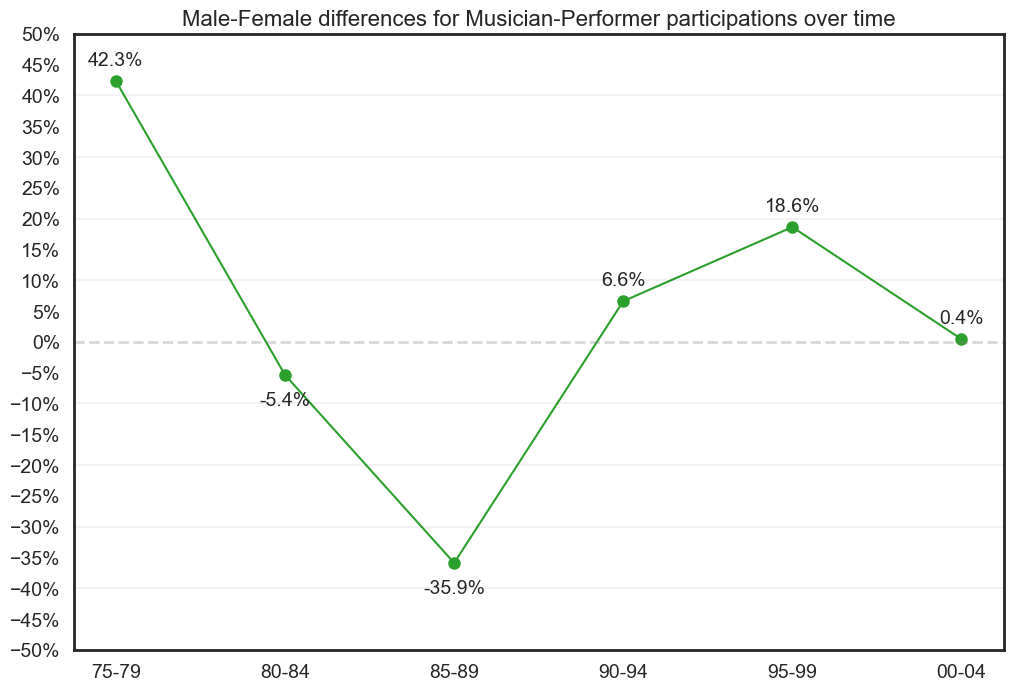

In [104]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(12, 8))

supports = supports[(supports.antecedents == frozenset({'Musician'})) & 
             (supports.consequents == frozenset({'Performer'}))]

this_pair = supports[(supports.antecedents == frozenset({'Musician'})) & 
             (supports.consequents == frozenset({'Performer'}))]
plt.plot(this_pair['Decade'], this_pair['Male-Female difference'], marker='o', 
         color='tab:green', label='Musician-Performer', markersize=8)

# add data labels


# this_pair = supports[(supports.antecedents == frozenset({'Musician'})) & 
#              (supports.consequents == frozenset({'KeyCreative'}))]
# plt.plot(this_pair['Decade'], this_pair['Male-Female difference'], marker='o', 
#          color='tab:blue', label='Musician-KeyCreative', markersize=8)

# this_pair = supports[(supports.antecedents == frozenset({'Subsidiary'})) & 
#              (supports.consequents == frozenset({'Performer'}))]
# plt.plot(this_pair['Decade'], this_pair['Male-Female difference'], marker='o', 
#          color='tab:red', label='Subsidiary-Performer', markersize=8)

# this_pair = supports[(supports.antecedents == frozenset({'KeyCreative'})) & 
#              (supports.consequents == frozenset({'Performer'}))]
# plt.plot(this_pair['Decade'], this_pair['Male-Female difference'], marker='o', 
#          color='tab:purple', label='KeyCreative-Performer', markersize=8)

# this_pair = supports[(supports.antecedents == frozenset({'Crew'})) & 
#              (supports.consequents == frozenset({'KeyCreative'}))]
# plt.plot(this_pair['Decade'], this_pair['Male-Female difference'], marker='o', 
#          color='tab:orange', label='Crew-KeyCreative', markersize=8)

for x, y, label in zip(this_pair['Decade'], this_pair['Male-Female difference'], 
    round(this_pair['Male-Female difference'],1).astype(str) + '%'):
    if y > 0: ax.annotate(label, (x, y+2.5), ha='center', fontsize=14)
    else: ax.annotate(label, (x, y-5), ha='center', fontsize=14)

plt.title('Male-Female differences for Musician-Performer participations over time',
         fontsize=16)

plt.axhline(y=0, linestyle='--', color='grey', alpha=0.3, lw=2)
plt.axhline(y=-10, linestyle='-', color='black', alpha=0.05)
plt.axhline(y=-20, linestyle='-', color='black', alpha=0.05)
plt.axhline(y=-30, linestyle='-', color='black', alpha=0.05)
plt.axhline(y=-40, linestyle='-', color='black', alpha=0.05)
plt.axhline(y=10, linestyle='-', color='black', alpha=0.05)
plt.axhline(y=20, linestyle='-', color='black', alpha=0.05)
plt.axhline(y=30, linestyle='-', color='black', alpha=0.05)
plt.axhline(y=40, linestyle='-', color='black', alpha=0.05)

# adjust legend
# ax.legend(loc="upper right", ncol=3, fontsize=12)

plt.yticks(range(-50, 55, 5), range(-50, 55, 5), fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(range(1975, 2005, 5), ['75-79', '80-84','85-89', '90-94',
                            '95-99', '00-04'], fontsize=14)

plt.show()

## Network graphs

Lastly, we developed an interactive tool to assist in drilling down into influential people and roles across any given period of time.

**Instructions**
1. Choose years to establish the start and end period. These values are inclusive. We also provide the option to include roles listed as `Injured`.
2. Press the `Generate network graph` button, this will load a network graph along with the top 3 association rules for the selected time period. _Note that the network graph will take longer to load if the time period is large i.e., can take up 90 seconds to load for all data._
3. You can zoom in/out, drag nodes, highlight node neighbours by clicking, hover over nodes for more info and highlight nodes using the filter on the top left. The filter lists all the roles first and then lists each relevant node in order of its participation rate for the given period.
4. If you want to make any changes to the time period (or include `Injured`), you will need to press the `Generate network graph` button again to generate a new network graph along with corresponding association rules.

**Legend**
- Blue nodes represent `Male` participants.
- Orange nodes represent `Female` participants.
- Red nodes represent `0` participants.
- Green nodes represent roles i.e., `Musician`, `Performer`, etc.
- Edges represent an occurence in the given time period - they are uniformally weighted.
- The size of a participant node corresponds with the number of participated events in the given time period. This frequency can be obtained by hovering over the node.

_It should be noted that association rules are only generated if rules are relatively significant - in cases where there are no rules, the output will flag an error._

<iframe height="1100" width="800" frameborder="no" src="https://acd-engine.shinyapps.io/CircusOzApplication/"> </iframe>